In [5]:
import warnings
warnings.filterwarnings("ignore")
import sys
import pathlib
sys.path.append(str(pathlib.Path().absolute() / "external" / "metalhydride"))

Imputation

In [ ]:
import openai
openai.api_key = ""

Setup- CVD Dataset

In [7]:
import pandas as pd
from utils import load_graphene_data
from featurization import preprocess_data
from imputation import apply_gist_formalism, impute_all_attributes
from utils import impute_data
from utils import mice_impute_data

raw_data = load_graphene_data()

preprocessed_data = preprocess_data(raw_data)

attributes_to_impute = ['Pressure (mbar)', 'C2H4', 'Growth Time (min)', 'H2', 'CH4', 'Ar', 'C2H2']

Example 1: Imputation with guide prompt and ground truth analysis

In [ ]:
guide_with_analysis, predictions_dict = impute_all_attributes(preprocessed_data, attributes_to_impute, temperature=0.8, perform_analysis=True, prompt_type="guide")
guide_with_analysis.to_csv("Data/guide_with_analysis.csv", index=False)

Example 2: Imputation with map prompt but without ground truth analysis

In [ ]:
guide_without_analysis, predictions_dict = impute_all_attributes(preprocessed_data, attributes_to_impute, temperature=0.8, perform_analysis=False, prompt_type="guide")
guide_without_analysis.to_csv("Data/guide_without_analysis.csv", index=False)

Example 3: Imputation with gist formalism

In [ ]:
preprocessed_data = apply_gist_formalism(preprocessed_data, attributes_to_impute)

gist_without_analysis, predictions_dict = impute_all_attributes(preprocessed_data, attributes_to_impute, temperature=0.8, perform_analysis=False, claim_formalism=True, prompt_type="gist")
gist_without_analysis.to_csv("Data/gist_without_analysis.csv", index=False)

Example 4: KNN Imputation- Weighted and Unweighted

In [5]:
data_imputed_KNN_uniform = impute_data(preprocessed_data, attributes_to_impute, weights='uniform')
data_imputed_KNN_uniform.to_csv("Data/data_imputed_KNN_uniform.csv", index=False)
data_imputed_KNN_distance = impute_data(preprocessed_data, attributes_to_impute, weights='distance')
data_imputed_KNN_distance.to_csv("Data/data_imputed_KNN_distance.csv", index=False)

Example 5: MICE Imputation with Random Forest

In [3]:
data_imputed_MICE = mice_impute_data(preprocessed_data, attributes_to_impute)
data_imputed_MICE.to_csv("Data/data_imputed_MICE.csv", index=False)

Setup- Hydride Dataset

In [2]:
from magpie import MagpieServer

server = MagpieServer()

ModuleNotFoundError: No module named 'magpie'

In [8]:
import sys

# Patch magpie import if you don't want to install it and will NOT call magpie methods
sys.modules["magpie"] = type(sys)("magpie")   # Dummy magpie
sys.modules["magpie"].MagpieServer = lambda *a, **k: None


In [19]:
from metal_hydride_ML import H2Data

In [7]:
pip install pymatgen

  Using cached pymatgen-2024.8.9-cp39-cp39-macosx_11_0_arm64.whl.metadata (13 kB)
  Using cached monty-2025.3.3-py3-none-any.whl.metadata (3.6 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached palettable-3.3.3-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached pybtex-0.24.0-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached spglib-2.6.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (4.2 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached uncertainties-3.2.3-py3-none-any.whl.metadata (7.0 kB)
  Using cached ruamel.yaml.clib-0.2.12-cp39-cp39-macosx_12_0_arm64.whl.metadata (1.2 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached pymatgen-2024.8.9-cp39-cp39-macosx_11_0_arm64.whl (3.6 MB)
Using cached monty-2025.3.3-py3-none-any.whl (51 kB)
Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
Using cached palettable-3.3.3-py2.py3-none-a

Columns: ['Item_No', 'Material_Class', 'Composition_Formula', 'Hydrogen_Weight_Percent', 'Heat_of_Formation_kJperMolH2', 'Temperature_oC', 'Pressure_Atmospheres_Absolute', 'Author_Year', 'Reference_Number', 'Comment1', 'Comment2', 'Comment3']
Raw data shape: (2723, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_No                        2723 non-null   object 
 1   Material_Class                 2722 non-null   object 
 2   Composition_Formula            2722 non-null   object 
 3   Hydrogen_Weight_Percent        2585 non-null   float64
 4   Heat_of_Formation_kJperMolH2   781 non-null    object 
 5   Temperature_oC                 1660 non-null   object 
 6   Pressure_Atmospheres_Absolute  1647 non-null   object 
 7   Author_Year                    2722 non-null   object 
 8   Reference_Number  

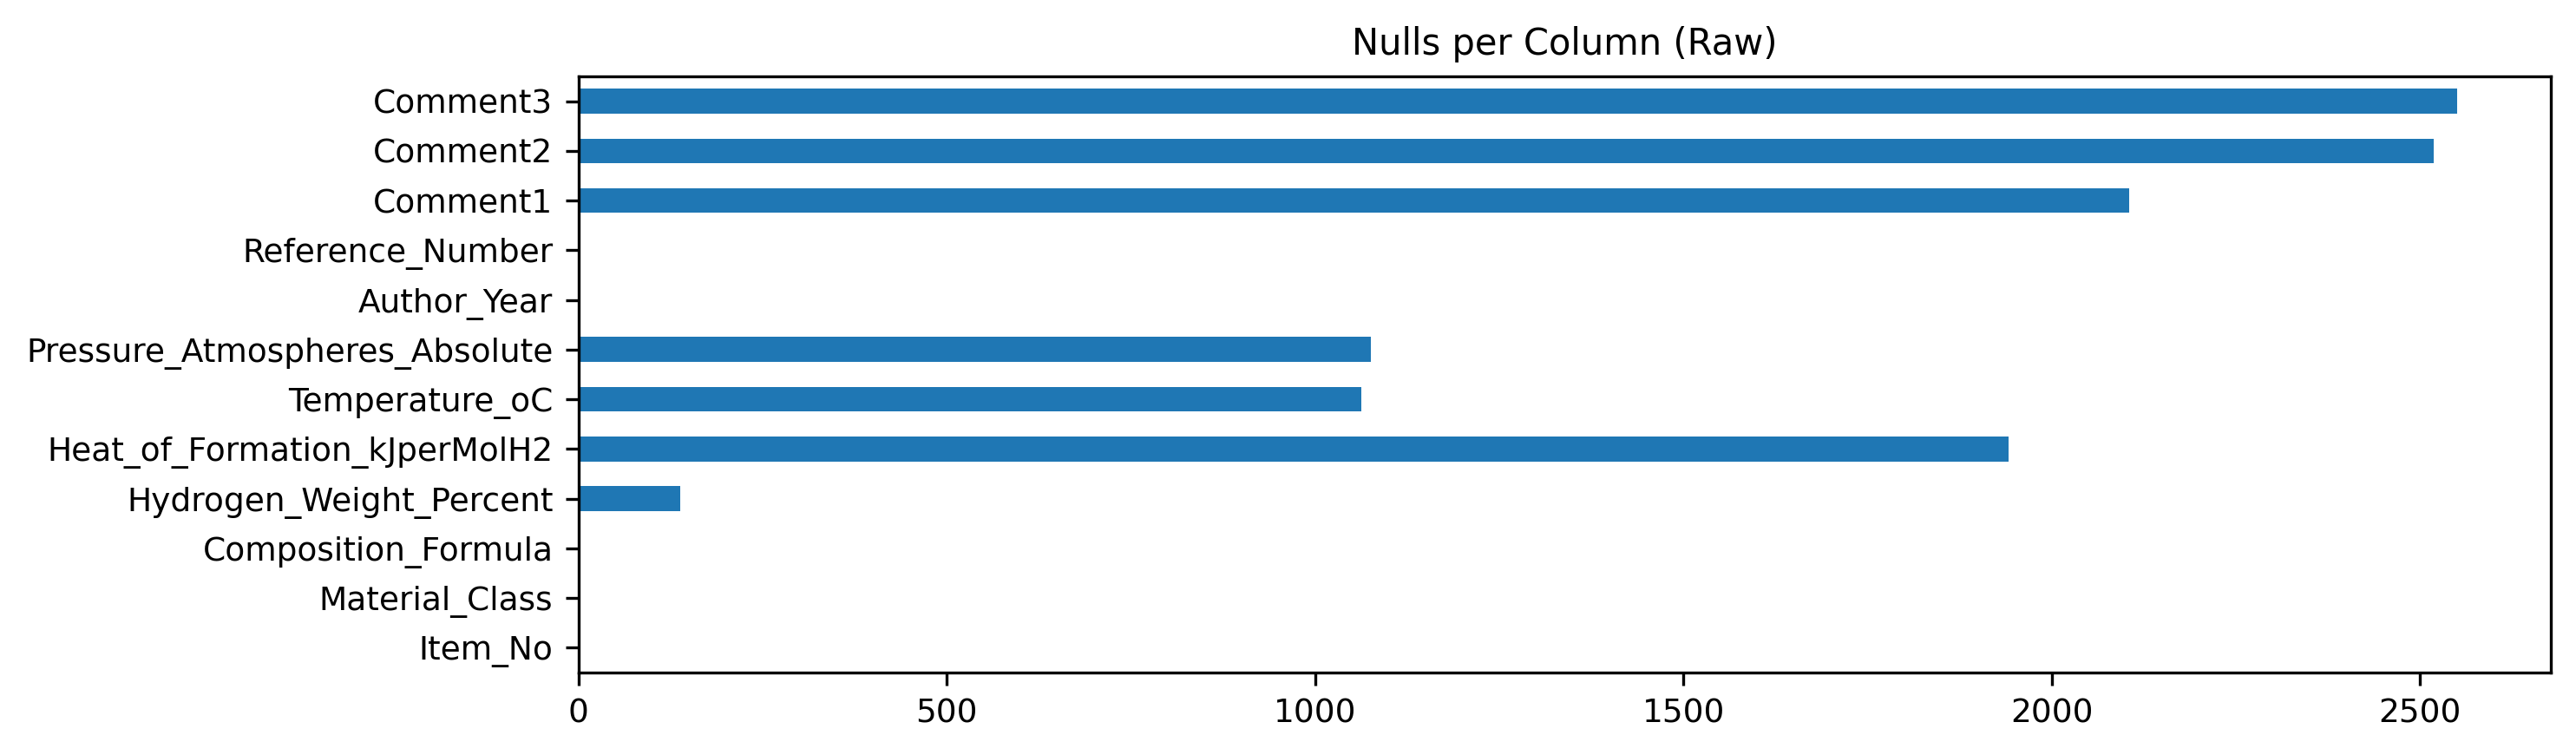

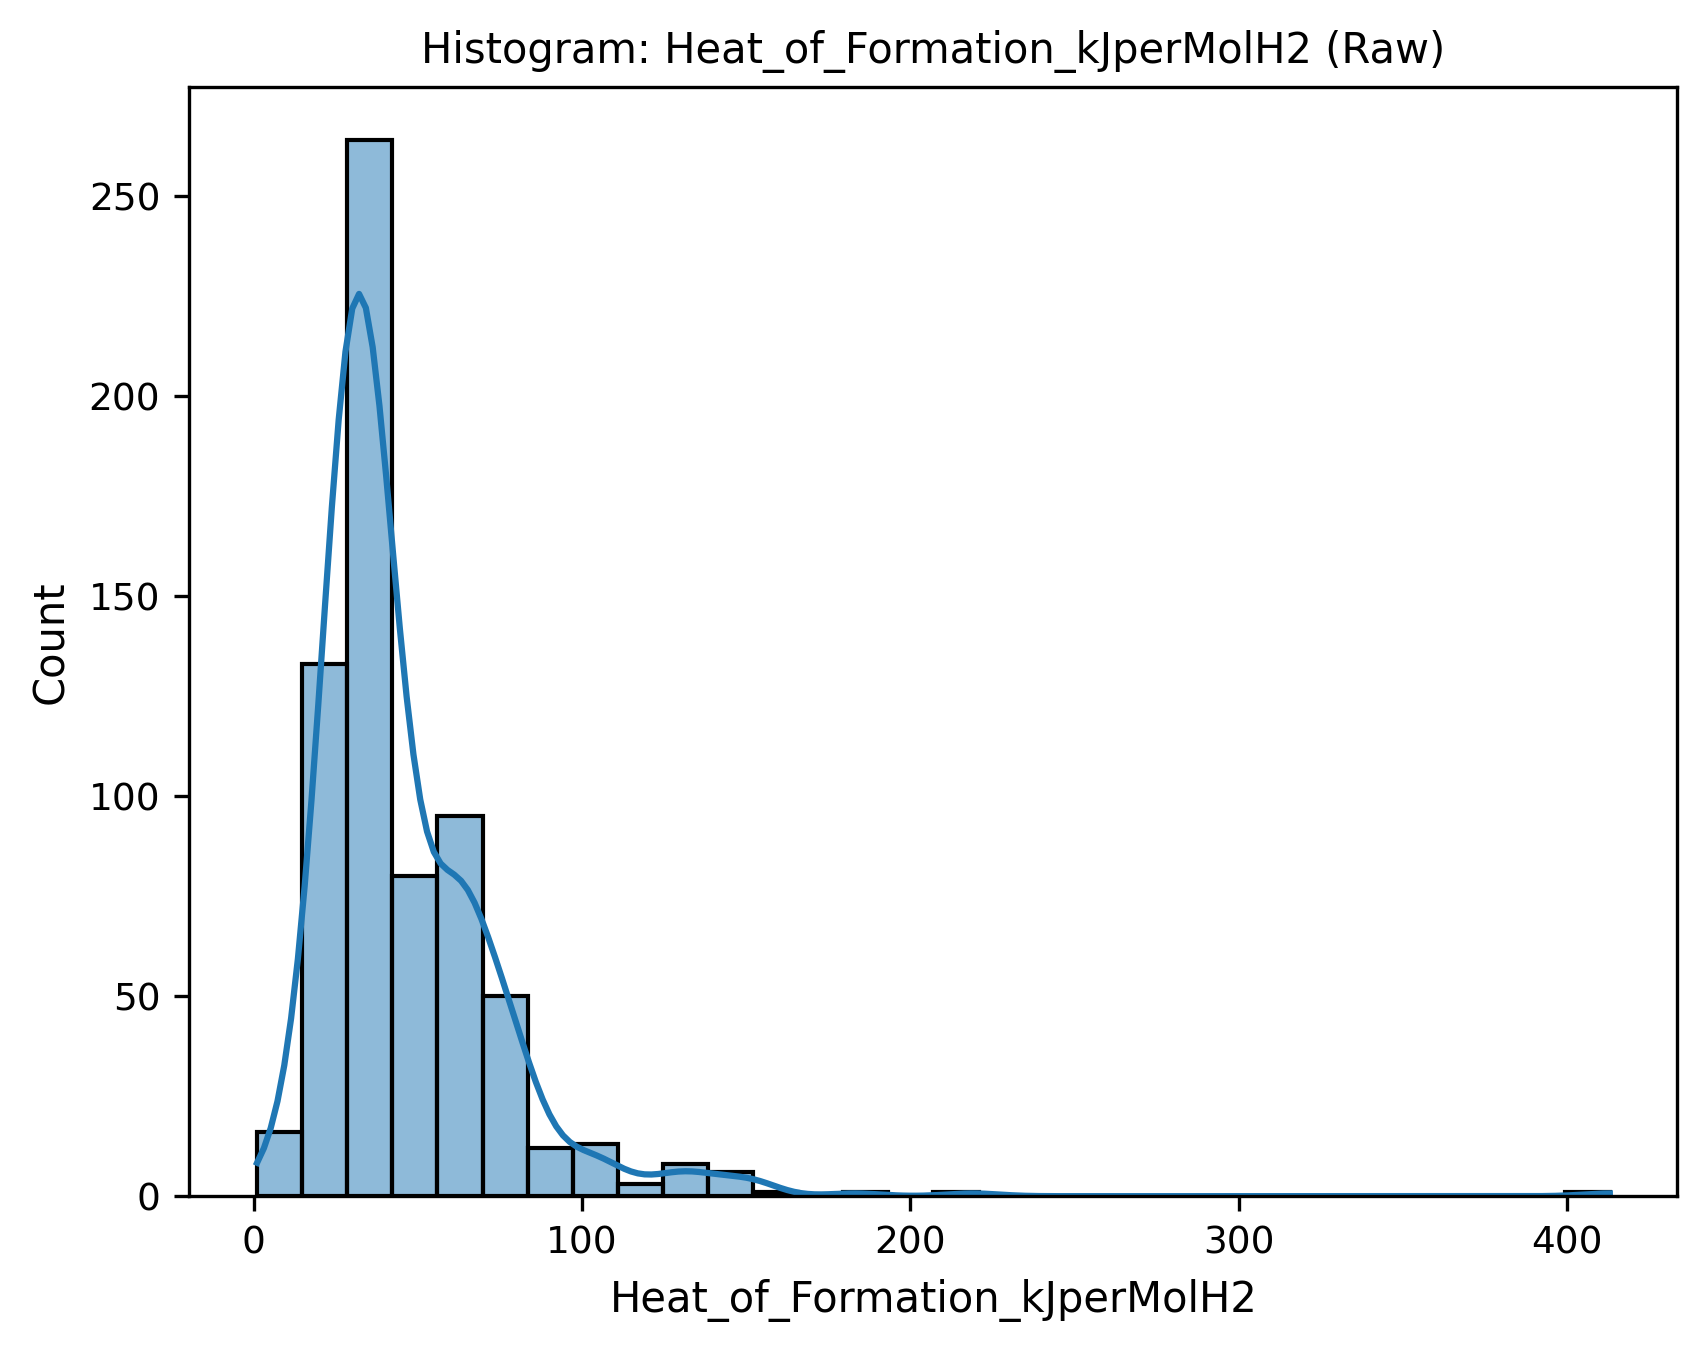

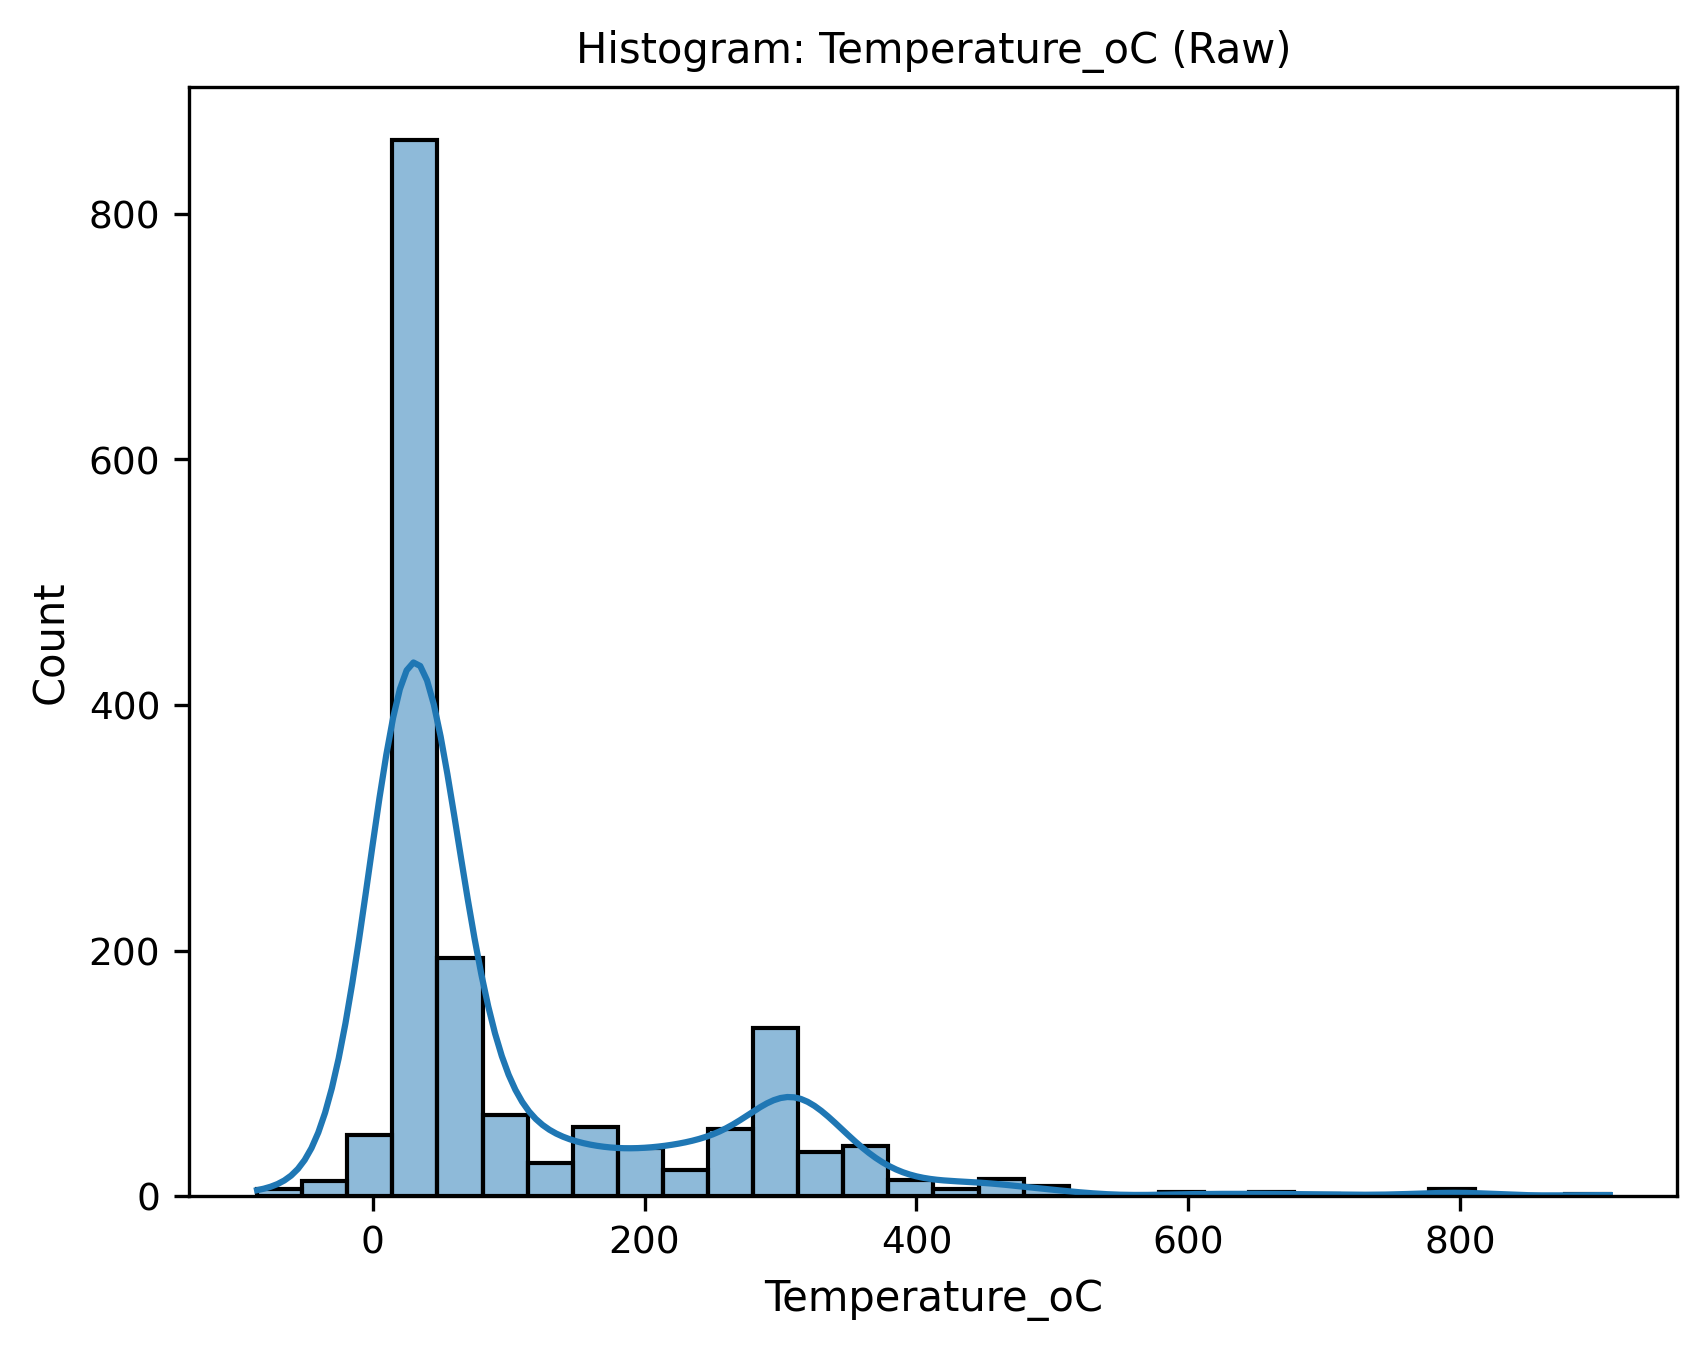

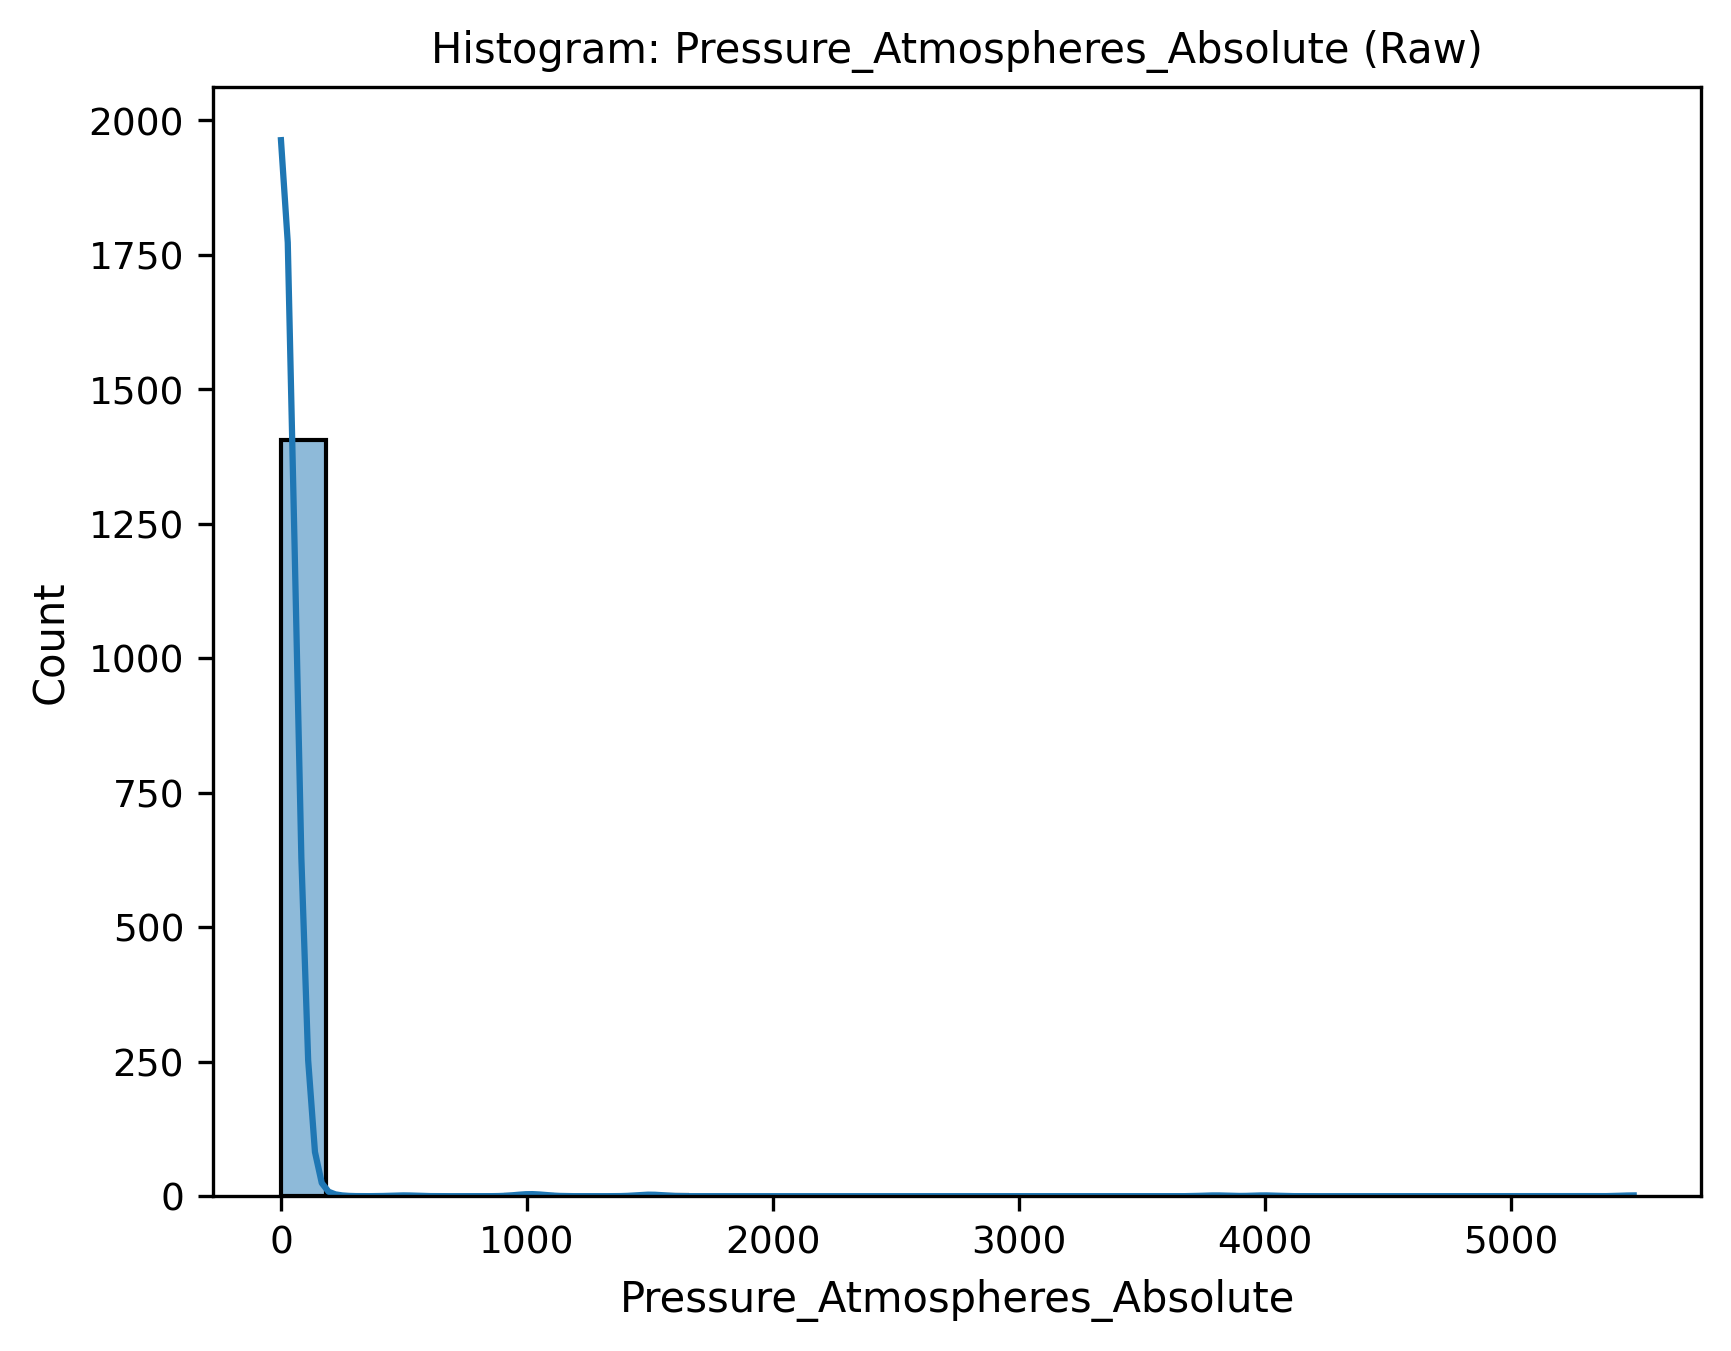

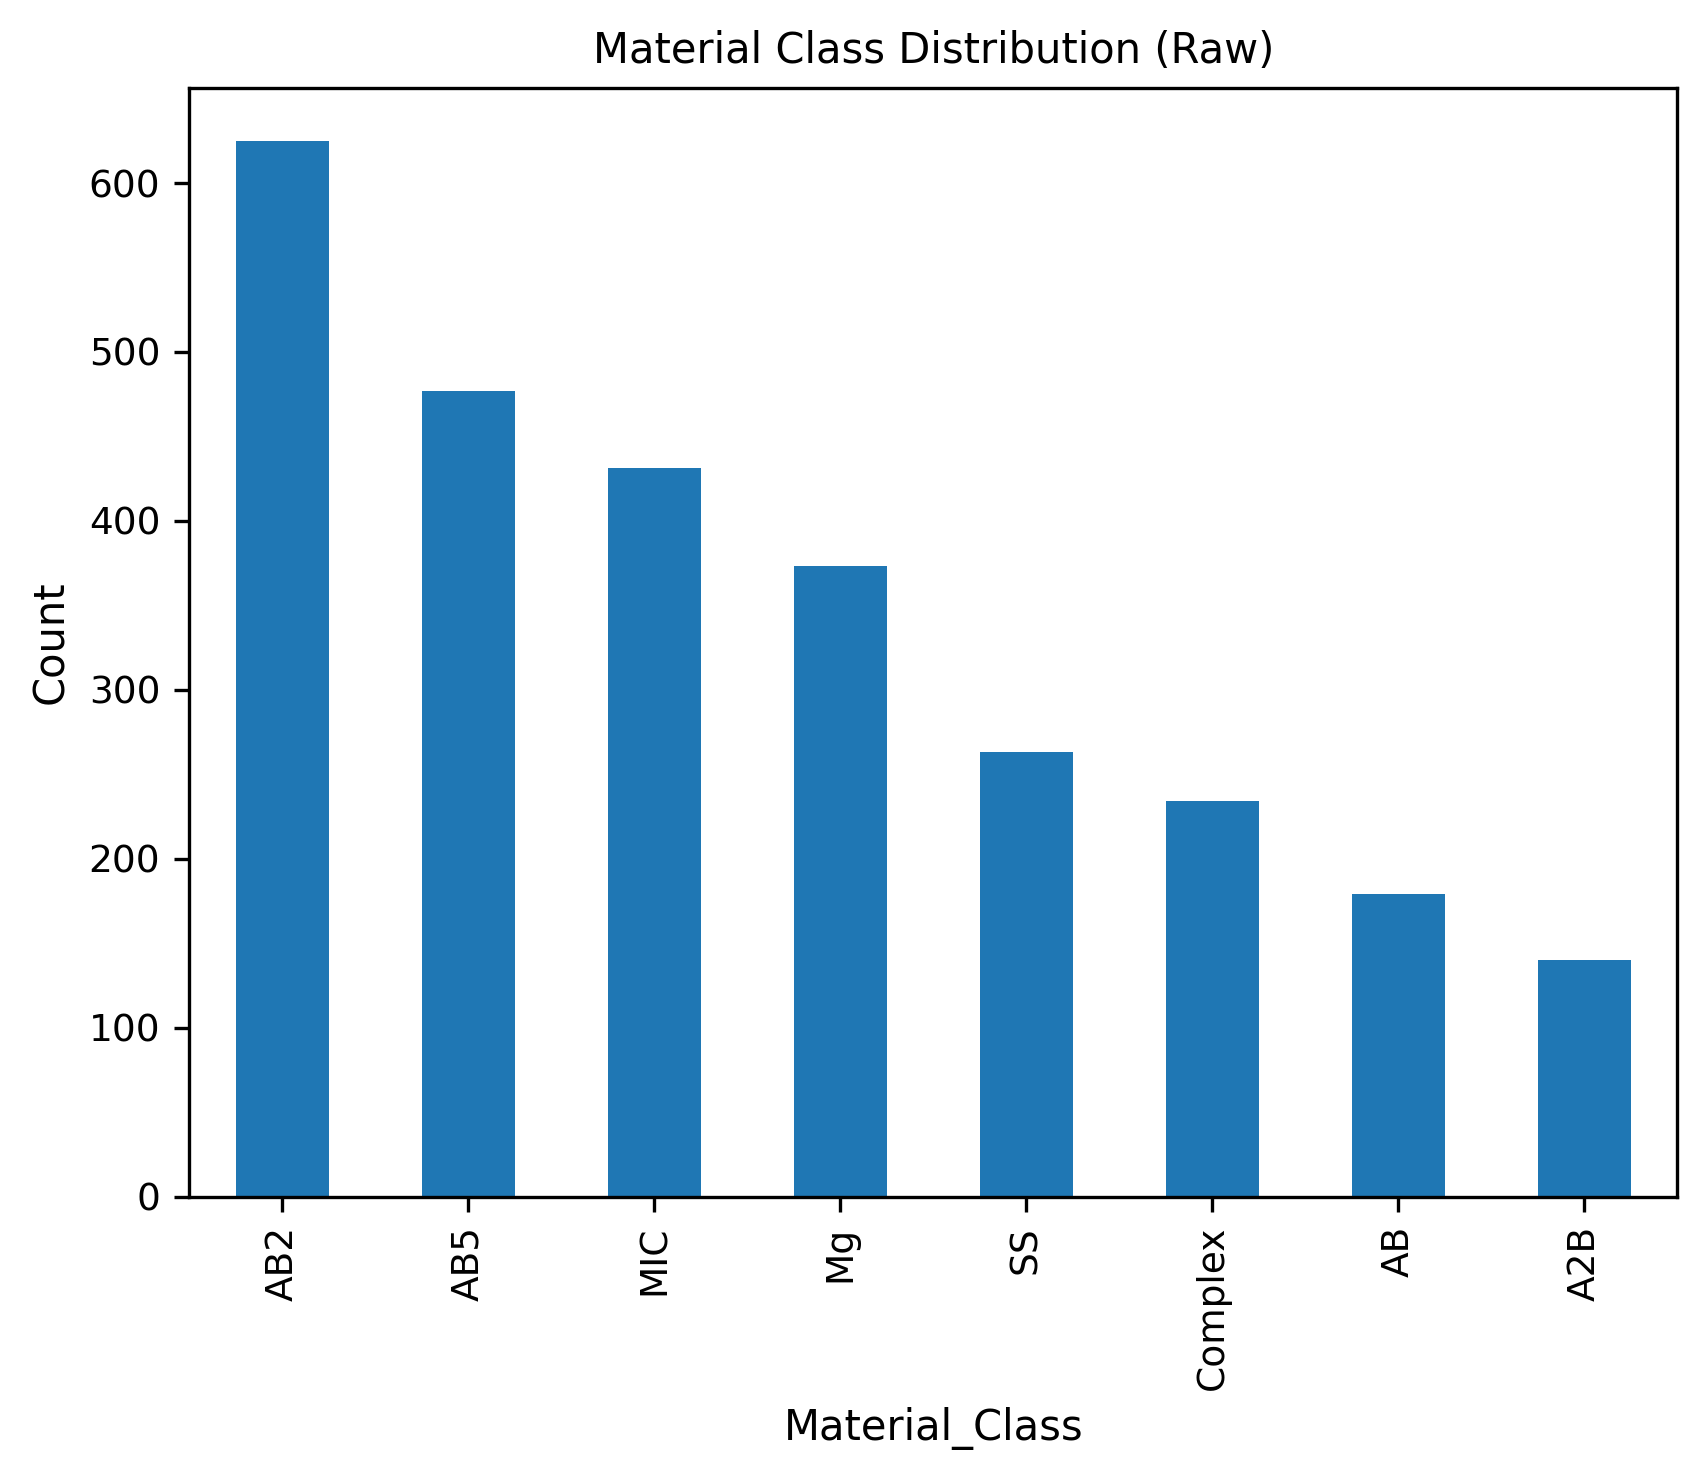

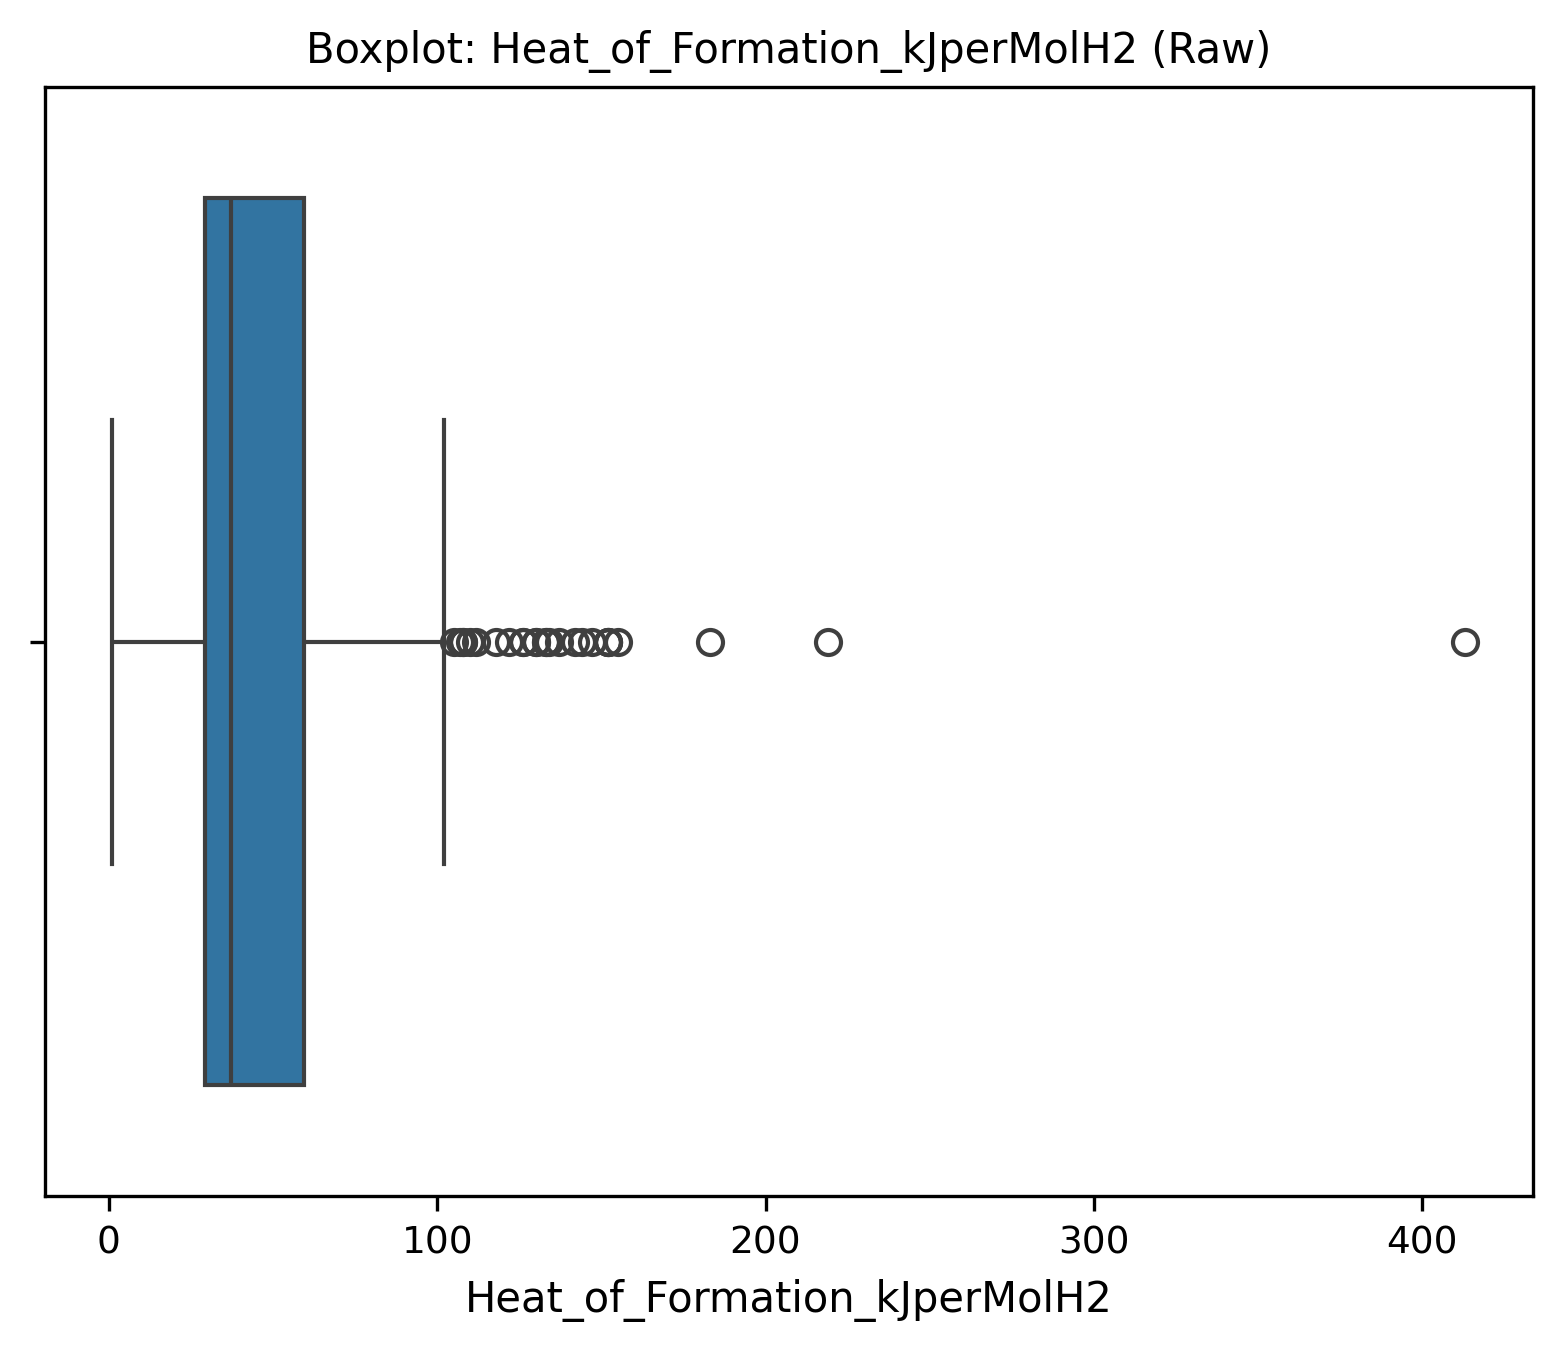

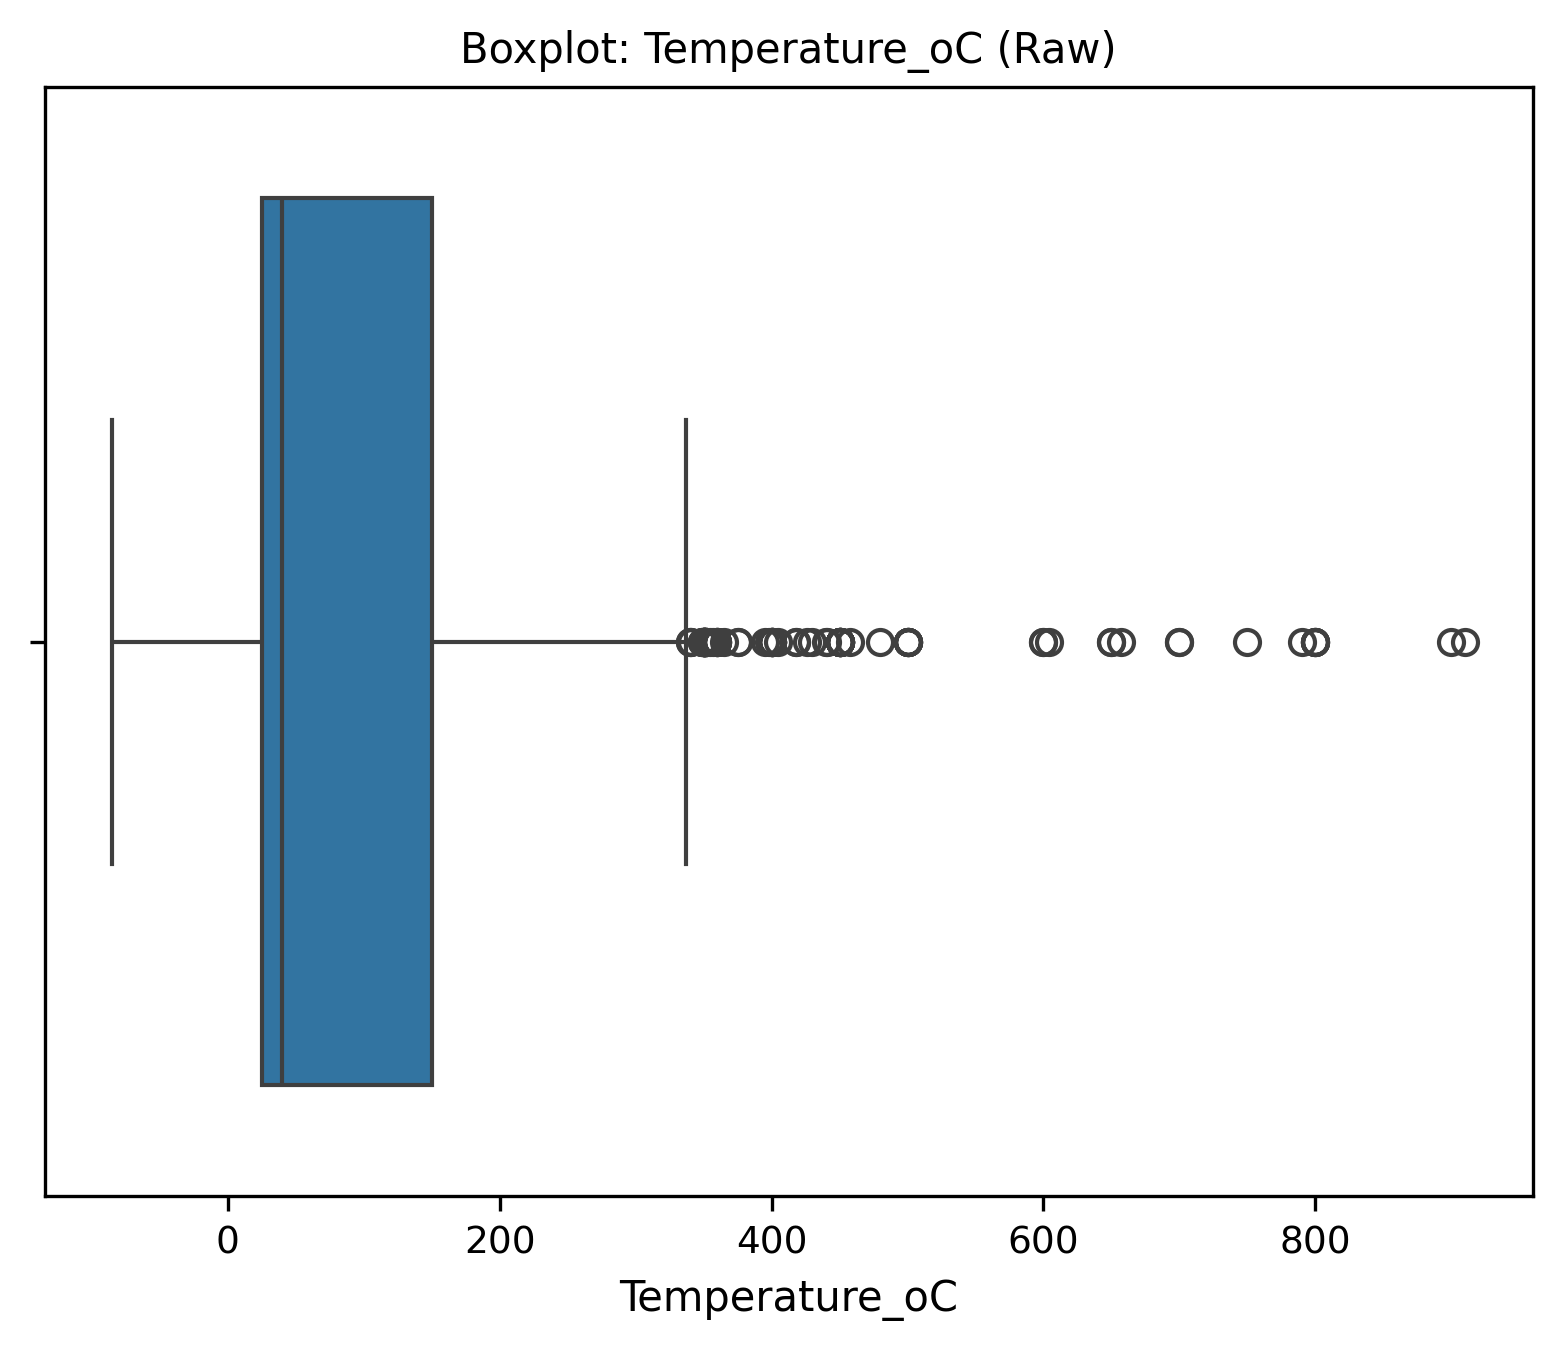

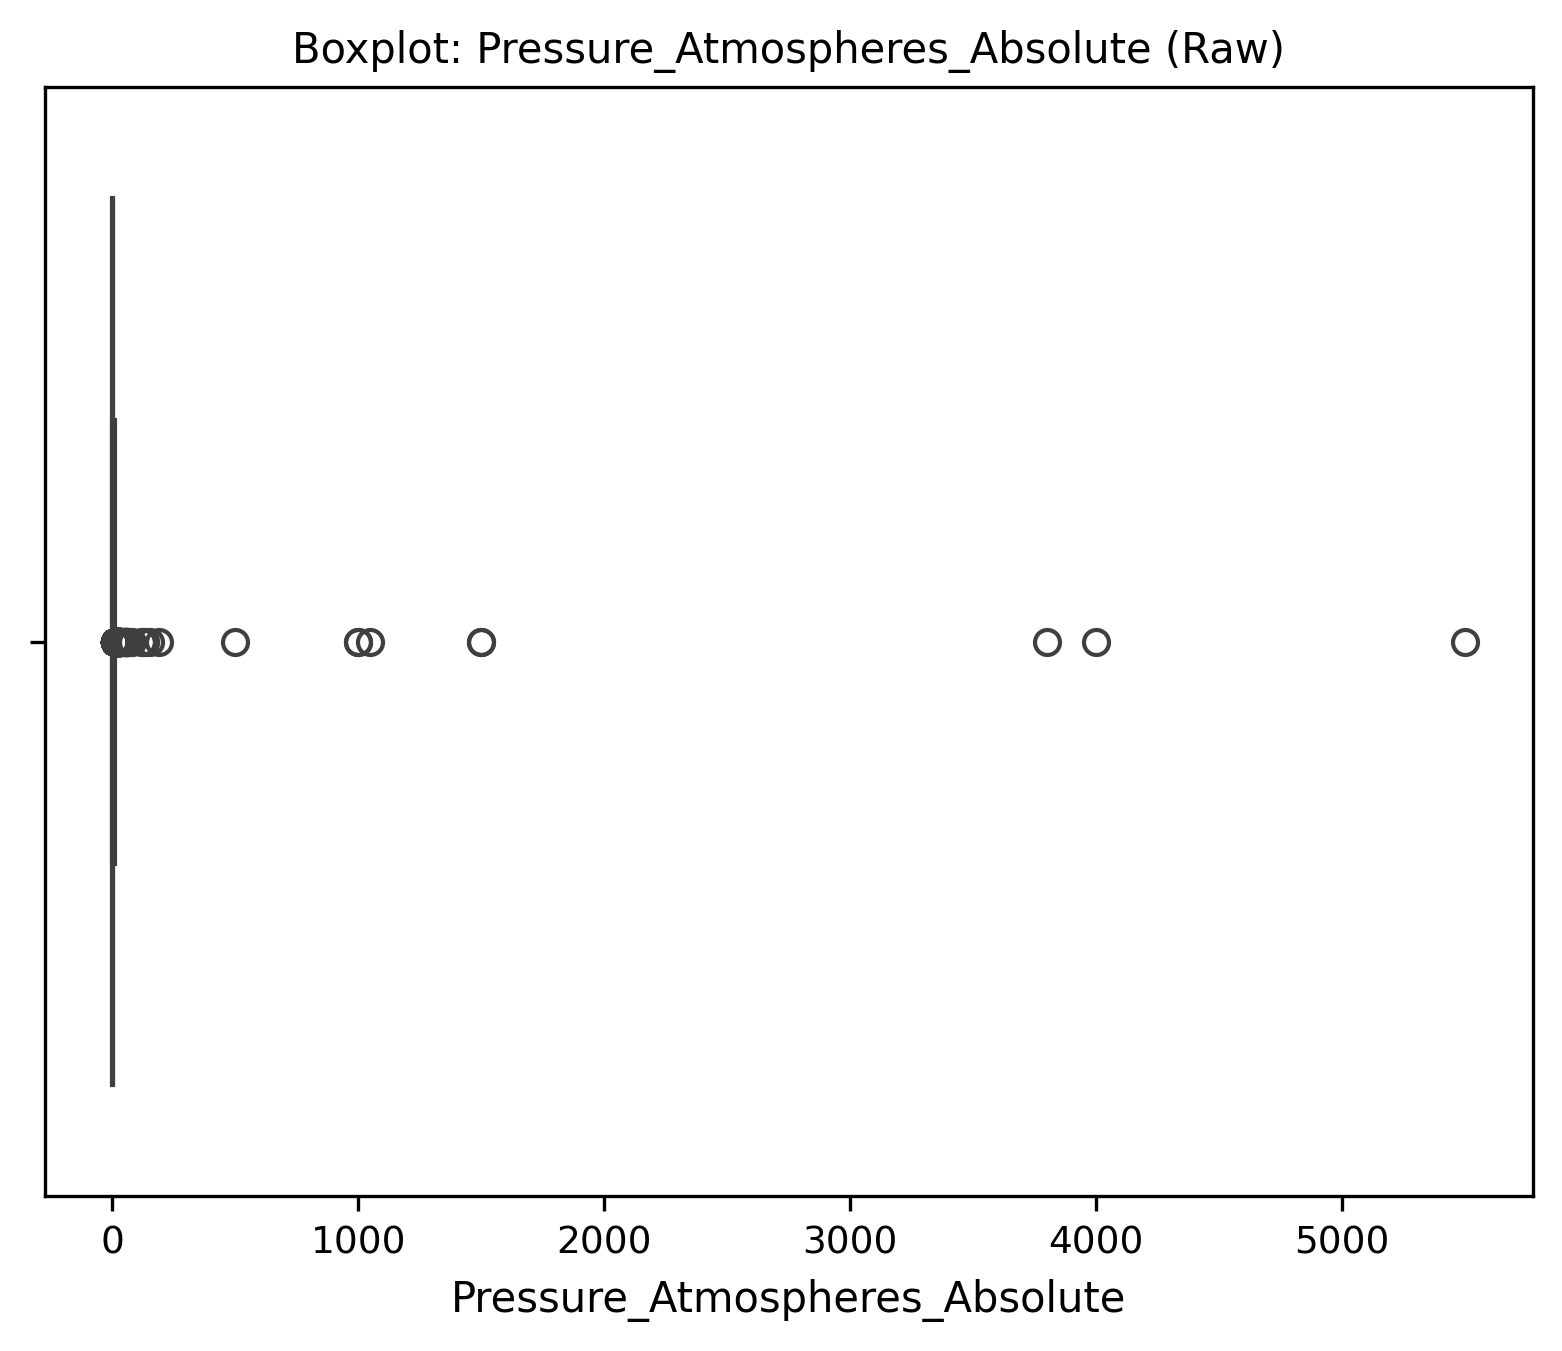

Warning! No Materials Project API key provided, will only work if
reusing previously extracted MP features
Removing rows with class []
Action to take for any Composition Formula with Mm: delete
Action to take for any Composition Formula in wt percent (contains -): delete
Cleaning AlAgH4 to Al1.0000Ag1.0000
Cleaning AgBH4 to Ag1.0000B1.0000
Cleaning Al(BH4)3 to Al1.0000B3.0000
Cleaning Al(BH4)3 to Al1.0000B3.0000
Cleaning Ba(BH4)2 to Ba1.0000B2.0000
Cleaning Ba2MgH6 to Ba2.0000Mg1.0000
Cleaning Ba2H6Os to Ba2.0000Os1.0000
Cleaning Ba2H6Pt to Ba2.0000Pt1.0000
Cleaning Ba2H6Ru to Ba2.0000Ru1.0000
Cleaning Ba3(H6Ir)2 to Ba3.0000Ir2.0000
Cleaning BaMg2H8Os to Ba1.0000Mg2.0000Os1.0000
Cleaning BaMg2H8Ru to Ba1.0000Mg2.0000Ru1.0000
Cleaning BaMgH4 to Ba1.0000Mg1.0000
Cleaning BaReH9 to Ba1.0000Re1.0000
Cleaning Be(AlH4)2 to Be1.0000Al2.0000
Cleaning Be(BH4)2 to Be1.0000B2.0000
Cleaning Be(BH4)2 to Be1.0000B2.0000
Cleaning Ca(AlH4)2 to Al2.0000Ca1.0000
Cleaning Ca(AlH4)2 to Al2.0000Ca1.0000
Cl

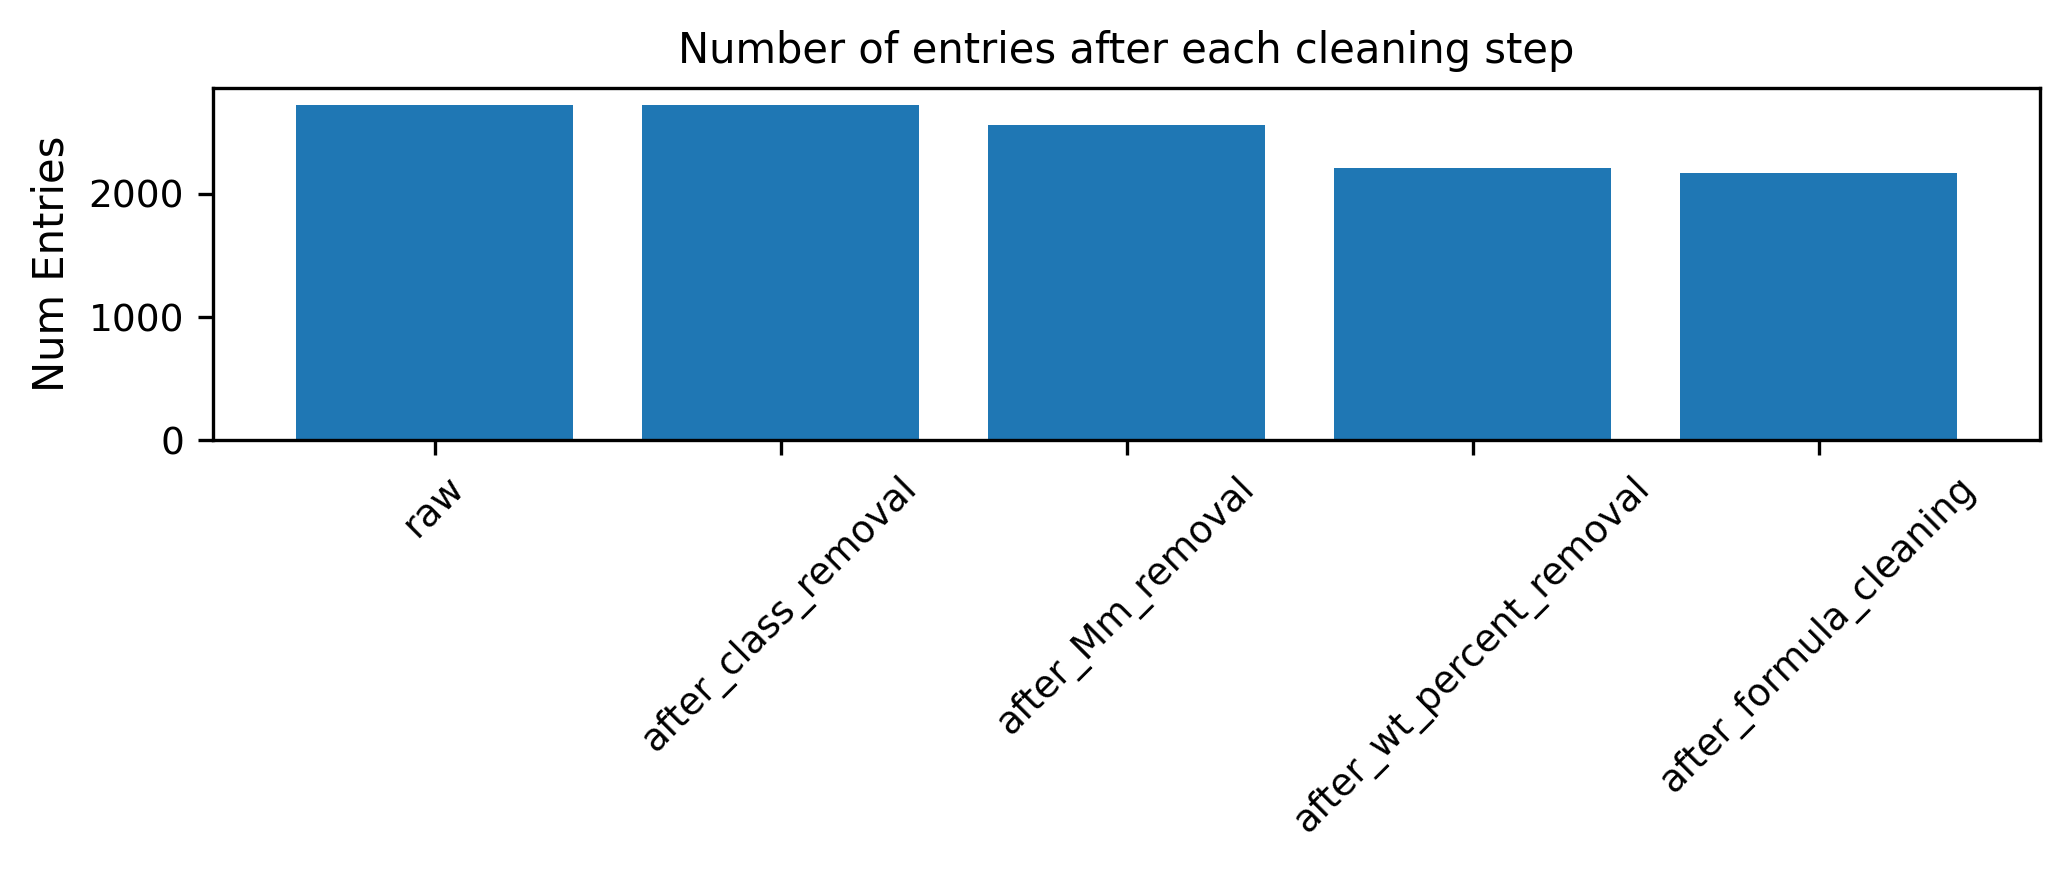


=== RAW ===
                                count unique              top freq       mean  \
Item_No                          2723   2723                1    1        NaN   
Material_Class                   2722      8              AB2  625        NaN   
Composition_Formula              2722   2021            Mg2Ni   36        NaN   
Hydrogen_Weight_Percent        2585.0    NaN              NaN  NaN   2.114066   
Heat_of_Formation_kJperMolH2      781    426               30   11        NaN   
Temperature_oC                   1660    161               25  182        NaN   
Pressure_Atmospheres_Absolute    1647    411                1  156        NaN   
Author_Year                      2722    820       Beck, 1962   74        NaN   
Reference_Number               2722.0    NaN              NaN  NaN  734.76892   
Comment1                          618    325          [AlH4]-   40        NaN   
Comment2                          204     52        Deuterium   26        NaN   
Comment3       

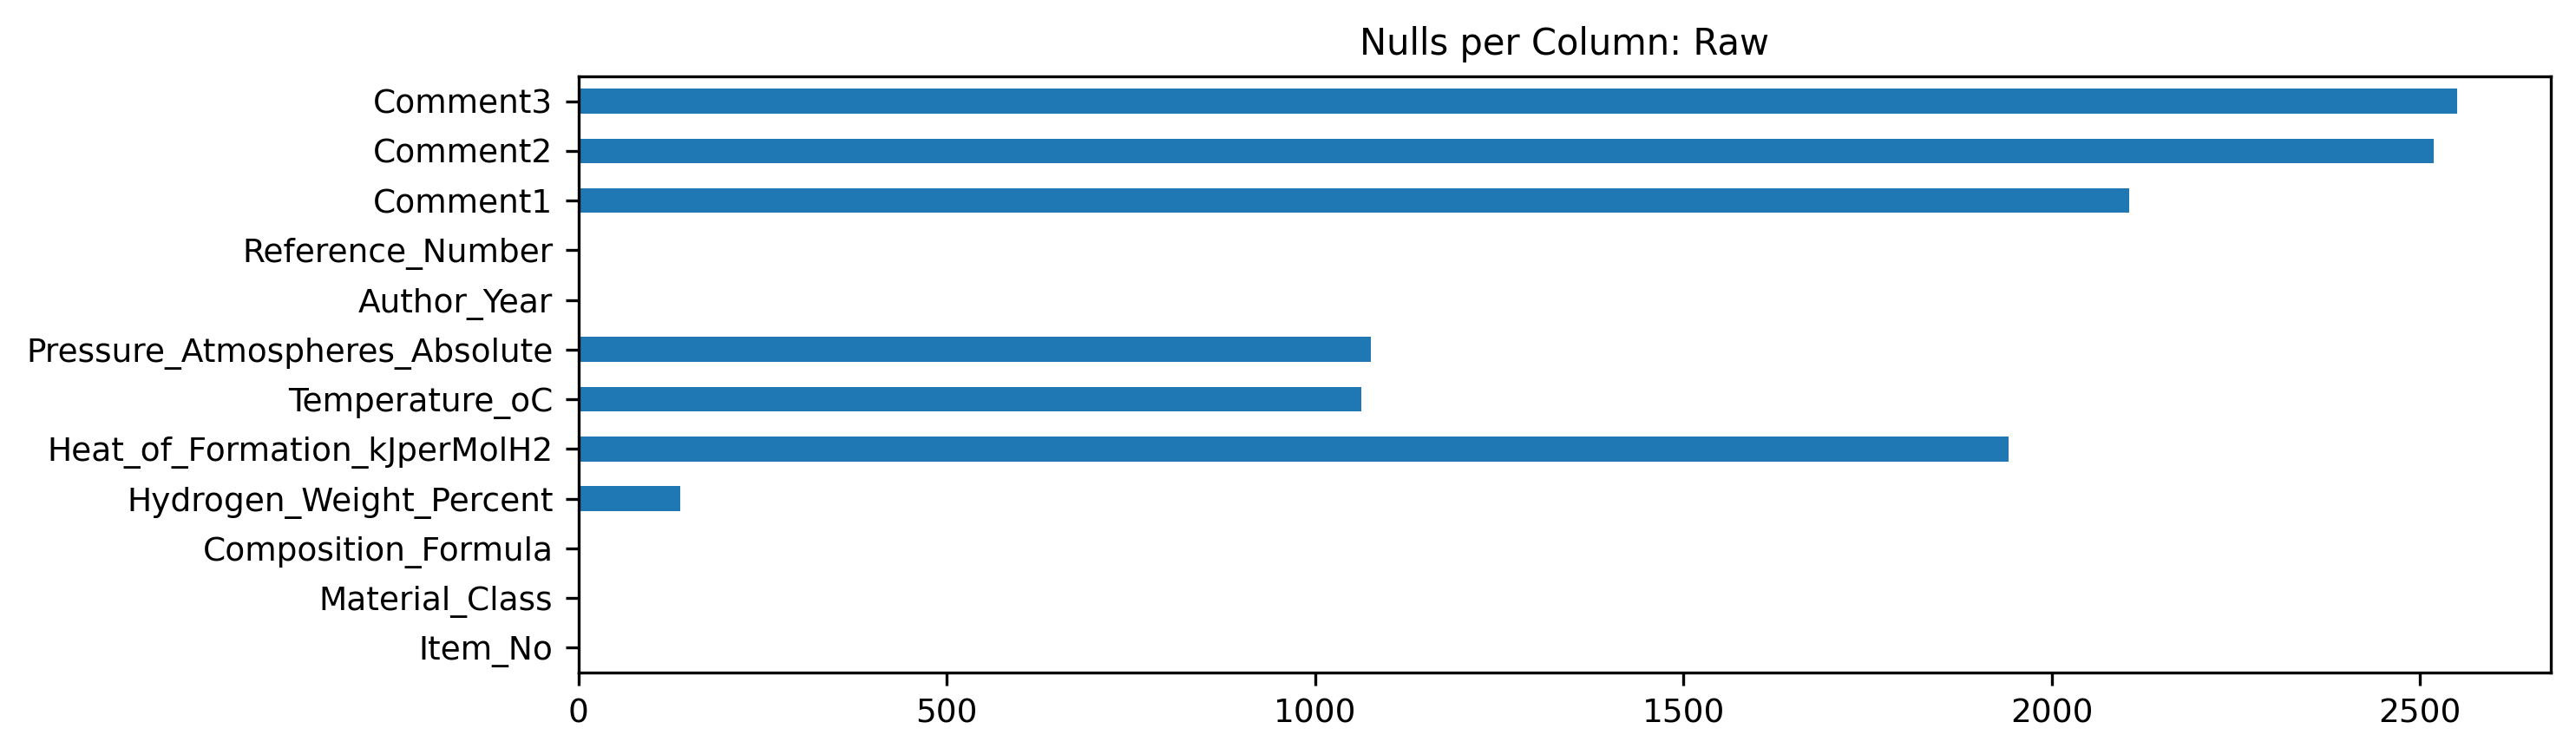

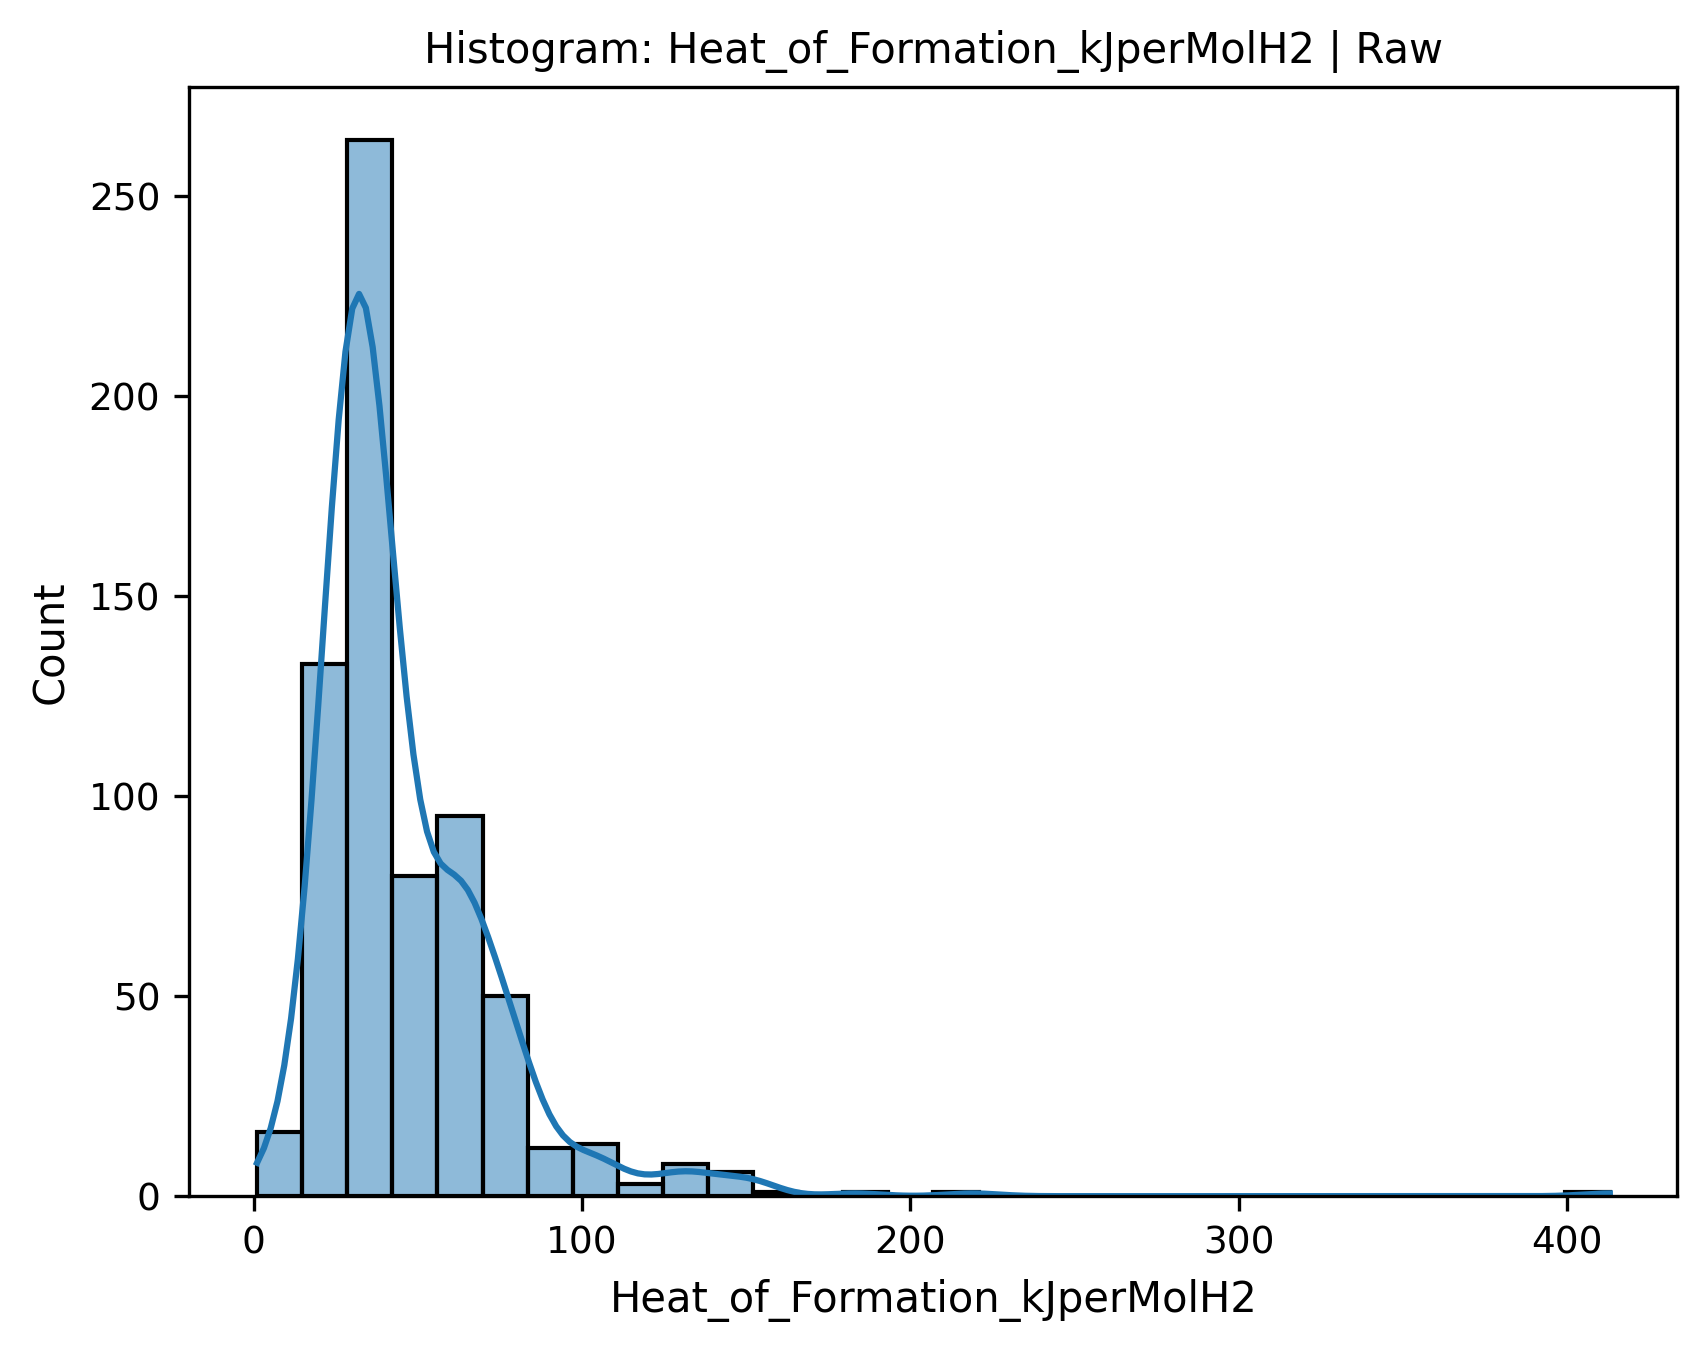

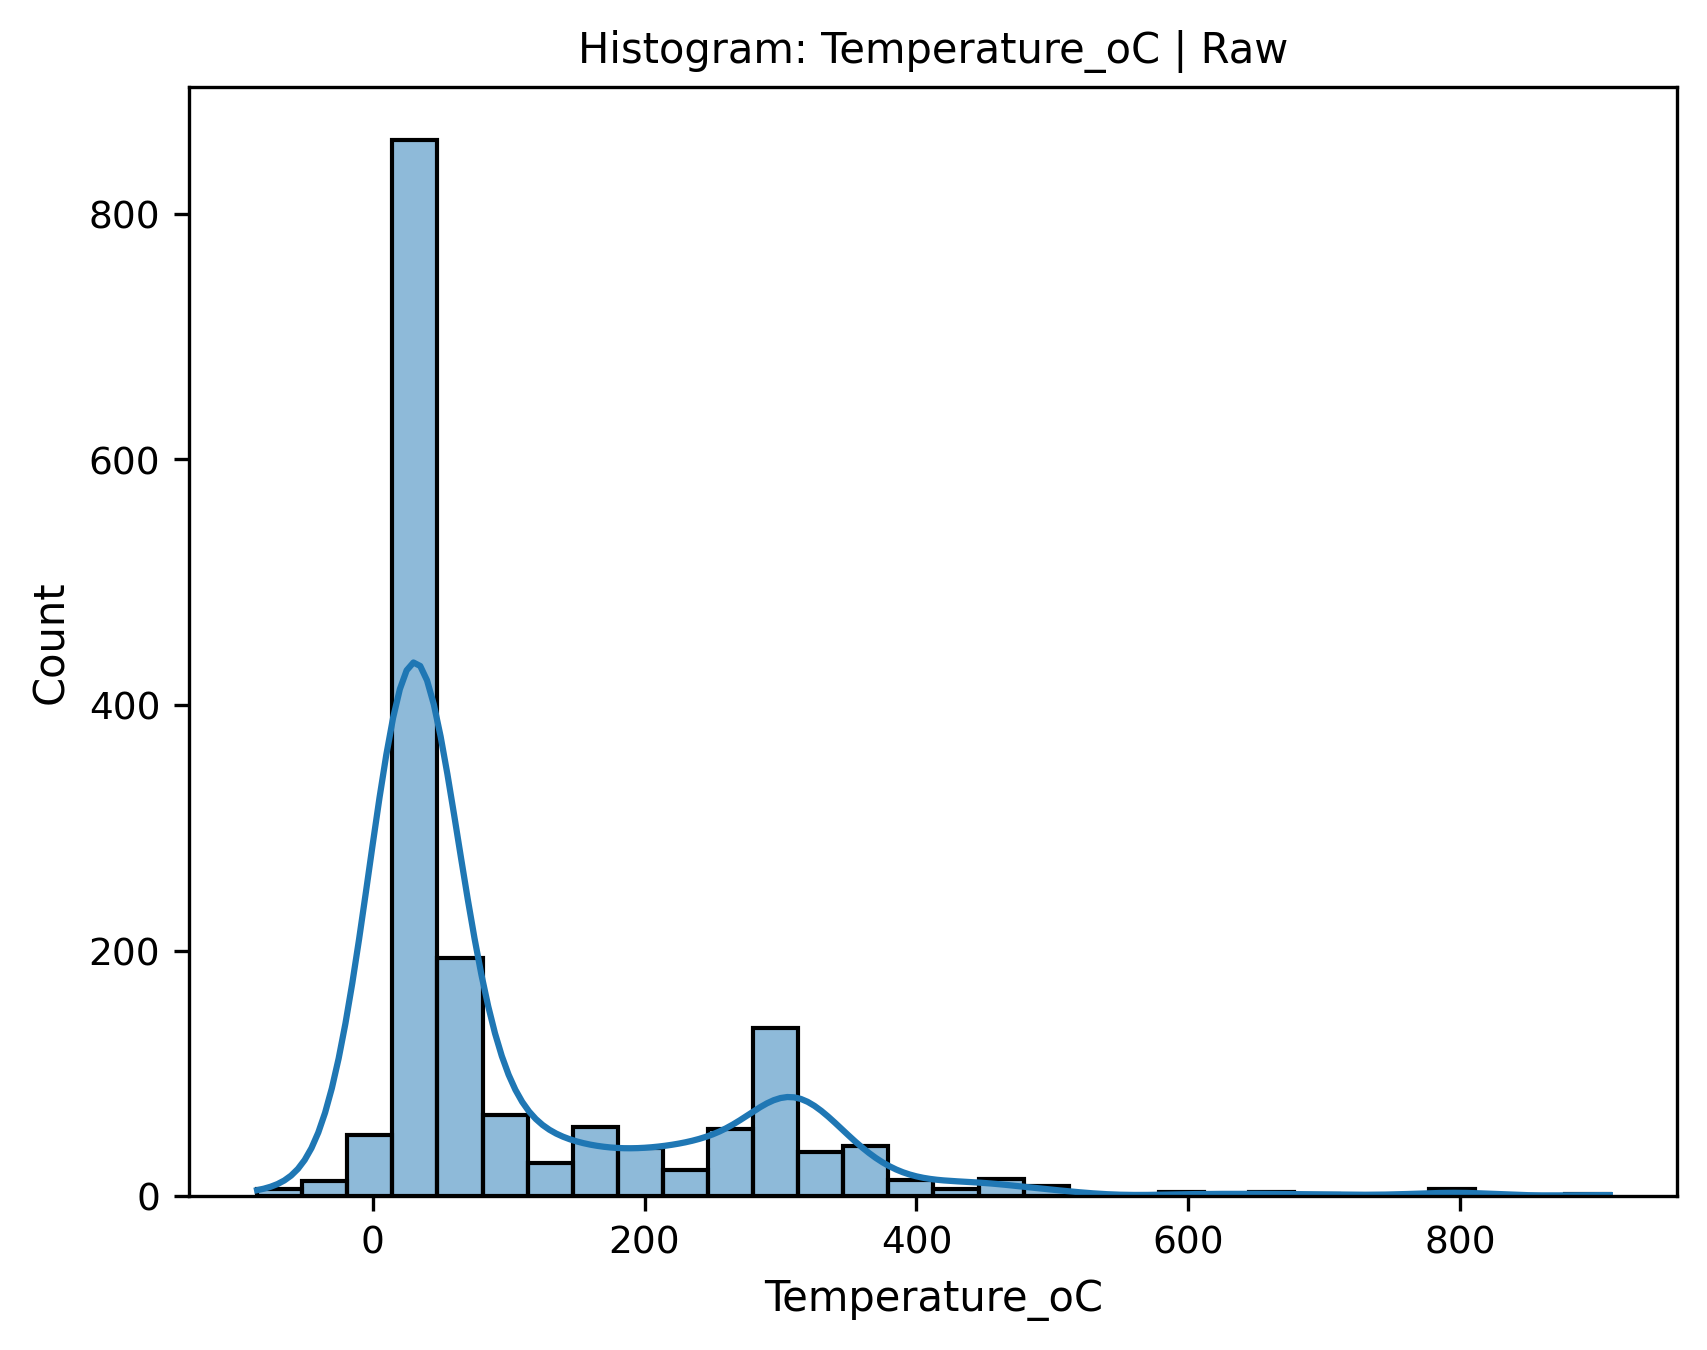

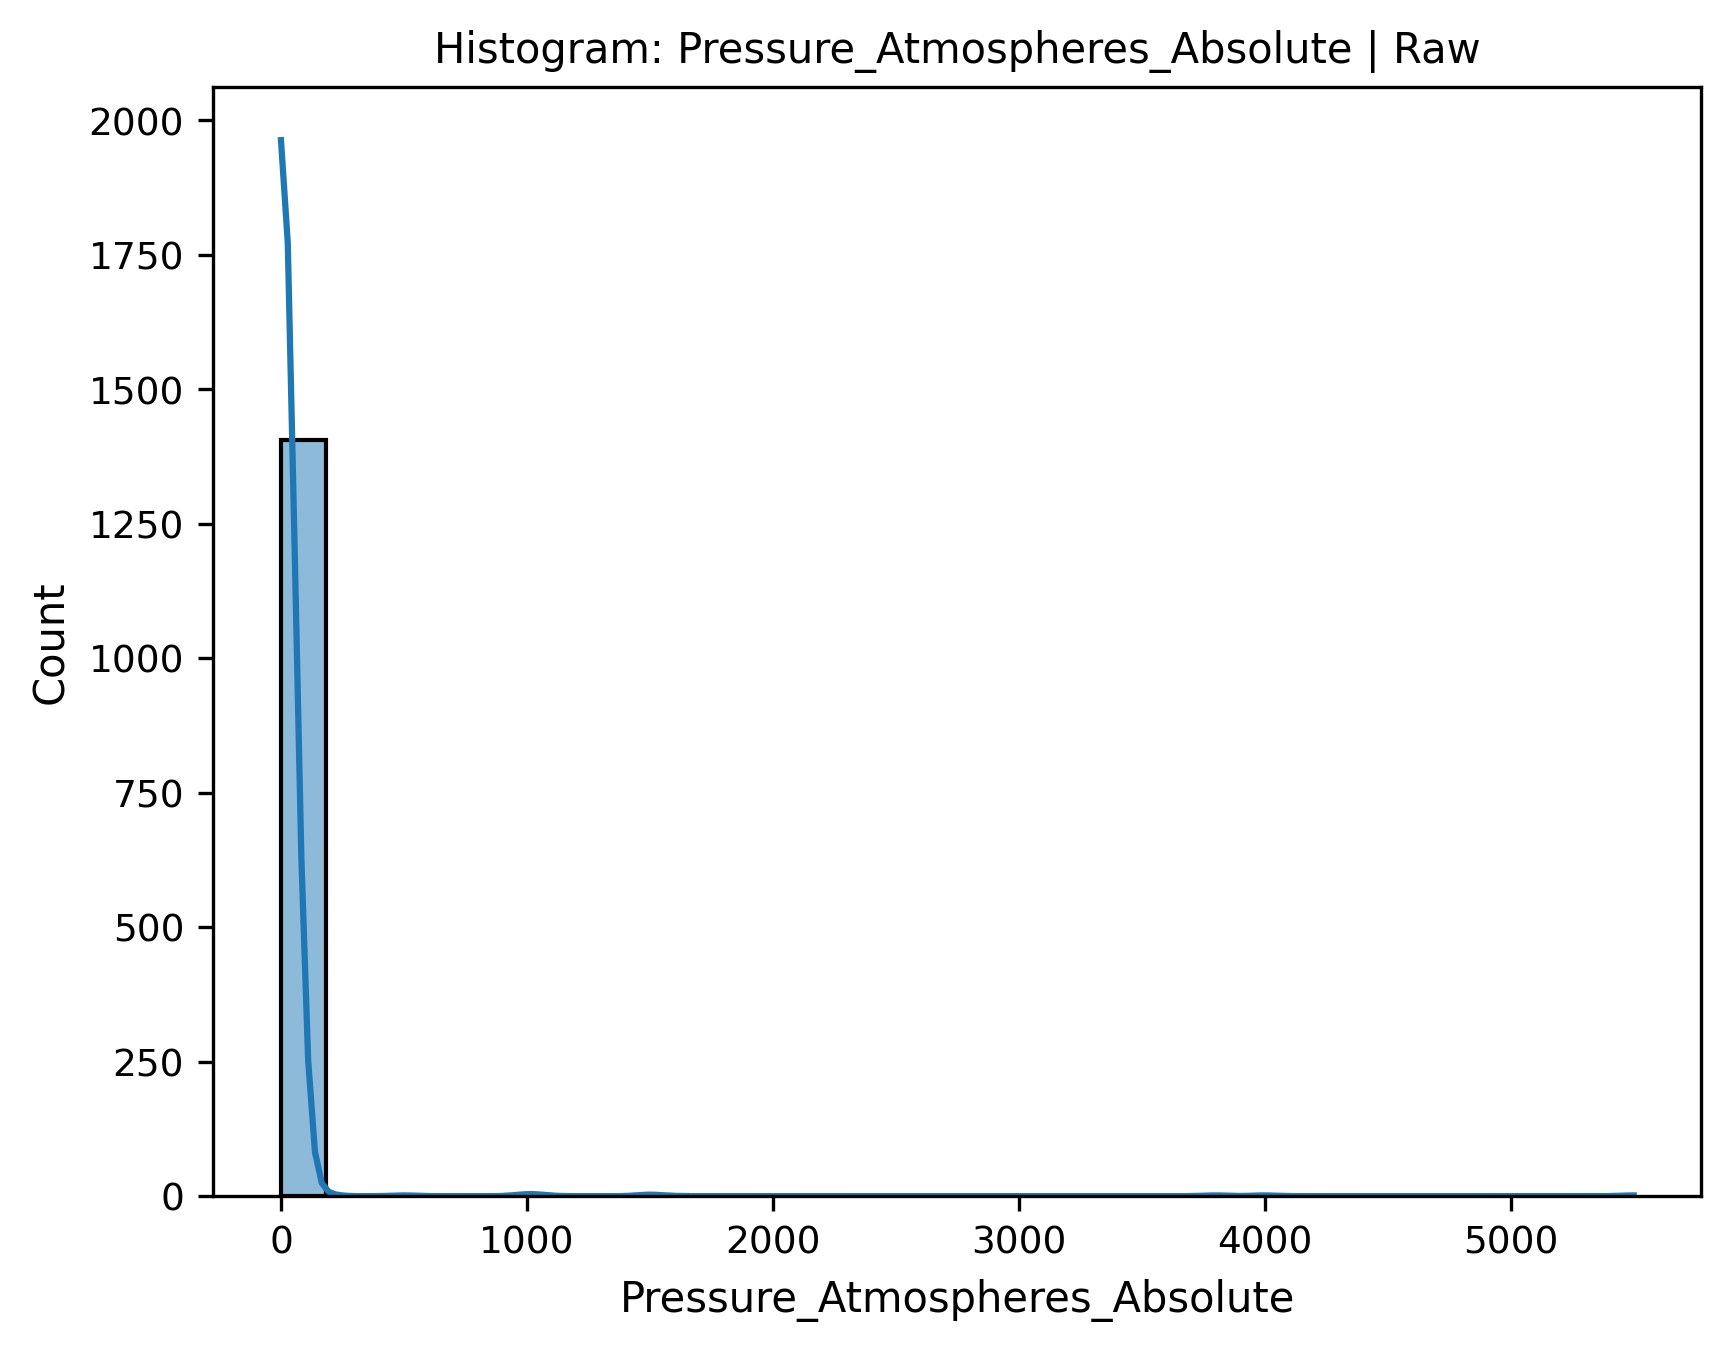

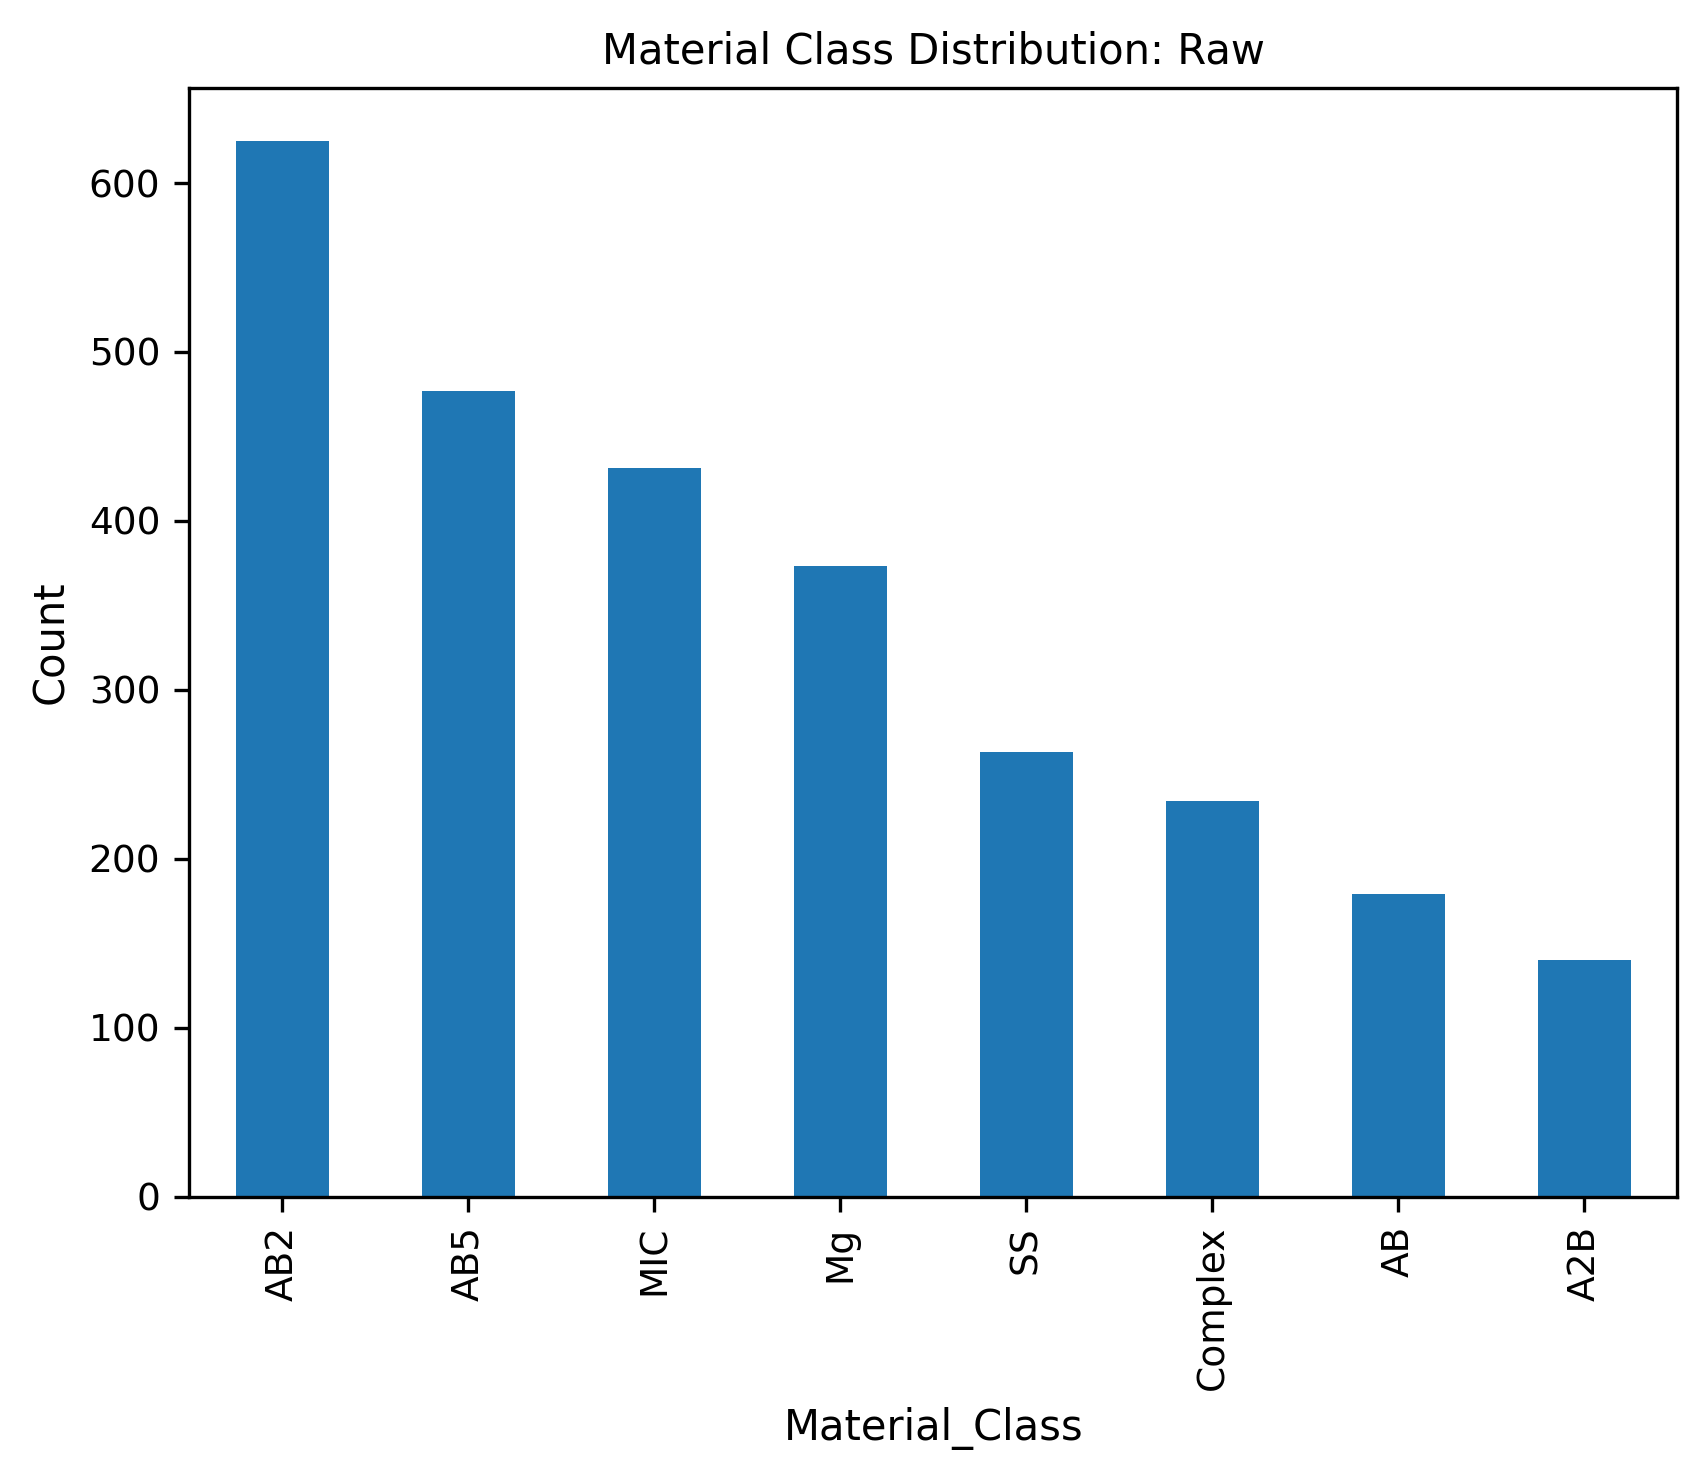

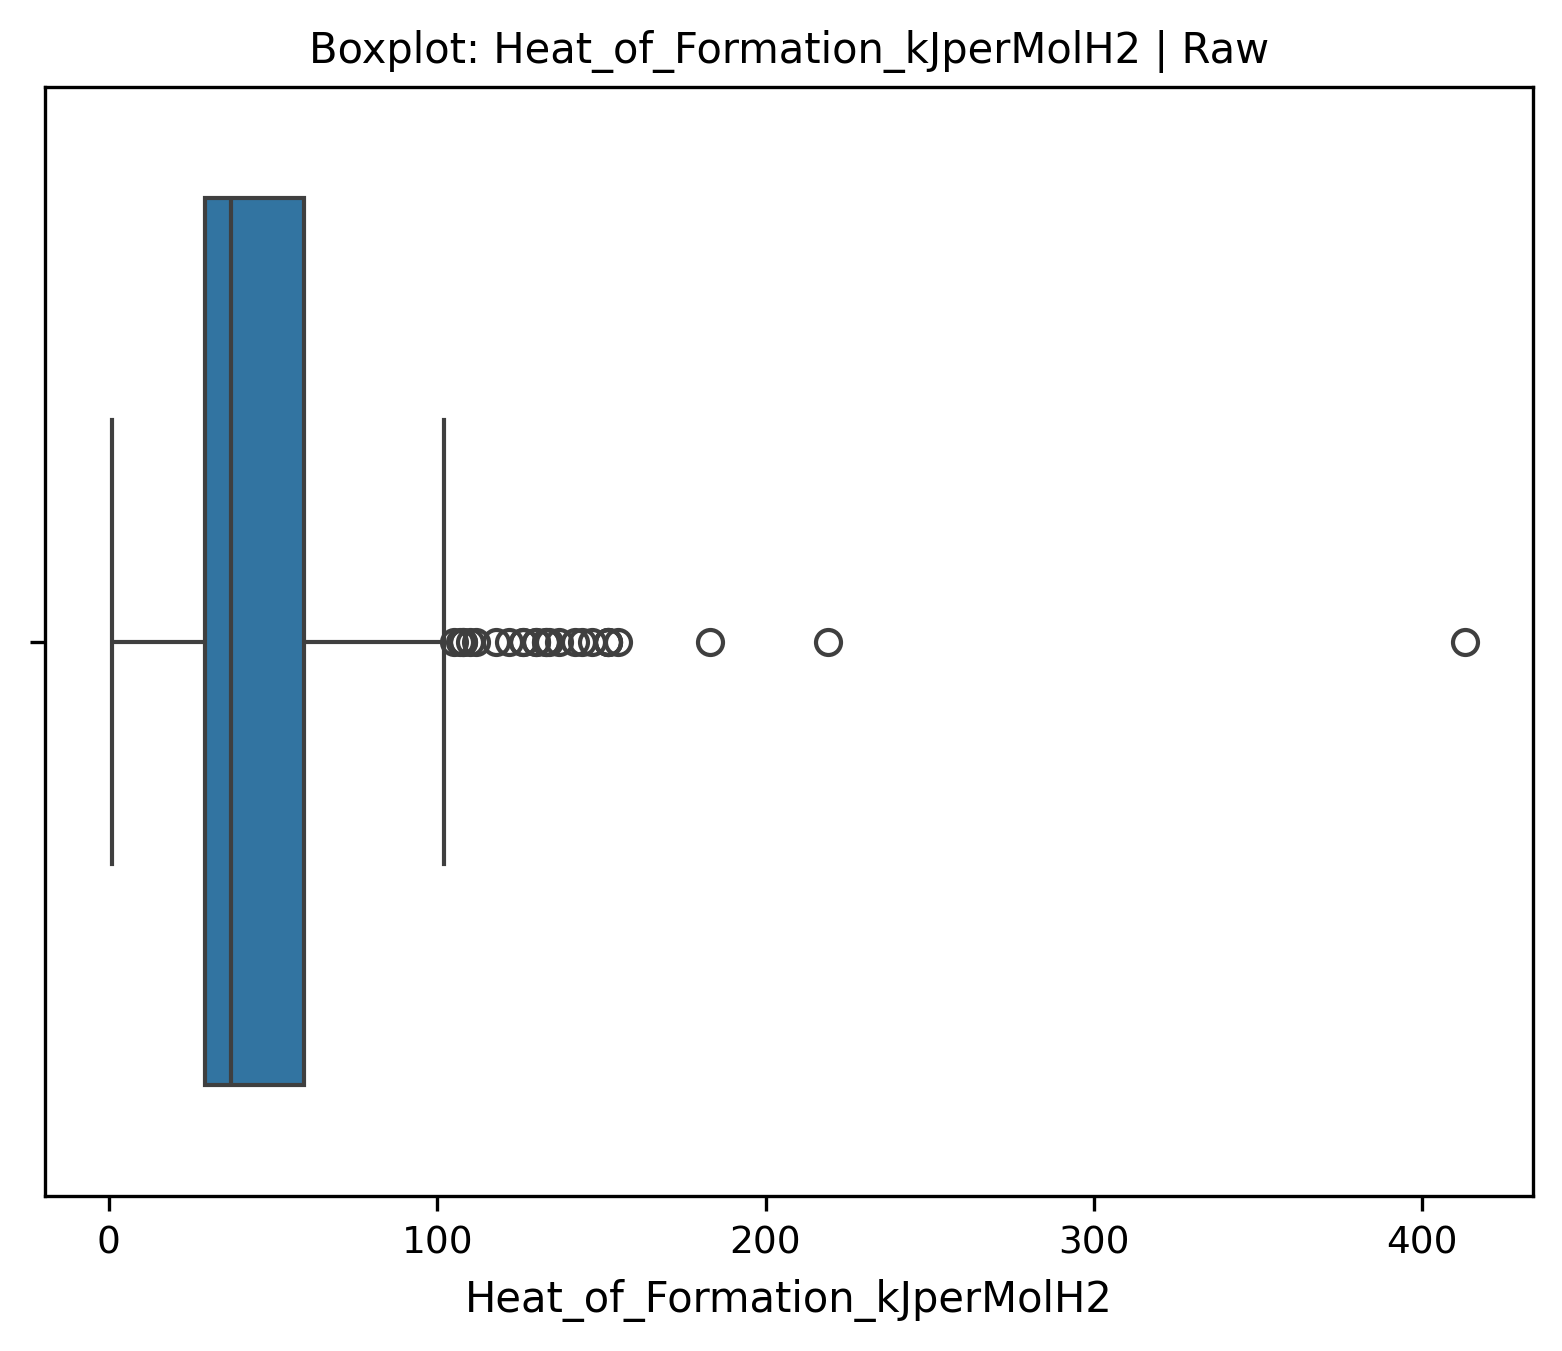

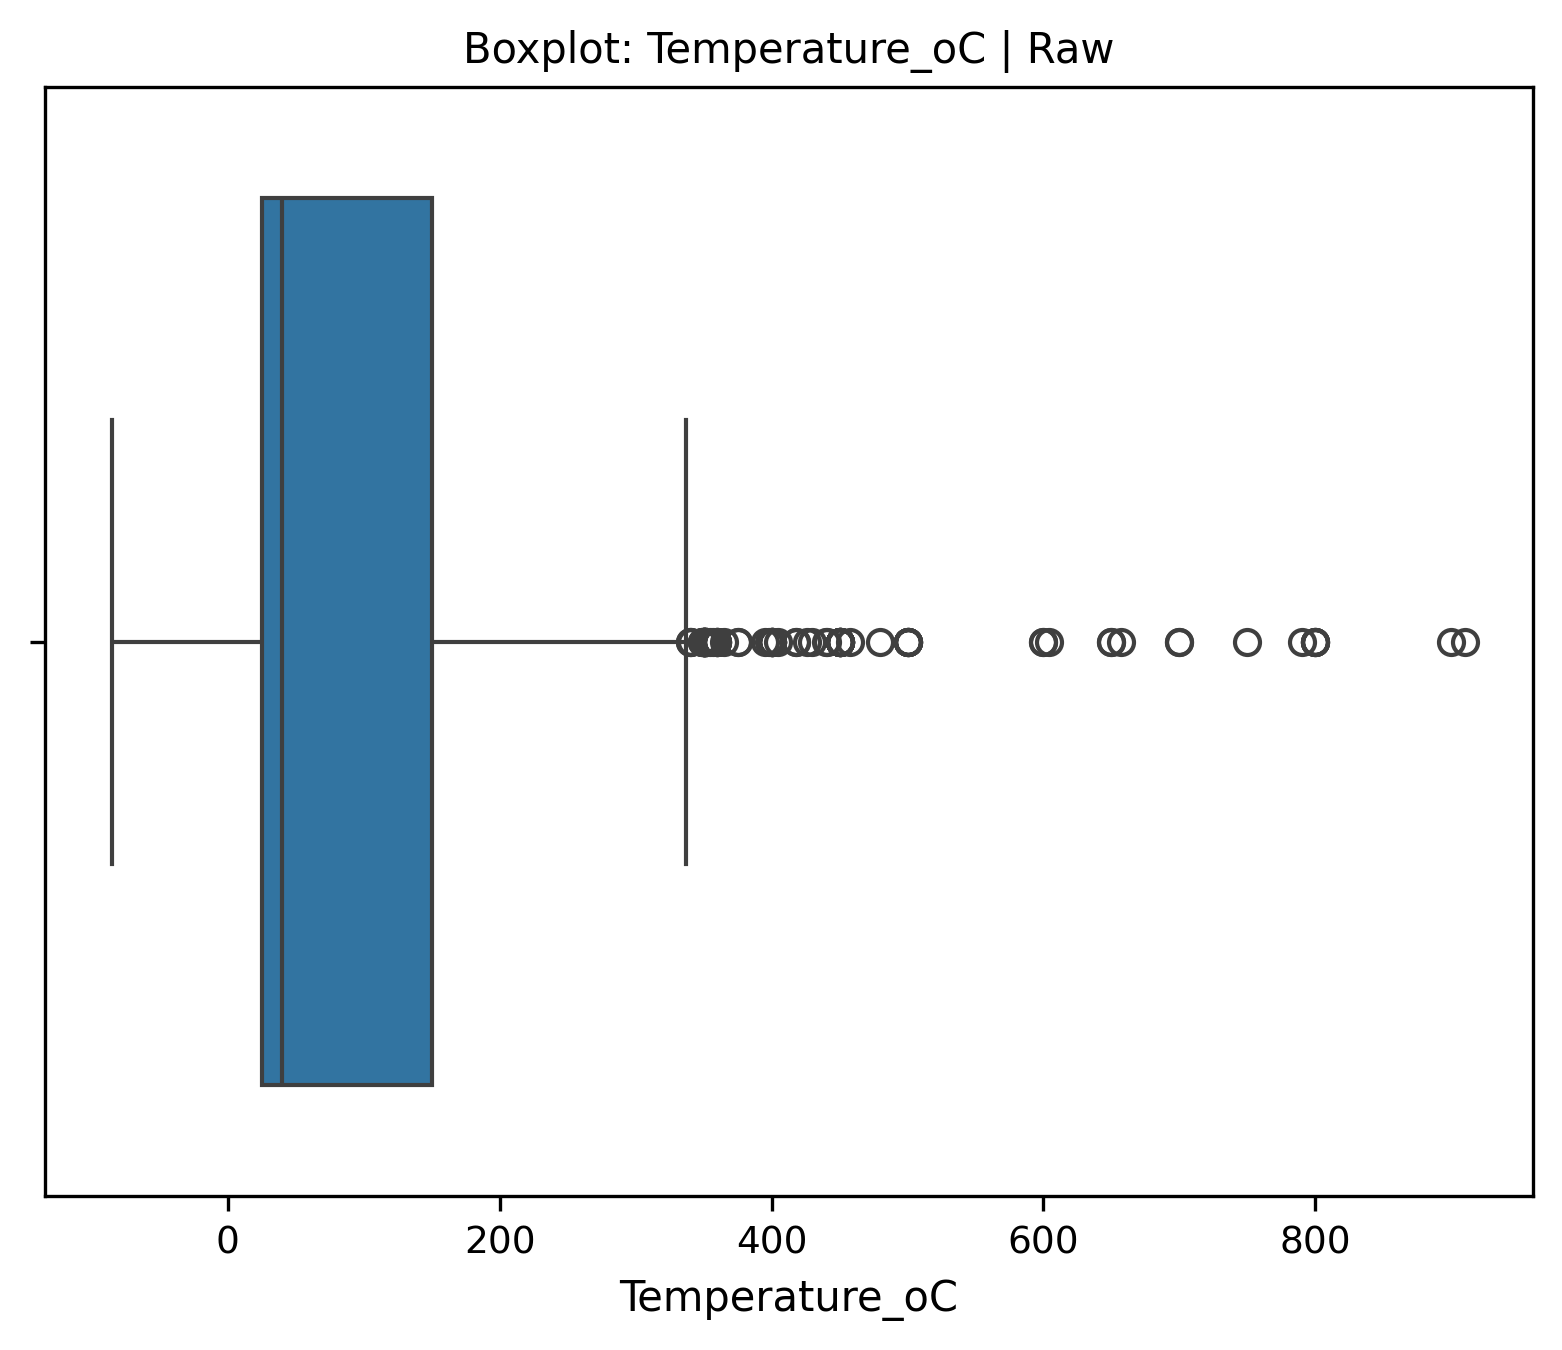

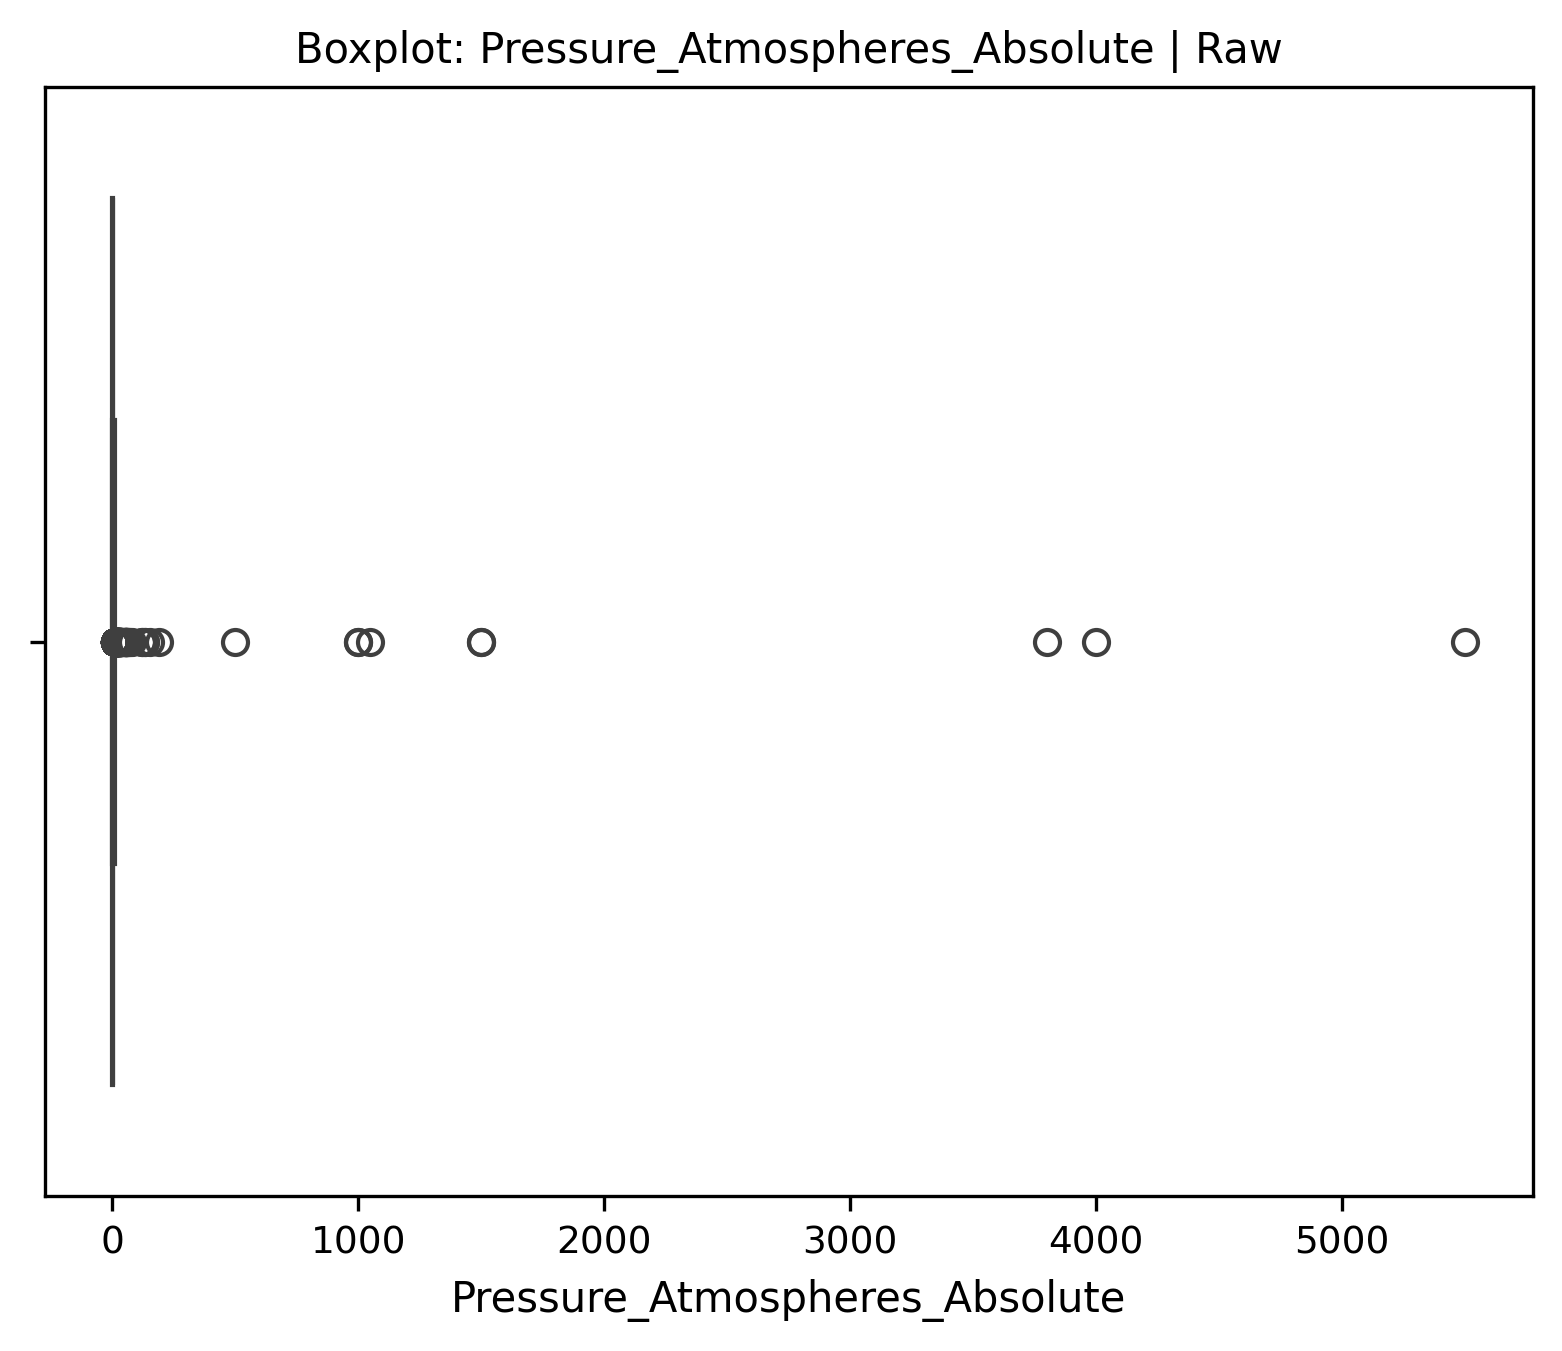


=== FINAL ===
                                count unique         top freq        mean  \
Item_No                          2173   2173           3    1         NaN   
Material_Class                   2173      8         AB2  537         NaN   
Composition_Formula              2173   1431       Mg2Ni   36         NaN   
Hydrogen_Weight_Percent        2058.0    NaN         NaN  NaN    2.095515   
Heat_of_Formation_kJperMolH2      638    331          40   10         NaN   
Temperature_oC                   1297    152          20  128         NaN   
Pressure_Atmospheres_Absolute    1284    220           1  151         NaN   
Author_Year                      2173    675  Beck, 1962   73         NaN   
Reference_Number               2173.0    NaN         NaN  NaN  727.704096   
Comment1                          268     75     [AlH4]-   40         NaN   
Comment2                          156     44   Deuterium   26         NaN   
Comment3                          134     27  No plateau   31

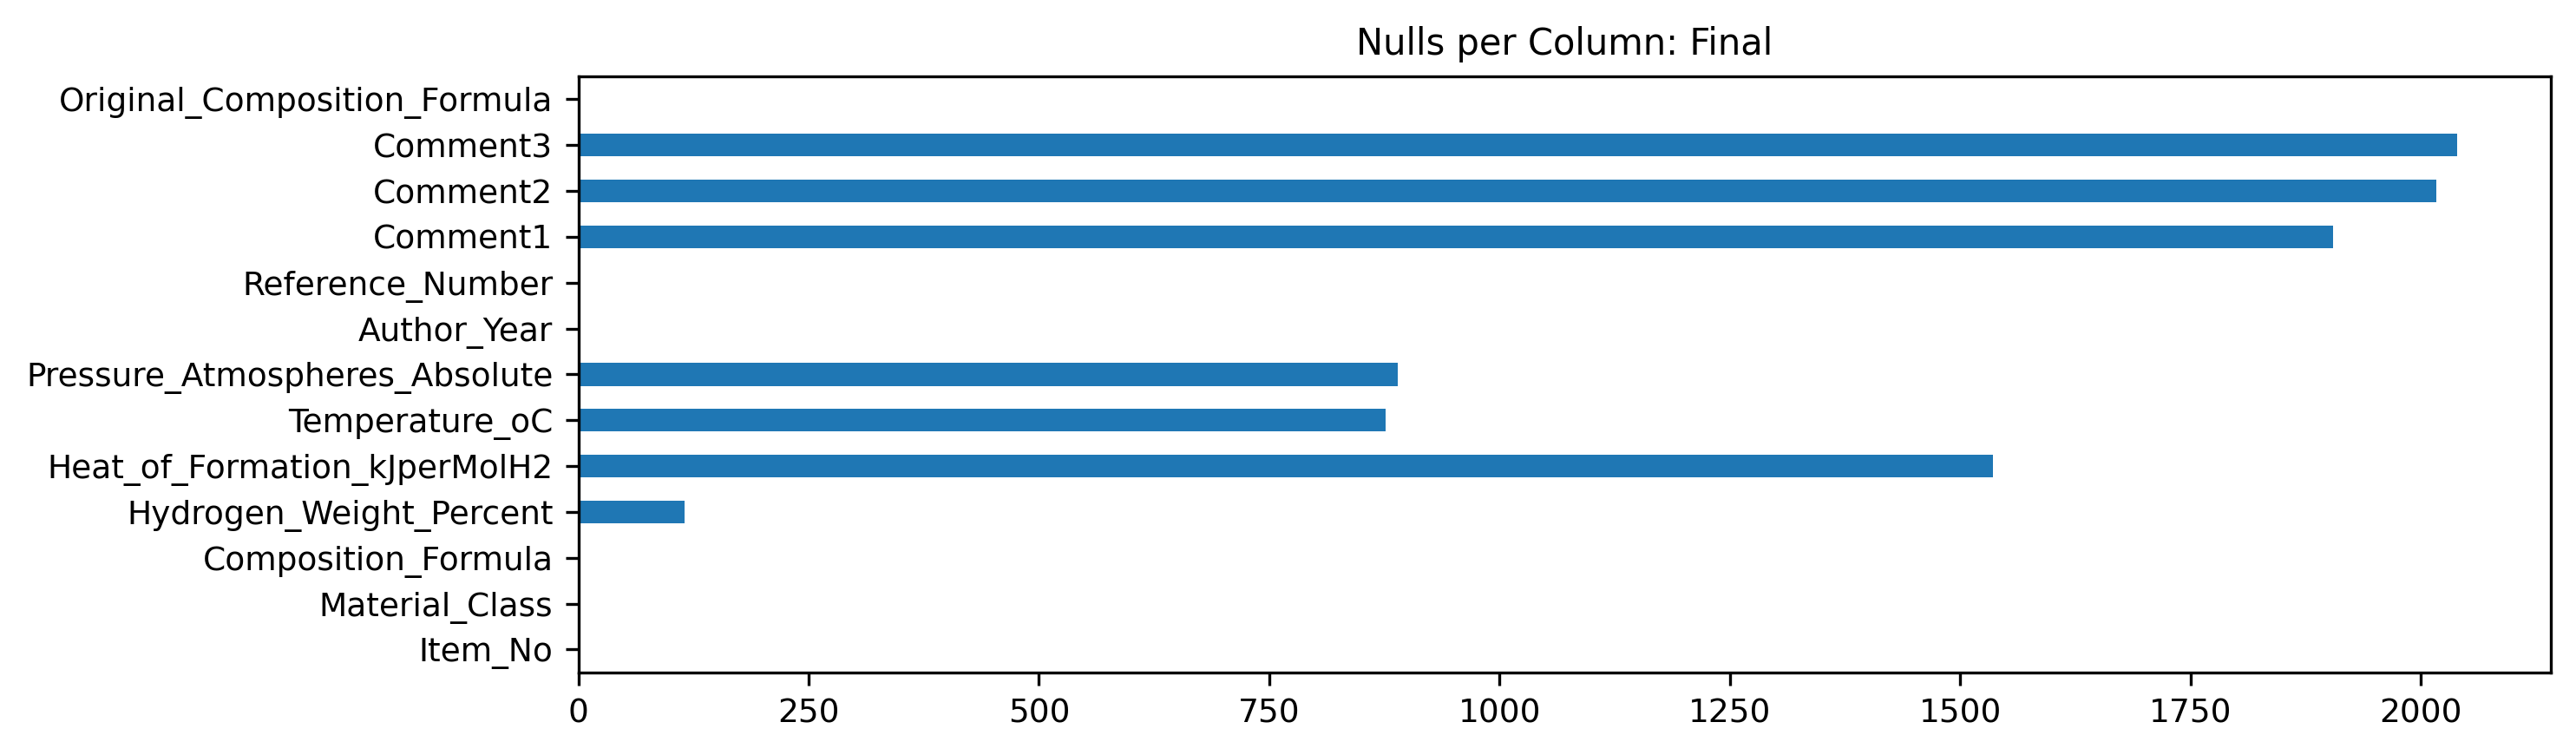

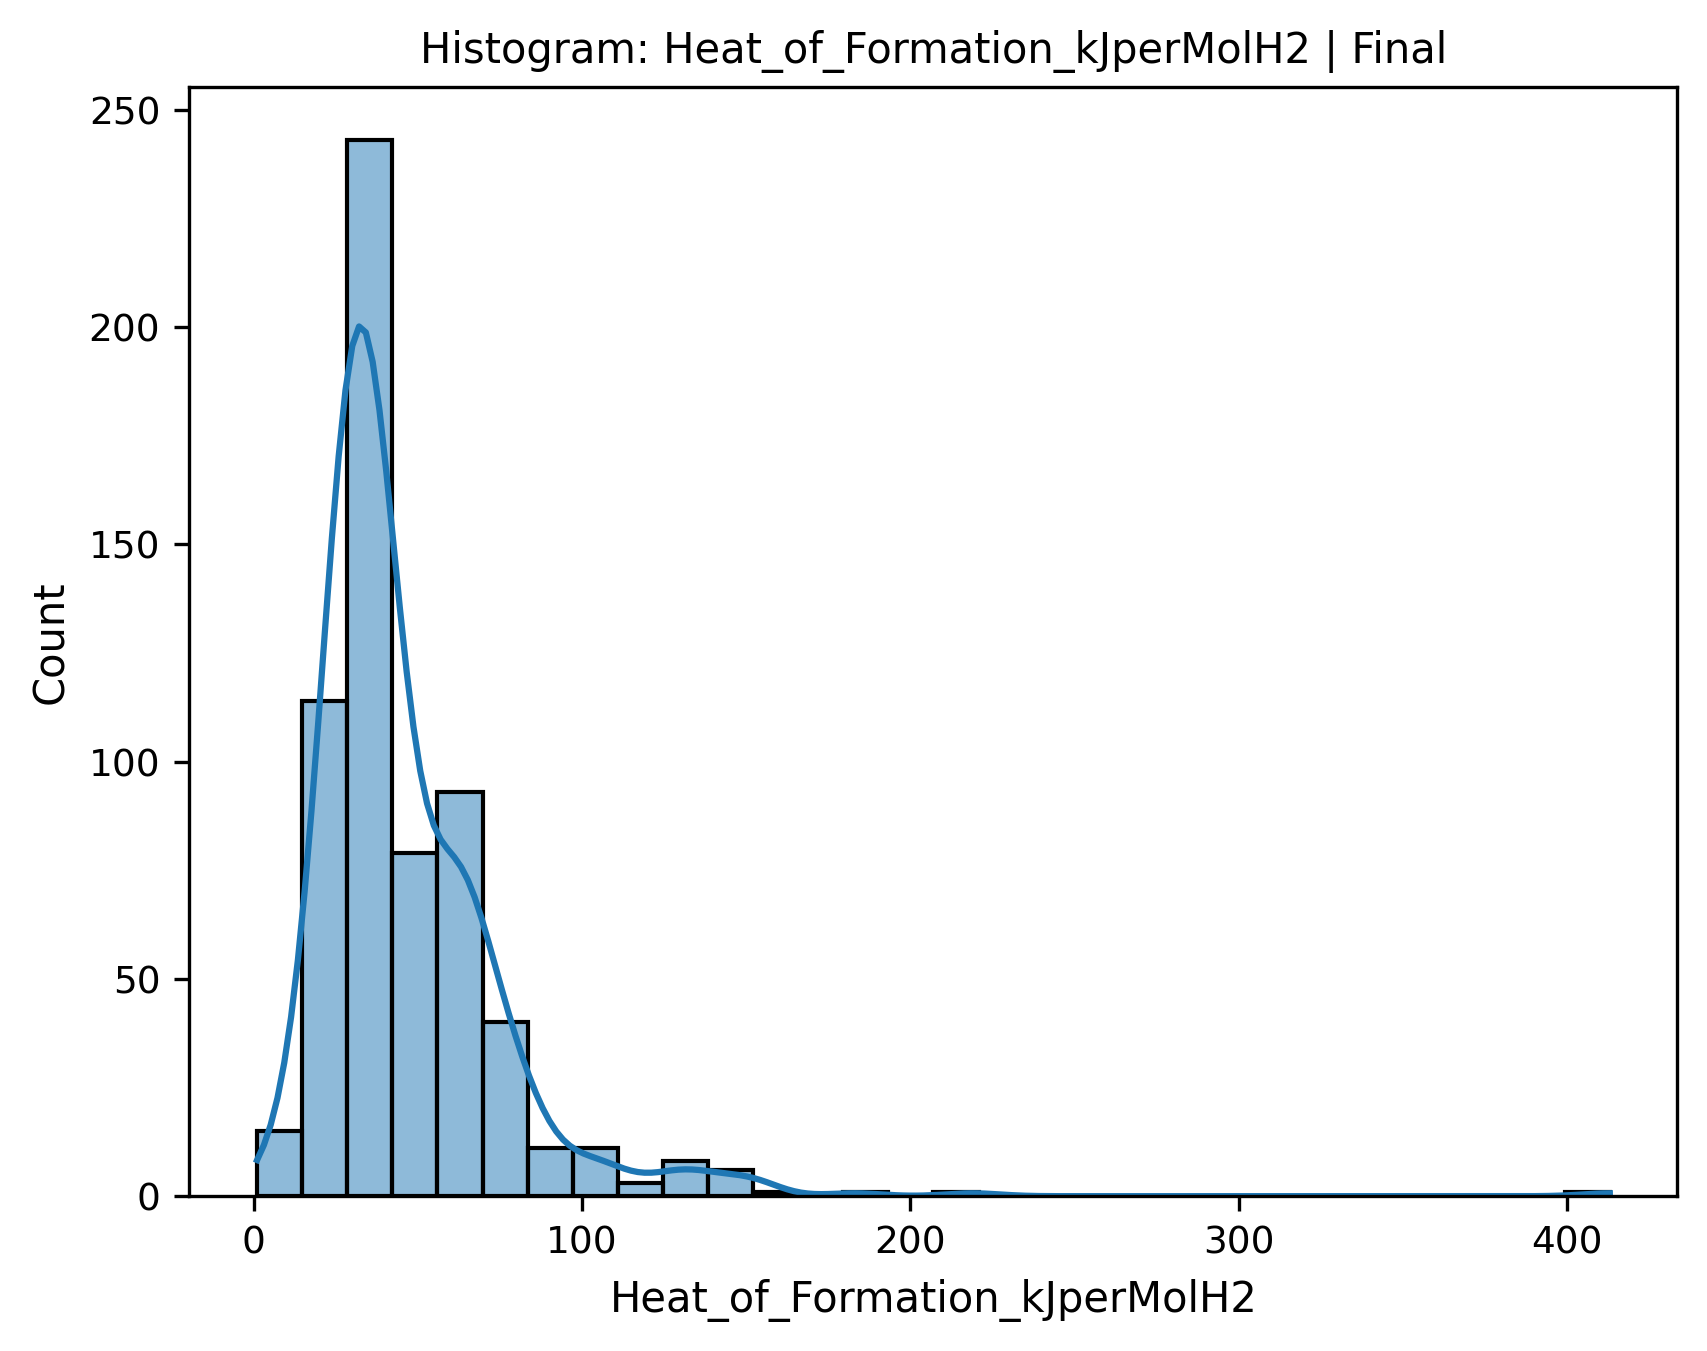

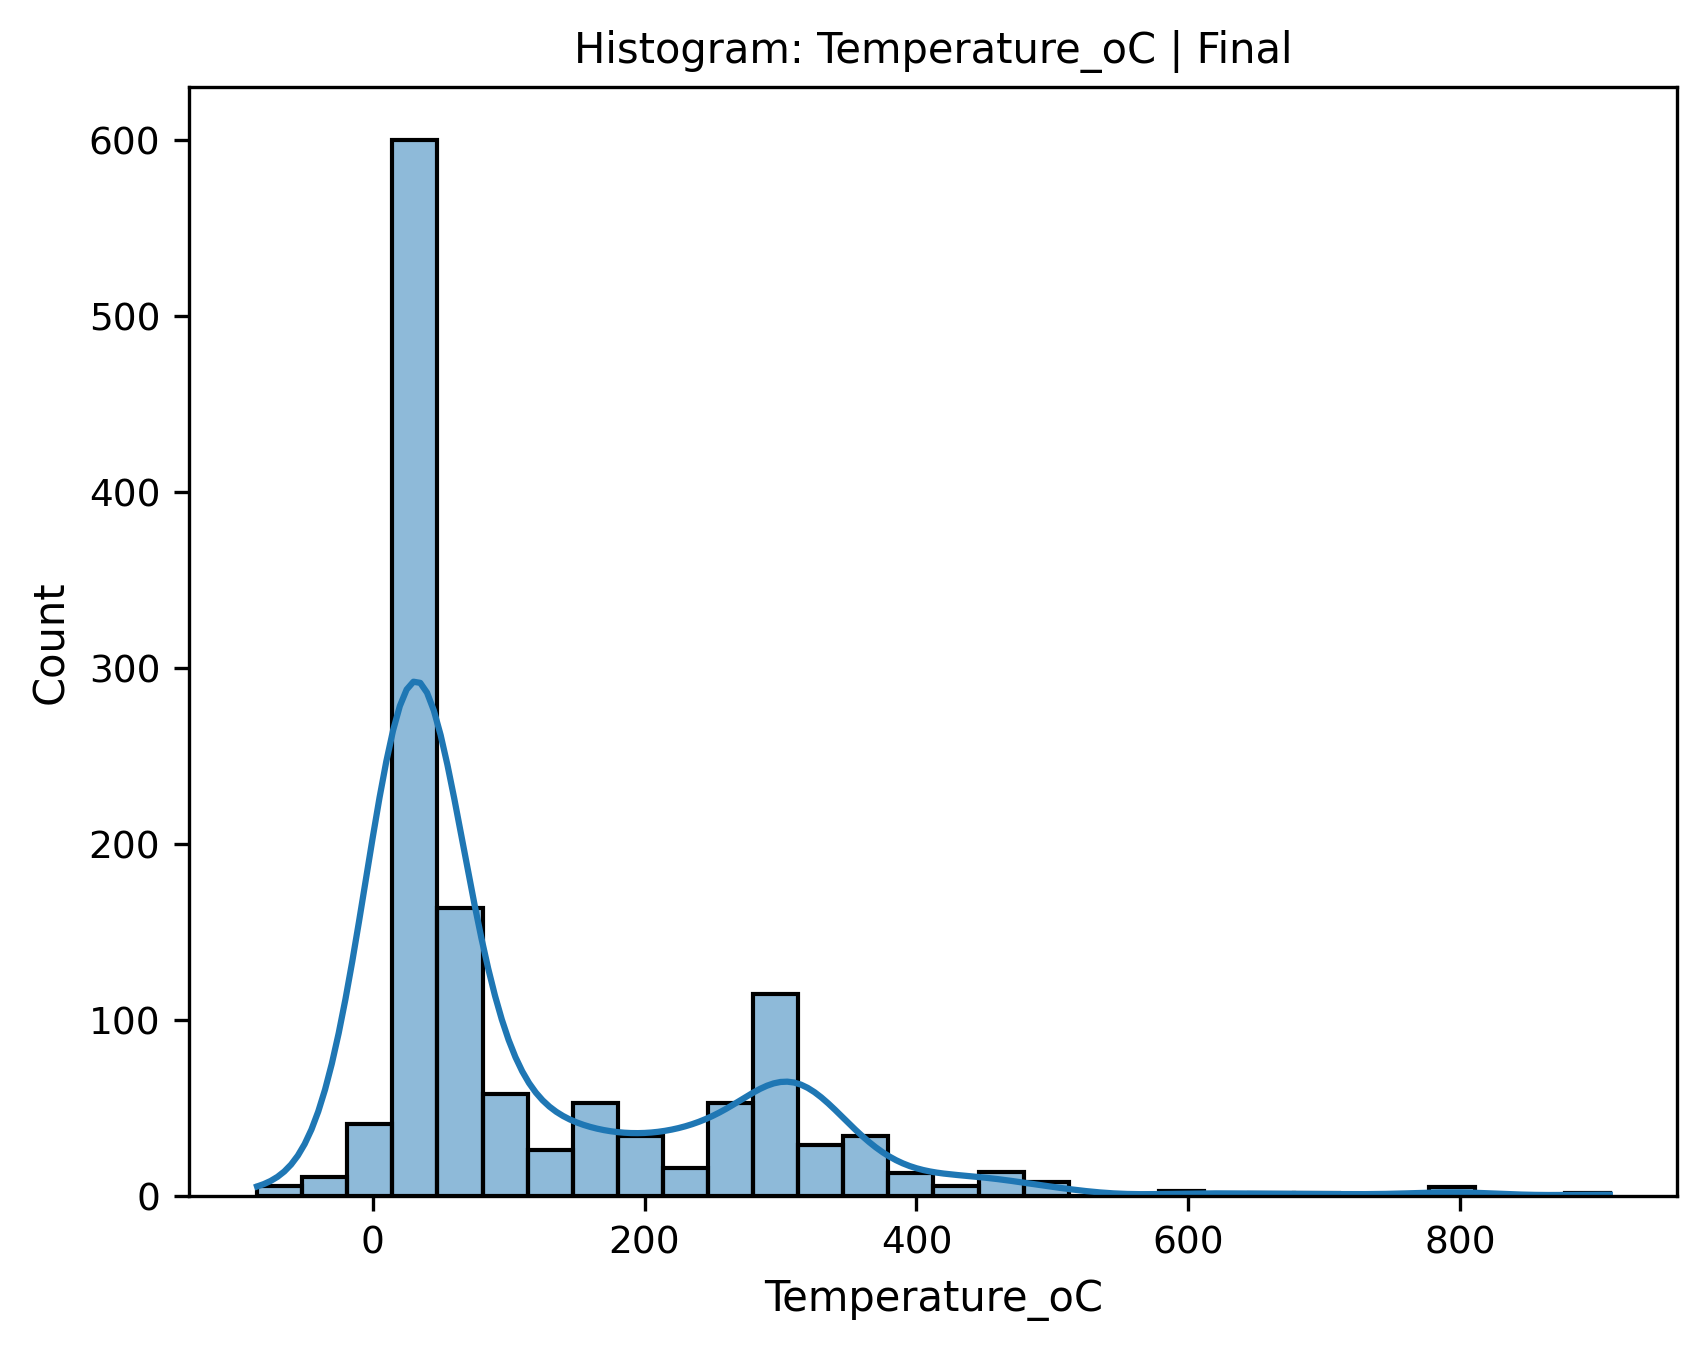

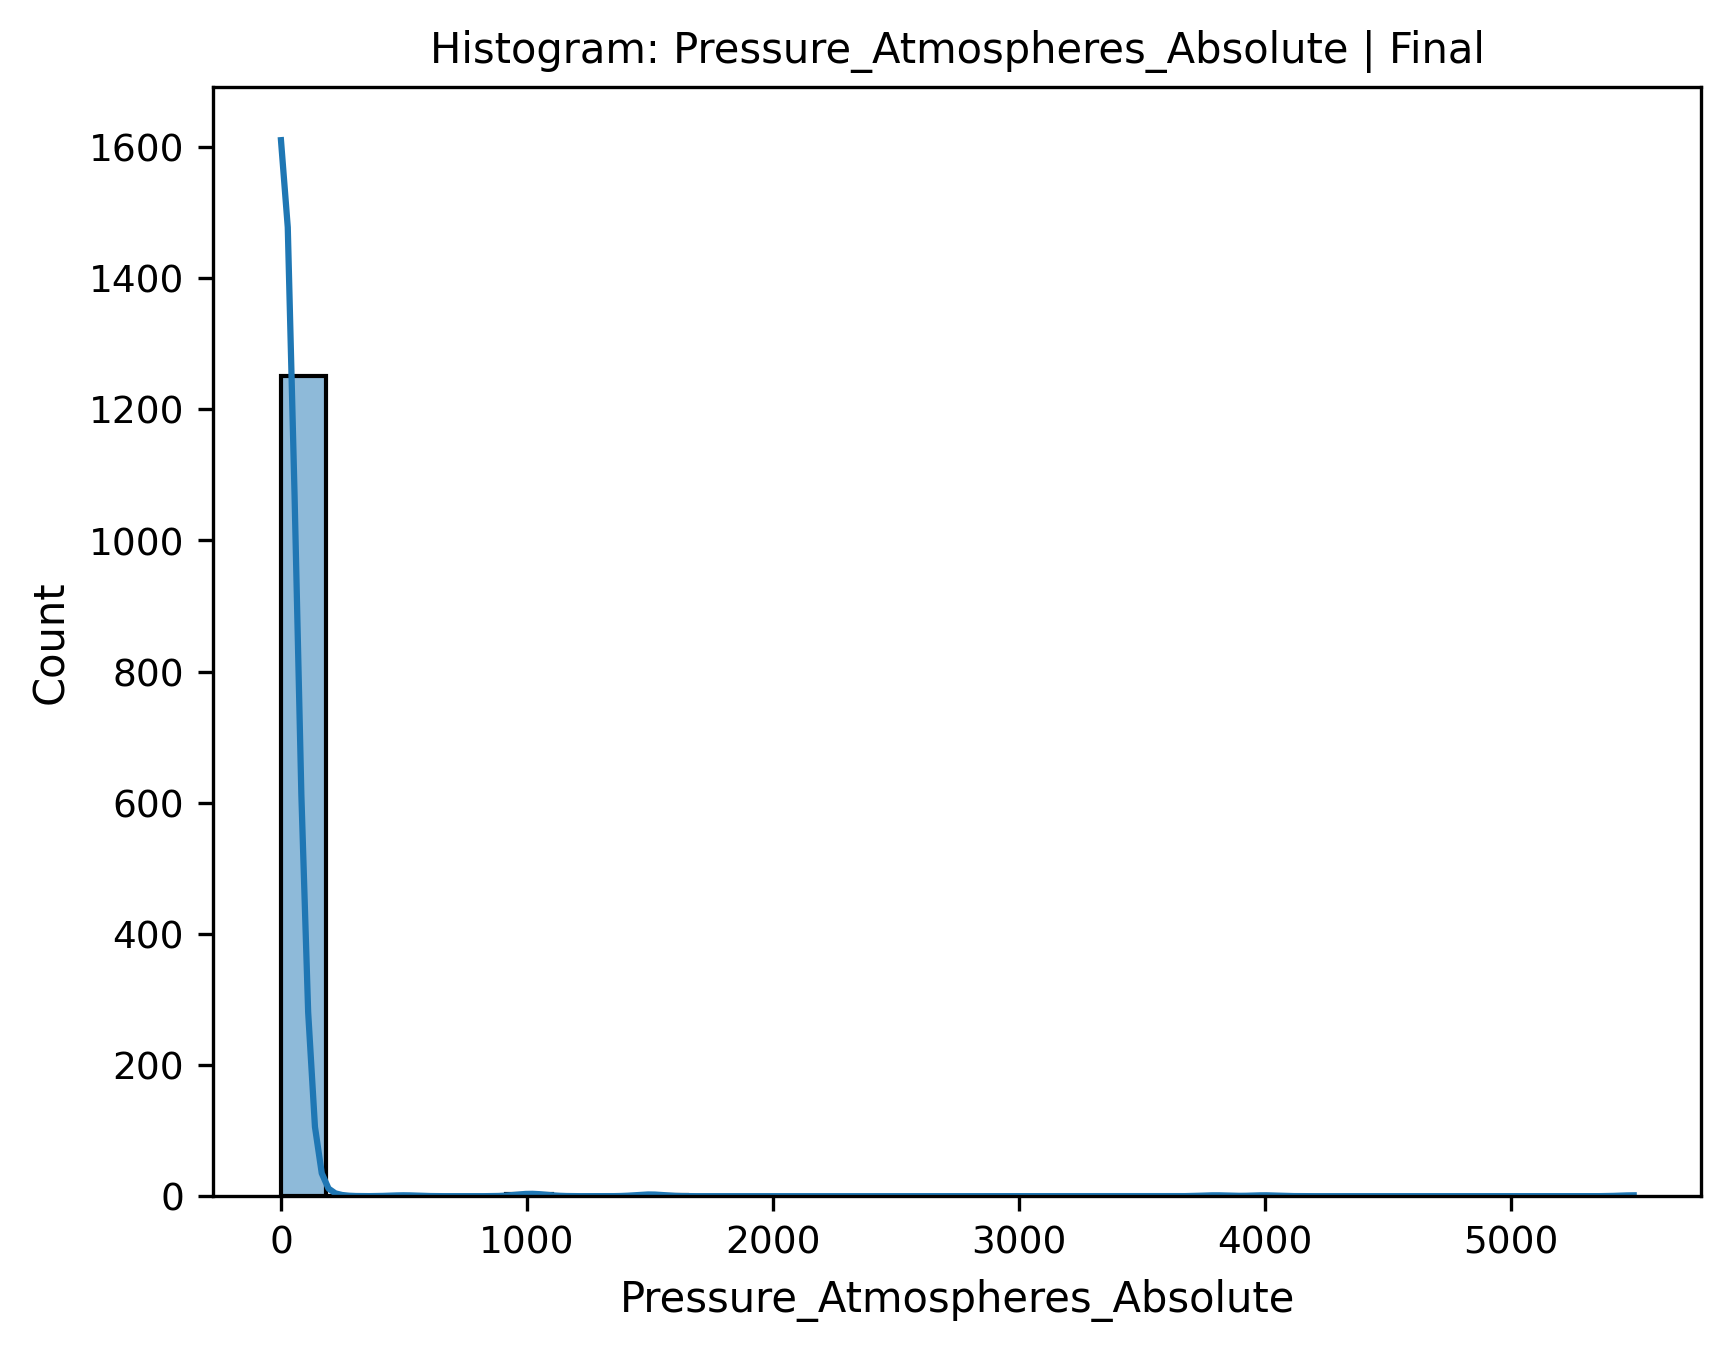

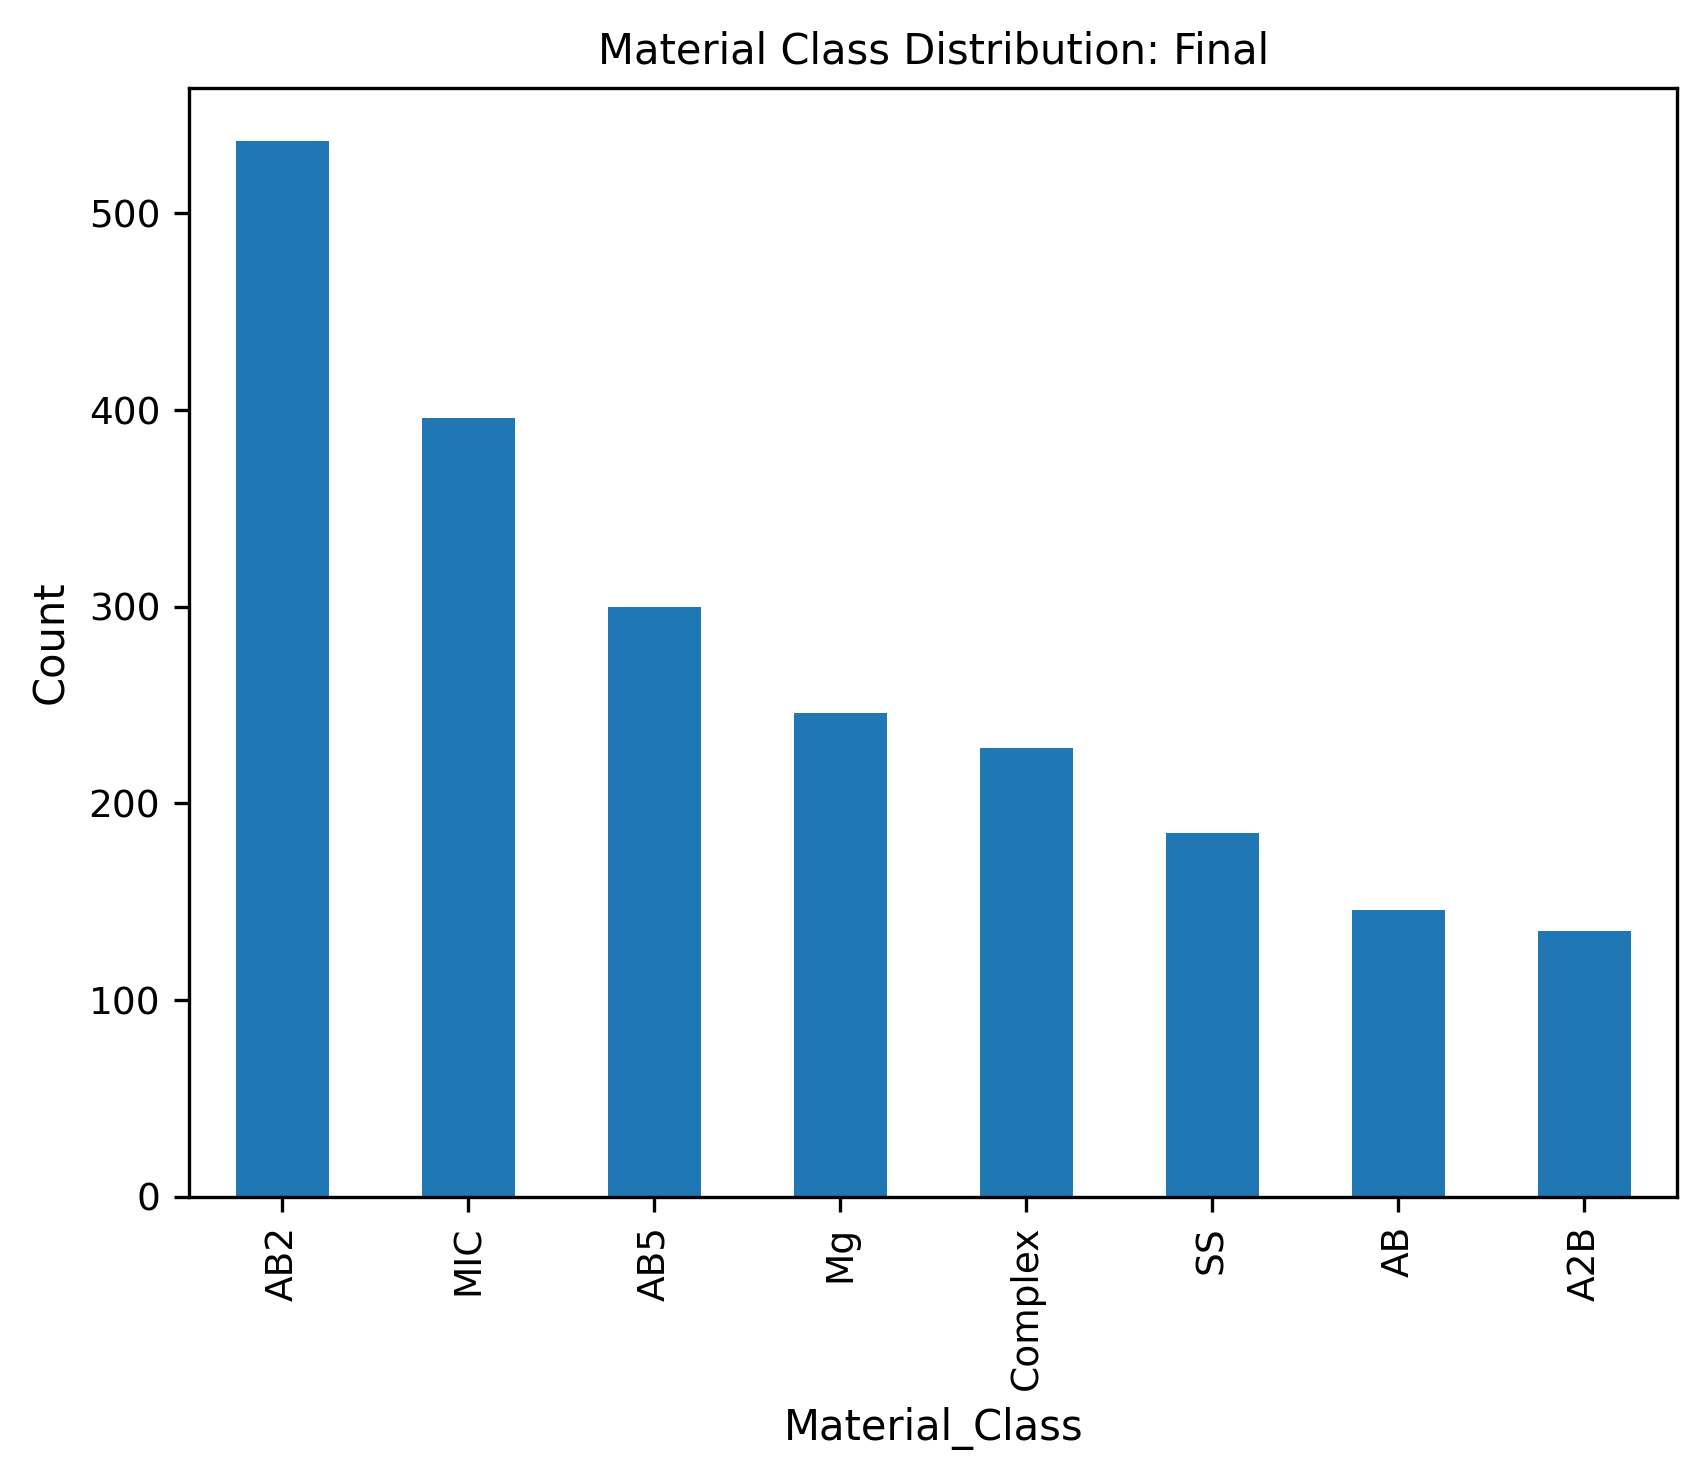

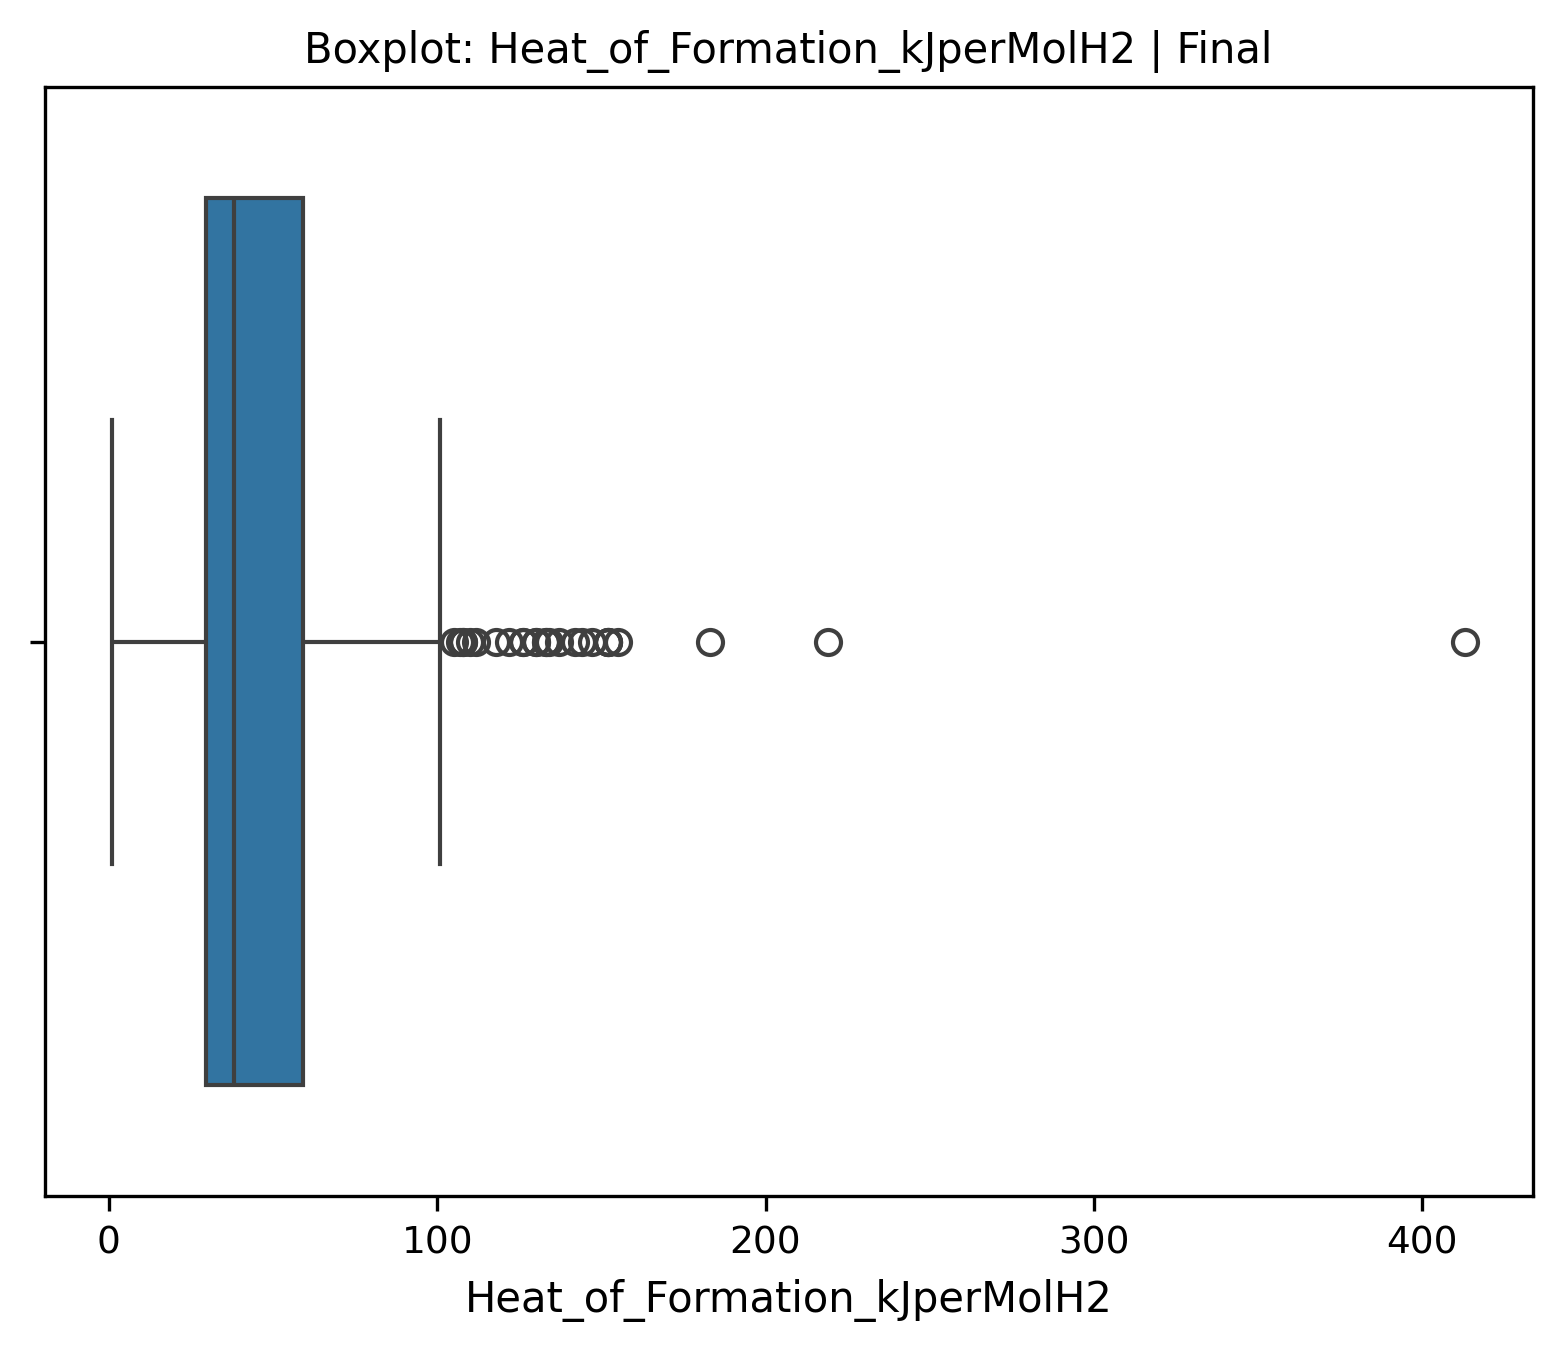

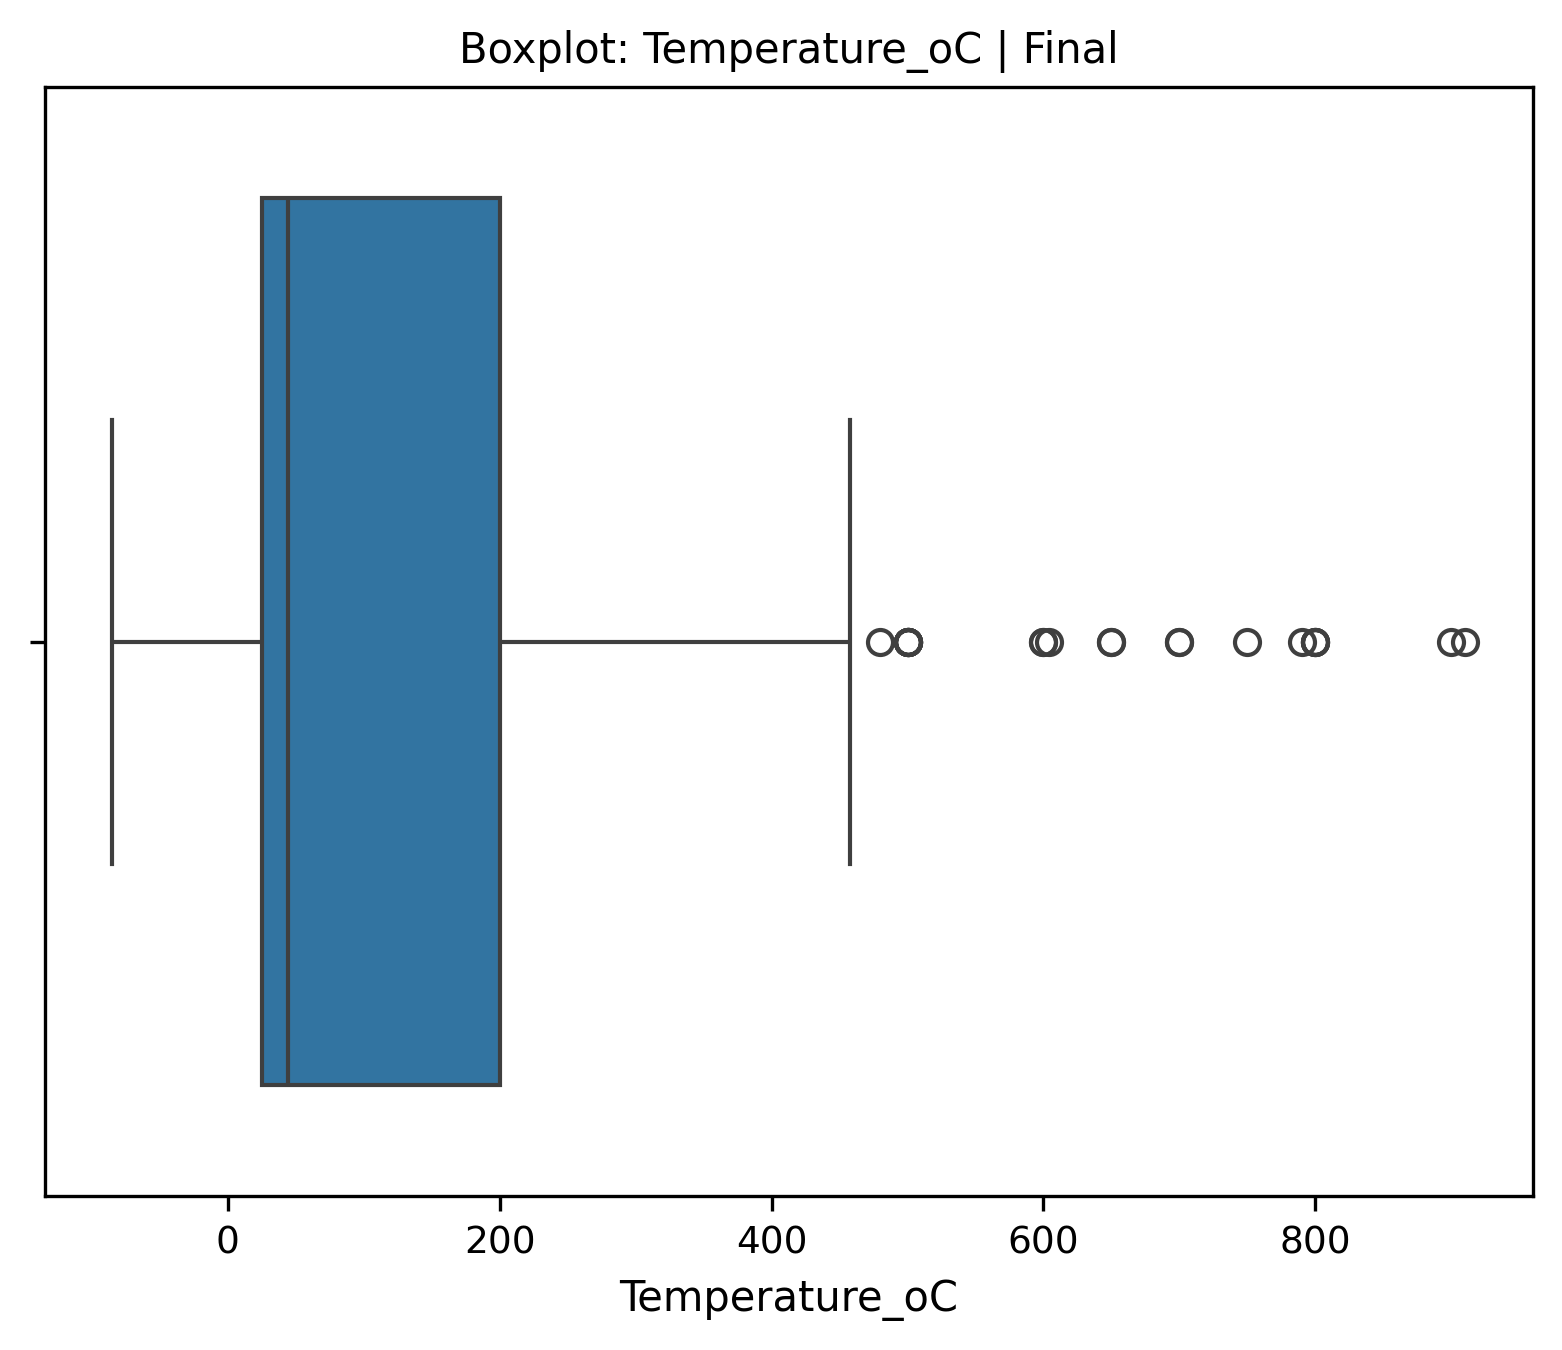

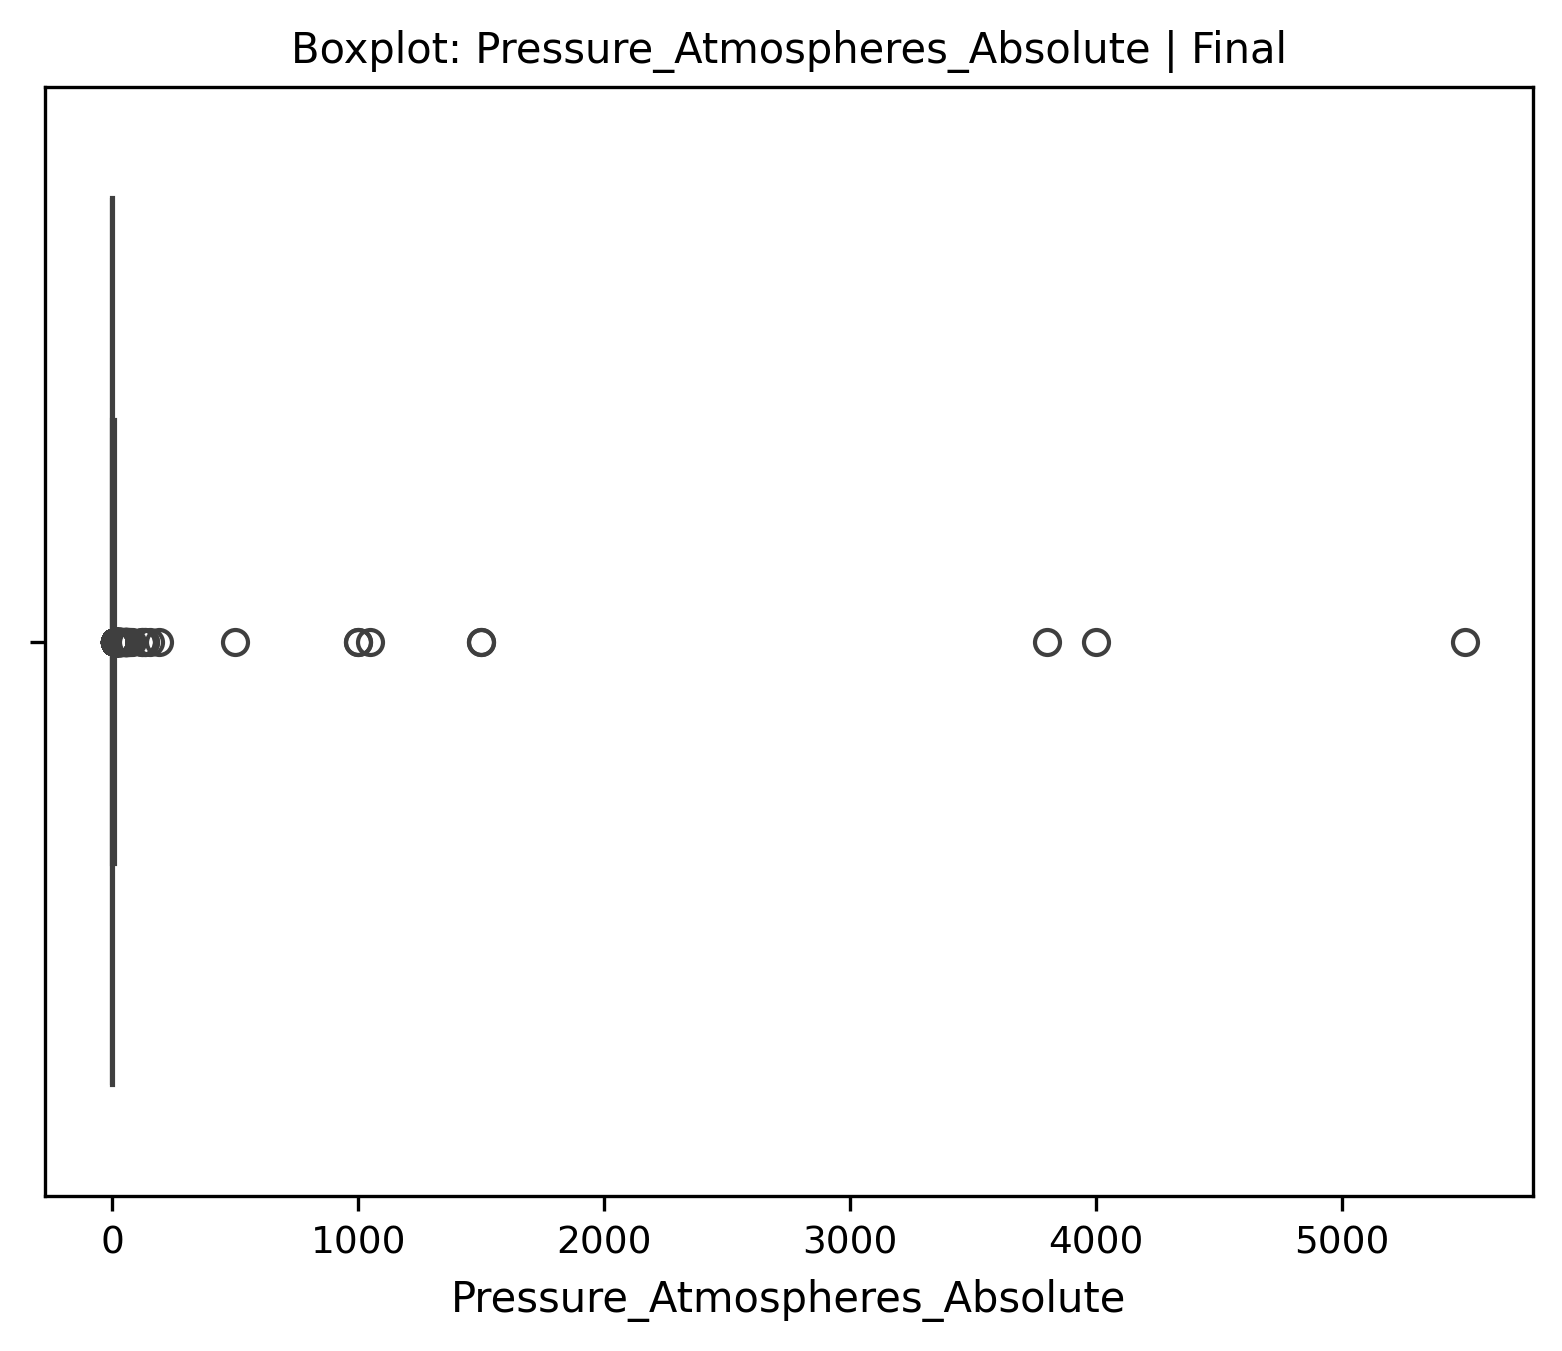

In [9]:
import sys
import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Patch magpie if not installed ----
sys.modules["magpie"] = type(sys)("magpie")
sys.modules["magpie"].MagpieServer = lambda *a, **k: None

from metal_hydride_ML import H2Data

raw_csv = "external/metalhydride/Sandia_Hydride_Database_final.csv"
key_cols = ['Heat_of_Formation_kJperMolH2', 'Temperature_oC', 'Pressure_Atmospheres_Absolute']
remove_classes = []    # Add class names if you want to remove specific classes

# ----------- 1. Load and Inspect Raw Data -----------
df0 = pd.read_csv(raw_csv)
print("Columns:", df0.columns.tolist())
print("Raw data shape:", df0.shape)
print(df0.info())
print(df0.describe(include='all').T)

# --- Plot null counts ---
plt.figure(figsize=(10, 3))
df0.isnull().sum().plot(kind='barh')
plt.title('Nulls per Column (Raw)')
plt.tight_layout()
plt.show()

# --- Histograms for numeric key columns ---
for col in key_cols:
    if col in df0.columns:
        plt.figure()
        sns.histplot(pd.to_numeric(df0[col], errors='coerce'), kde=True, bins=30)
        plt.title(f'Histogram: {col} (Raw)')
        plt.show()

# --- Value counts for classes if present ---
if 'Material_Class' in df0.columns:
    df0['Material_Class'].value_counts().plot(kind='bar')
    plt.title('Material Class Distribution (Raw)')
    plt.ylabel('Count')
    plt.show()

# --- Outliers boxplot ---
for col in key_cols:
    if col in df0.columns:
        plt.figure()
        sns.boxplot(x=pd.to_numeric(df0[col], errors='coerce'))
        plt.title(f'Boxplot: {col} (Raw)')
        plt.show()

# ----------- 2. Stepwise Cleaning Using H2Data (NO NaN removal, NO Magpie) -----------
dfs = [df0.copy()]
steps = ['raw']

# --- Step 1: Use H2Data cleaning, except clean_nans ---
database = H2Data(
    fname=raw_csv,
    remove_nan_attr=[],         # disables NaN removal!
    remove_classes=remove_classes,
    headerlength=0,
)
database._database = df0.copy()    # already loaded, no need to reload

# --- Step 2: Remove unwanted classes ---
database.clean_classes(remove_classes)
dfs.append(database._database.copy())
steps.append('after_class_removal')

# --- Patch: Ensure Composition_Formula is always string (robust fix) ---
if 'Composition_Formula' in database._database.columns:
    database._database['Composition_Formula'] = database._database['Composition_Formula'].astype(str)

# --- Step 3: Remove Mischmetal (Mm) and Lm ---
database.clean_Mm(action='delete')
dfs.append(database._database.copy())
steps.append('after_Mm_removal')

# --- Step 4: Remove weight percent compositions (contains '-') ---
database.clean_wt_percent_compositions(action='delete')
dfs.append(database._database.copy())
steps.append('after_wt_percent_removal')

# --- Step 5: Remove rows with invalid formulas (Ox, Vac, etc) ---
from pymatgen.core.composition import Composition
def is_valid_formula(formula):
    try:
        if pd.isna(formula) or not isinstance(formula, str):
            return False
        formula = formula.strip().split()[0]
        _ = Composition(formula)
        return True
    except Exception:
        return False

mask_valid = database._database['Composition_Formula'].apply(is_valid_formula)
database._database = database._database[mask_valid].copy()

# --- Step 6: (Optional) Advanced formula cleaning ---
database.clean_composition_formula()
dfs.append(database._database.copy())
steps.append('after_formula_cleaning')

# ----------- 3. Save & Summarize Reductions -----------

# --- Save the dataset after all cleaning EXCEPT nan-removal ---
df_before_nan_removal = dfs[-1]
df_before_nan_removal.to_csv("raw_except_nans.csv", index=False)

# --- Stepwise summary and plots ---
n_entries = [(step, len(df)) for step, df in zip(steps, dfs)]
summary = pd.DataFrame(n_entries, columns=["Step", "NumEntries"])
summary["Removed"] = summary["NumEntries"].shift(1) - summary["NumEntries"]
print(summary)

plt.figure(figsize=(7, 3))
plt.bar(summary["Step"], summary["NumEntries"])
plt.xticks(rotation=45)
plt.ylabel("Num Entries")
plt.title("Number of entries after each cleaning step")
plt.tight_layout()
plt.show()

# --- Save the final, fully cleaned data (last step) ---
dfs[-1].to_csv("cleaned_stepwise.csv", index=False)

# ----------- 4. Plotting only for Raw and Final steps -----------
for label, df in zip(['Raw', 'Final'], [dfs[0], dfs[-1]]):
    print(f"\n=== {label.upper()} ===")
    print(df.describe(include='all').T)
    print(df.isnull().sum())
    
    # Null bar plot
    plt.figure(figsize=(10, 3))
    df.isnull().sum().plot(kind='barh')
    plt.title(f'Nulls per Column: {label}')
    plt.tight_layout()
    plt.show()
    
    # Histograms
    for col in key_cols:
        if col in df.columns:
            plt.figure()
            sns.histplot(pd.to_numeric(df[col], errors='coerce'), kde=True, bins=30)
            plt.title(f'Histogram: {col} | {label}')
            plt.show()

    # Value counts for Material_Class
    if 'Material_Class' in df.columns:
        df['Material_Class'].value_counts().plot(kind='bar')
        plt.title(f'Material Class Distribution: {label}')
        plt.ylabel('Count')
        plt.show()

    # Outlier boxplot
    for col in key_cols:
        if col in df.columns:
            plt.figure()
            sns.boxplot(x=pd.to_numeric(df[col], errors='coerce'))
            plt.title(f'Boxplot: {col} | {label}')
            plt.show()


GUIDE

In [11]:
import pandas as pd
import numpy as np
import json
from GenImpute import impute_all_attributes

# --- Load data ---
print("Loading data from raw_except_nans.csv ...")
df = pd.read_csv("raw_except_nans.csv")
print(f"Loaded dataframe with shape: {df.shape}")

attributes_to_impute = [
    'Heat_of_Formation_kJperMolH2', 
    'Temperature_oC', 
    'Pressure_Atmospheres_Absolute', 
    'Hydrogen_Weight_Percent'
]  # Your missing-value columns

'''attributes_to_impute = [
    'Heat_of_Formation_kJperMolH2', 
    'Temperature_oC', 
    'Pressure_Atmospheres_Absolute', 
    'Hydrogen_Weight_Percent'
] '''

context_columns = [col for col in df.columns if col not in attributes_to_impute]

print("Attributes to impute:", attributes_to_impute)
print("Context columns:", context_columns)

print("Starting GUIDE-based imputation using impute_all_attributes...\n")

imputed_df, analysis = impute_all_attributes(
    data=df,
    attributes_to_impute=attributes_to_impute,
    context_columns=context_columns,
    perform_analysis=False,
    gist_formalism=False,
    prompt_type="guide",
    study_type="Hydrogen Capacity of High Entropy Alloys"
)

print("\nImputation completed.")

'''
print("\nImputation completed. Now computing MAE/logs...")

log = {}
for attribute in attributes_to_impute:
    print(f"\nAnalyzing predictions for: {attribute}")
    preds = analysis[attribute]
    # Force ground truth to numeric and drop NaN (if any)
    gt = pd.to_numeric(df.loc[df[attribute].notnull(), attribute], errors='coerce').tolist()
    gt = [x for x in gt if x is not None and not pd.isnull(x)]
    pred = []
    for i, row_preds in enumerate(preds):
        val = next(
            (float(x) for x in reversed(row_preds) 
             if isinstance(x, (int, float)) or
                (isinstance(x, str) and (
                    x.replace('.', '', 1).replace('-', '', 1).isdigit()
                ))
            ),
            None
        )
        pred.append(val)
        print(f"  Row {i+1}: Prediction(s): {row_preds} -> Final: {val} | GT: {gt[i] if i < len(gt) else 'N/A'}")
    # Clean up predictions (remove None)
    pred = [x for x in pred if x is not None and not pd.isnull(x)]
    mae = float(np.mean(np.abs(np.array(pred) - np.array(gt)))) if pred and gt else None
    log[attribute] = {"predictions": pred, "ground_truth": gt, "mae": mae}
    print(f"  Mean Absolute Error (MAE) for {attribute}: {mae}")

# --- Save imputed data and log ---
print("\nSaving results...")
with open("imputation_analysis_guide.json", "w") as f:
    json.dump(log, f, indent=2)
print("\nGuide imputation done. Imputed data saved as Hydpark_Guide.csv. Log saved as imputation_analysis_guide.json.")
'''

# --- Save imputed data only ---
print("\nSaving imputed results...")
imputed_df.to_csv("Hydpark_Guide.csv", index=False)
print("Guide imputation done. Imputed data saved as Hydpark_Guide.csv.")


Loading data from raw_except_nans.csv ...
Loaded dataframe with shape: (2173, 13)
Attributes to impute: ['Heat_of_Formation_kJperMolH2', 'Temperature_oC', 'Pressure_Atmospheres_Absolute', 'Hydrogen_Weight_Percent']
Context columns: ['Item_No', 'Material_Class', 'Composition_Formula', 'Author_Year', 'Reference_Number', 'Comment1', 'Comment2', 'Comment3', 'Original_Composition_Formula']
Starting GUIDE-based imputation using impute_all_attributes...


========== Starting imputation for Heat_of_Formation_kJperMolH2 ==========
  Retry 1/3 - 1535 missing values left to impute for Heat_of_Formation_kJperMolH2.
    Imputing row 0 for Heat_of_Formation_kJperMolH2...
      → Imputed value: -12.5
    Imputing row 3 for Heat_of_Formation_kJperMolH2...
      → Imputed value: -71.2
    Imputing row 4 for Heat_of_Formation_kJperMolH2...
      → Imputed value: -65
    Imputing row 5 for Heat_of_Formation_kJperMolH2...
      → Imputed value: -30.5
    Imputing row 6 for Heat_of_Formation_kJperMolH2...


In [12]:
import pandas as pd
import numpy as np

# Load the imputed data
df = pd.read_csv("Hydpark_Guide.csv")

# List your numeric columns to clean
numeric_cols = [
    'Heat_of_Formation_kJperMolH2', 
    'Temperature_oC', 
    'Pressure_Atmospheres_Absolute', 
    'Hydrogen_Weight_Percent'
]

# List of non-numeric placeholders to clean (case-insensitive)
bad_values = ['unknown', 'Unknown', 'none', 'None', '', 'nan', 'NaN']

for col in numeric_cols:
    df[col] = df[col].replace(bad_values, np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any row where any numeric column is NaN (i.e., after cleaning, value is missing)
clean_df = df.dropna(subset=numeric_cols, how='any').reset_index(drop=True)

# Save the cleaned, ML-ready dataset
clean_df.to_csv("Hydpark_Guide_cleaned.csv", index=False)
print("Cleaned and dropped bad values. Saved as Hydpark_Guide_cleaned.csv")
print(f"Final shape: {clean_df.shape}")


Cleaned and dropped bad values. Saved as Hydpark_Guide_cleaned.csv
Final shape: (1518, 13)


In [13]:
clean_df.head()  # Display the first few rows of the cleaned DataFrame

,Item_No,Material_Class,Composition_Formula,Hydrogen_Weight_Percent,Heat_of_Formation_kJperMolH2,Temperature_oC,Pressure_Atmospheres_Absolute,Author_Year,Reference_Number,Comment1,Comment2,Comment3,Original_Composition_Formula
0,3,A2B,Pr2Al,1.4,-12.5,420.0,1.0000,"Semenenko, 1985",1151.0,NaN,(Amorp),NaN,Pr2Al
1,4,A2B,Ce0.5Th1.5Al1,0.4,133.0,650.0,0.0003,"Van Vucht, 1963",492.0,NaN,NaN,NaN,Th1.5Ce.5Al
2,5,A2B,Th2Al,0.8,130.0,500.0,0.0010,"Van Vucht, 1963",492.0,NaN,NaN,NaN,Th2Al
3,9,A2B,Ti2Co,0.2,-45.7,450.0,1.2000,"Beck, 1962",45.0,NaN,NaN,NaN,Ti2Co
4,14,A2B,Ti2Cu,1.0,-10.5,500.0,0.0200,"Arita, 1979",495.0,NaN,NaN,NaN,Ti2Cu



=== Summary statistics ===
                                count        mean           std    min   25%  \
Heat_of_Formation_kJperMolH2   1518.0   -8.625692     54.180946 -325.0 -45.2   
Temperature_oC                 1518.0  161.961792    175.048828 -140.0  25.0   
Pressure_Atmospheres_Absolute  1518.0  925.049318  30876.671750    0.0   0.5   
Hydrogen_Weight_Percent        1518.0    2.272227      3.989300    0.0   1.1   

                                50%      75%        max  
Heat_of_Formation_kJperMolH2  -15.2   32.000      413.0  
Temperature_oC                 60.0  300.000     1500.0  
Pressure_Atmospheres_Absolute   1.2    4.500  1200000.0  
Hydrogen_Weight_Percent         1.5    2.575       92.1  


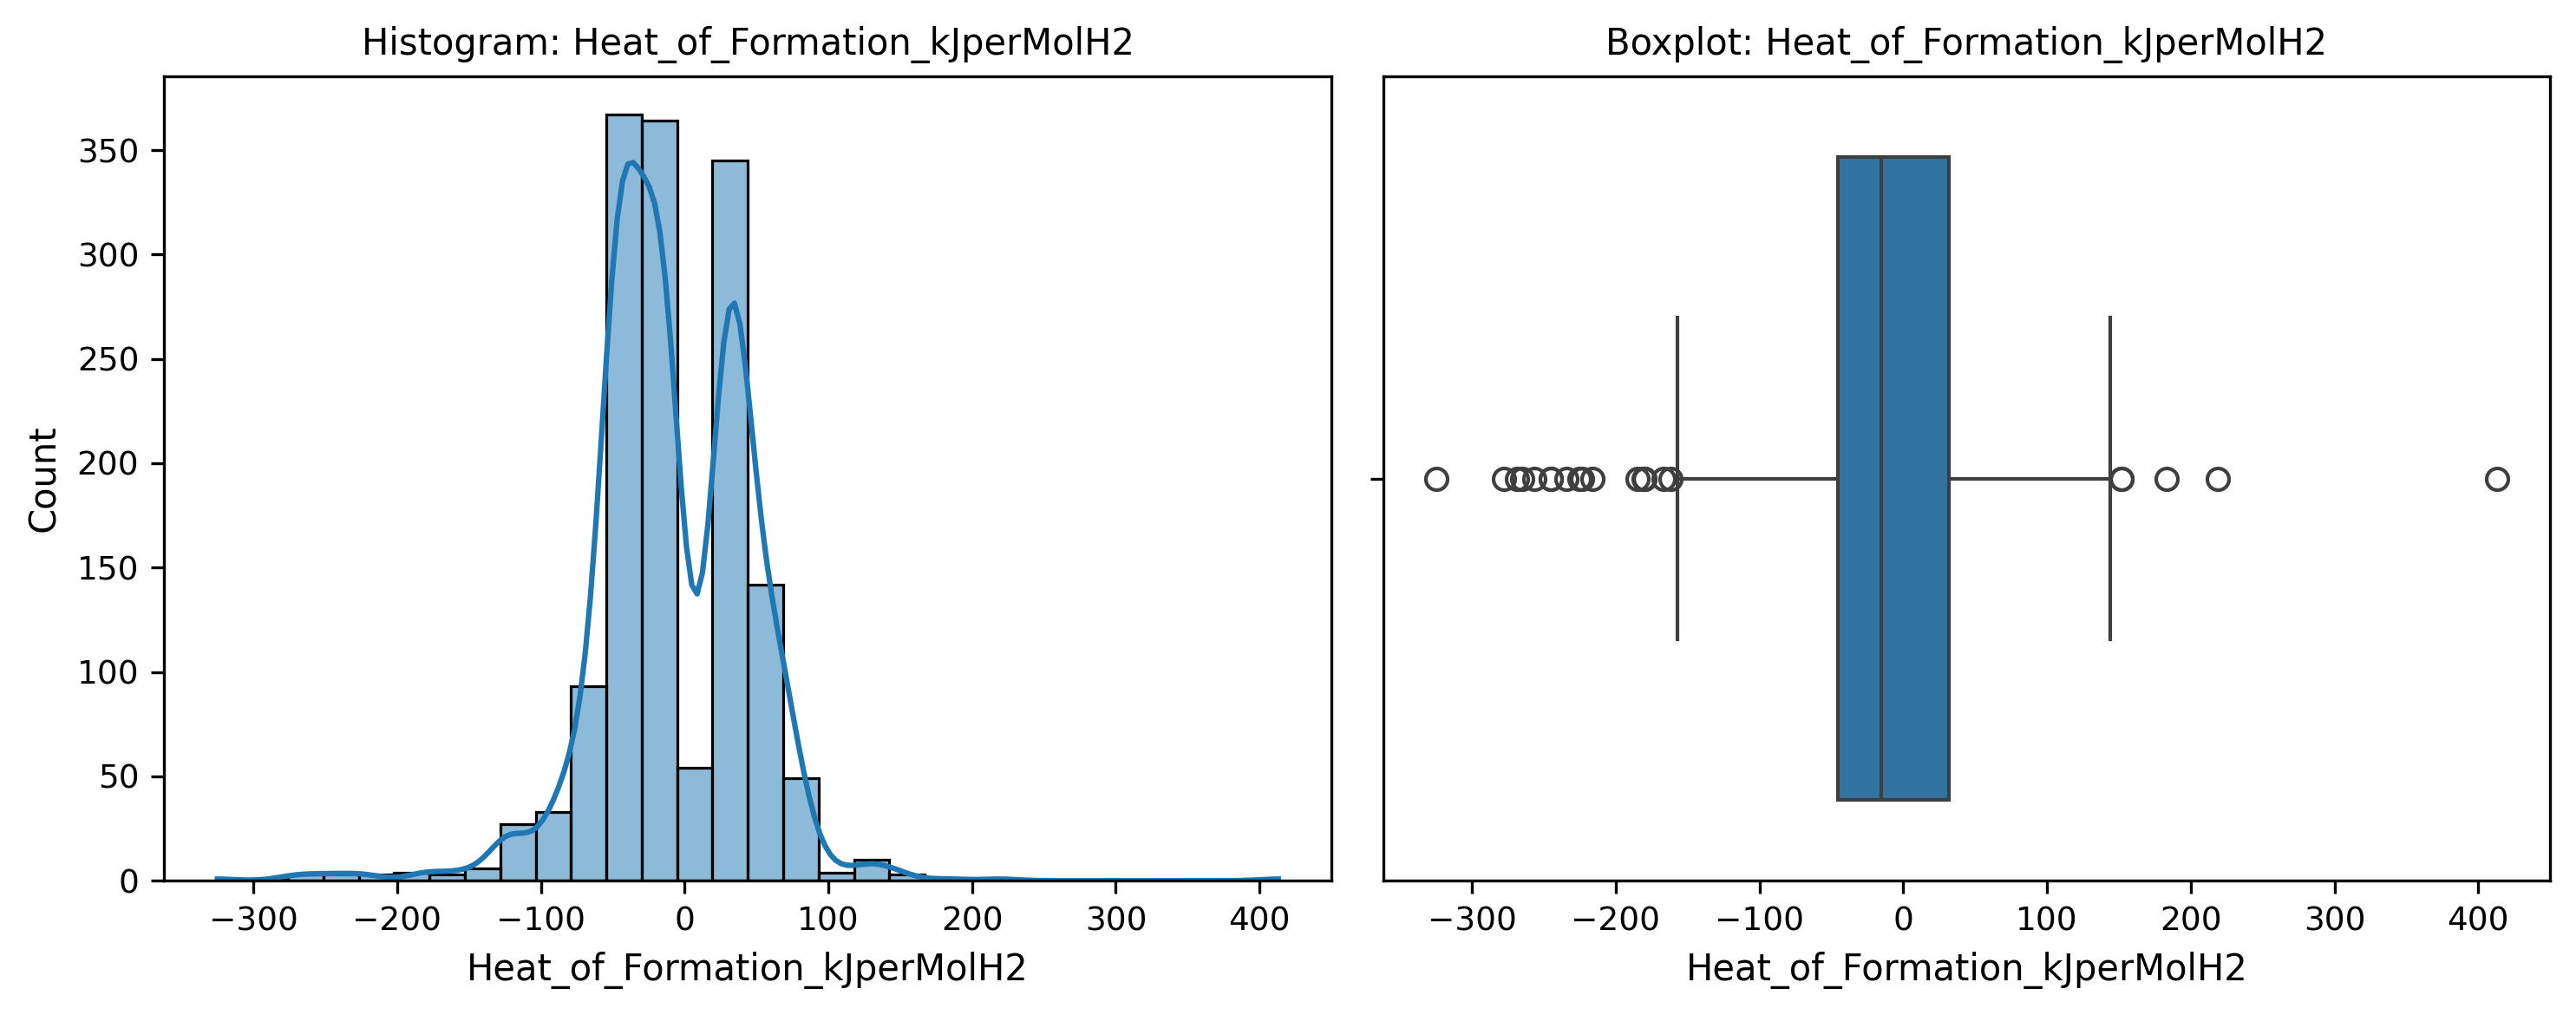

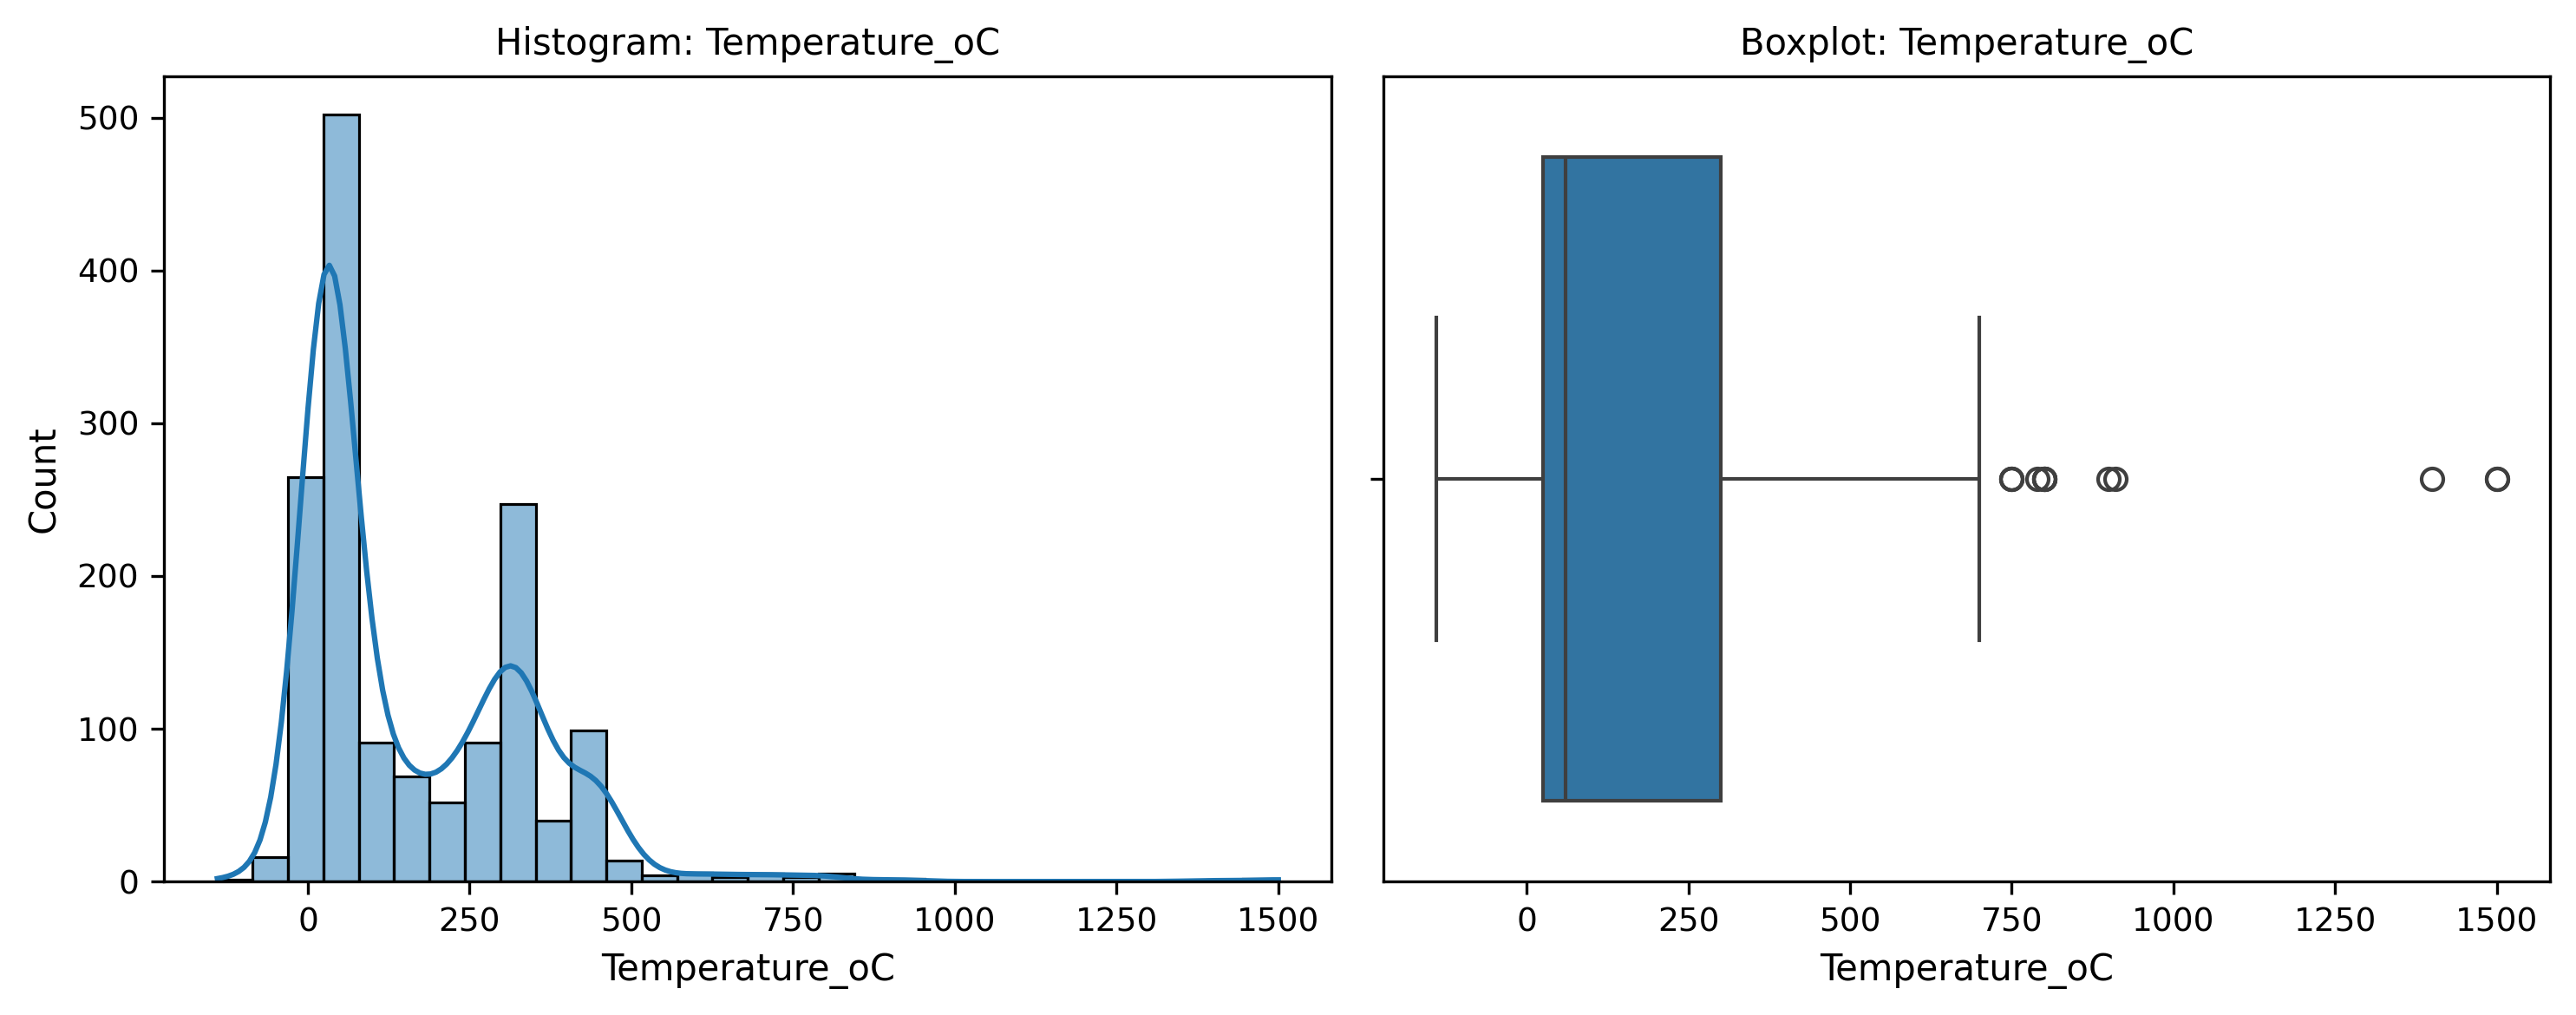

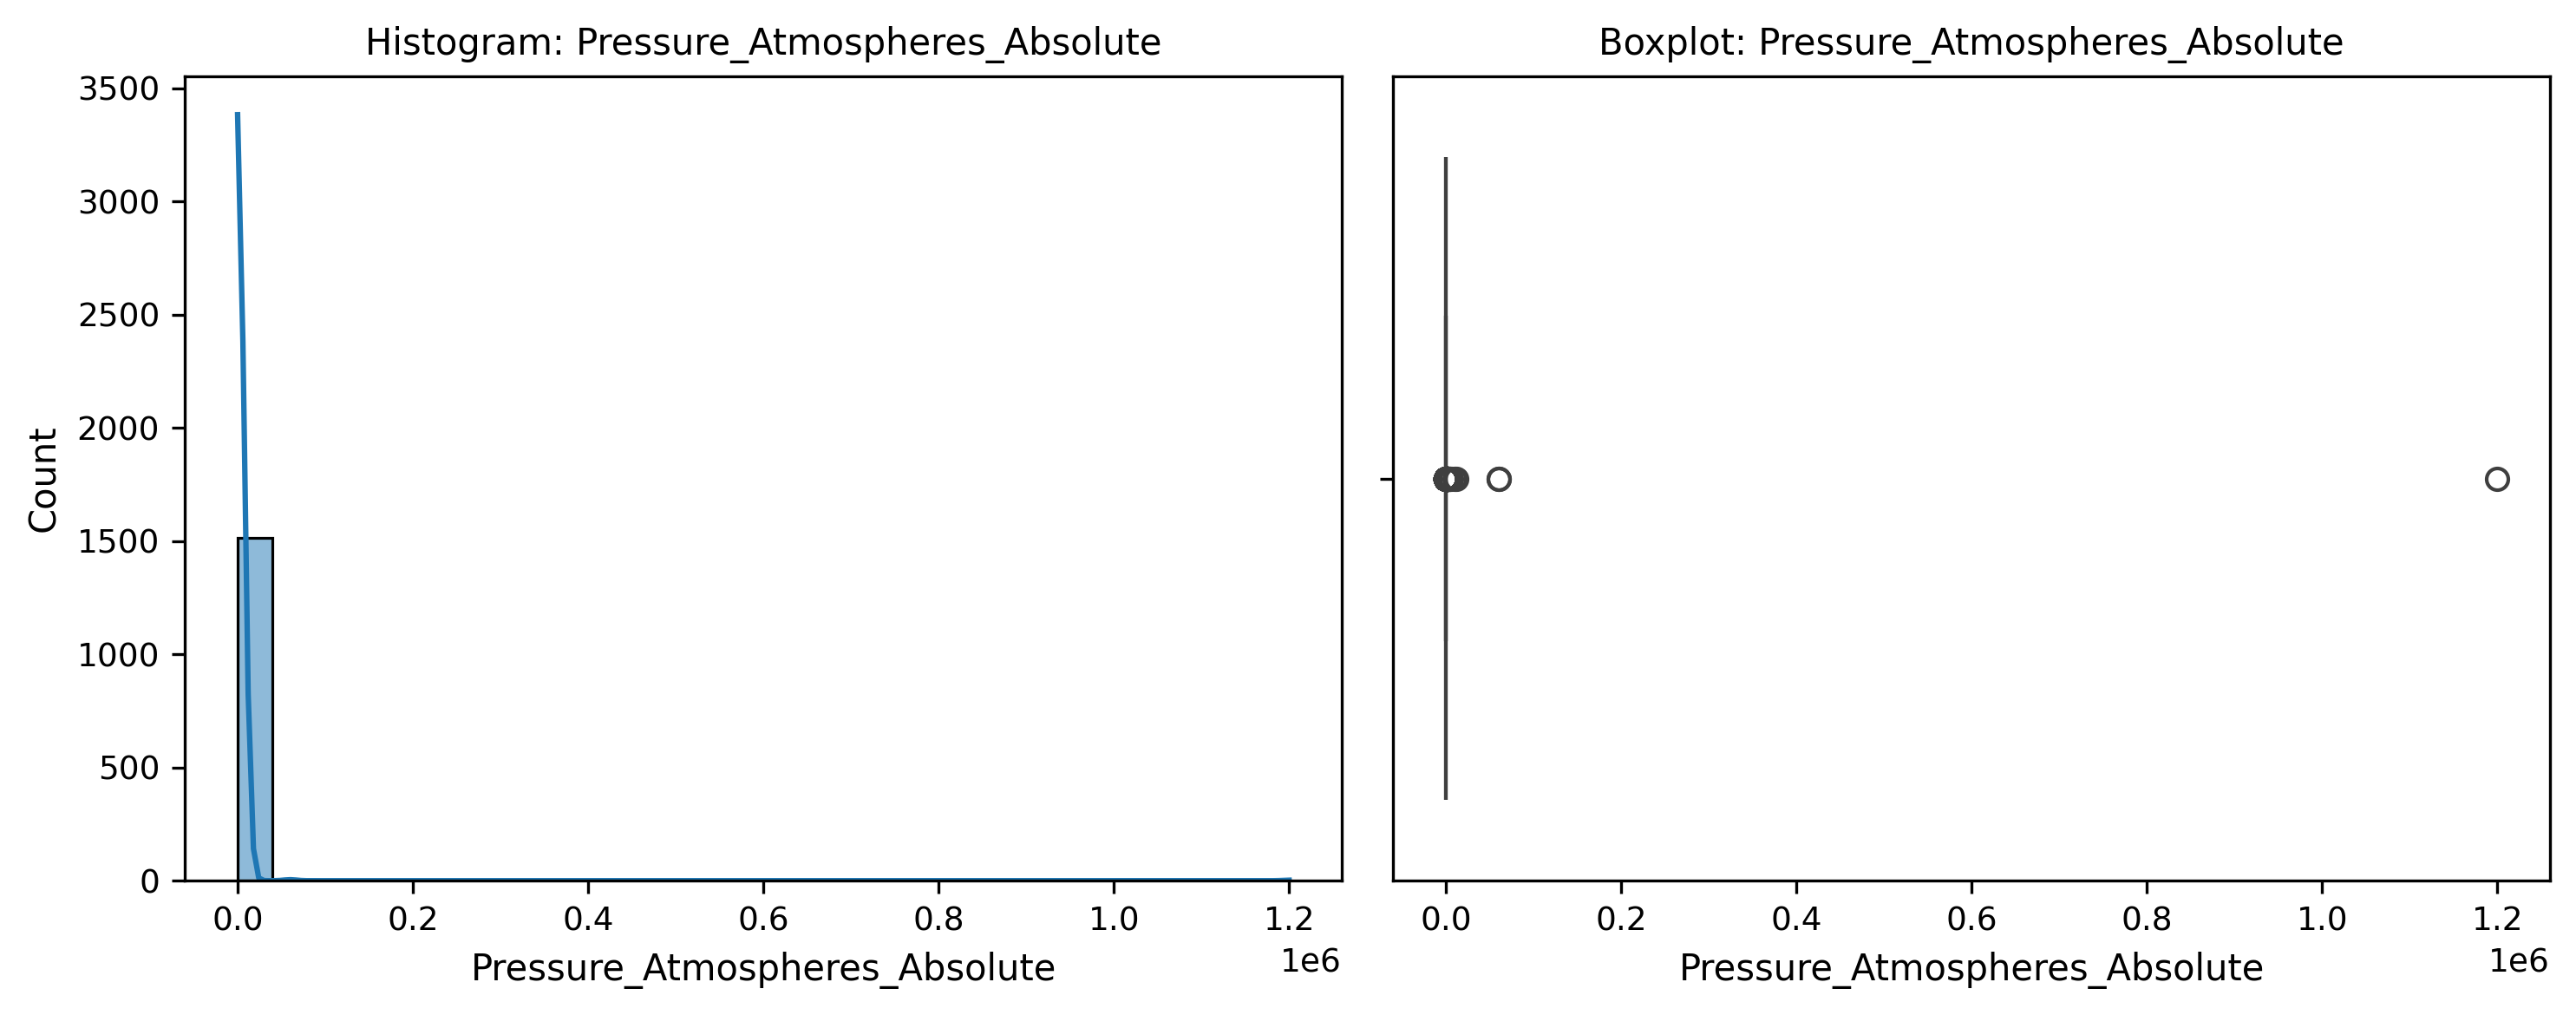

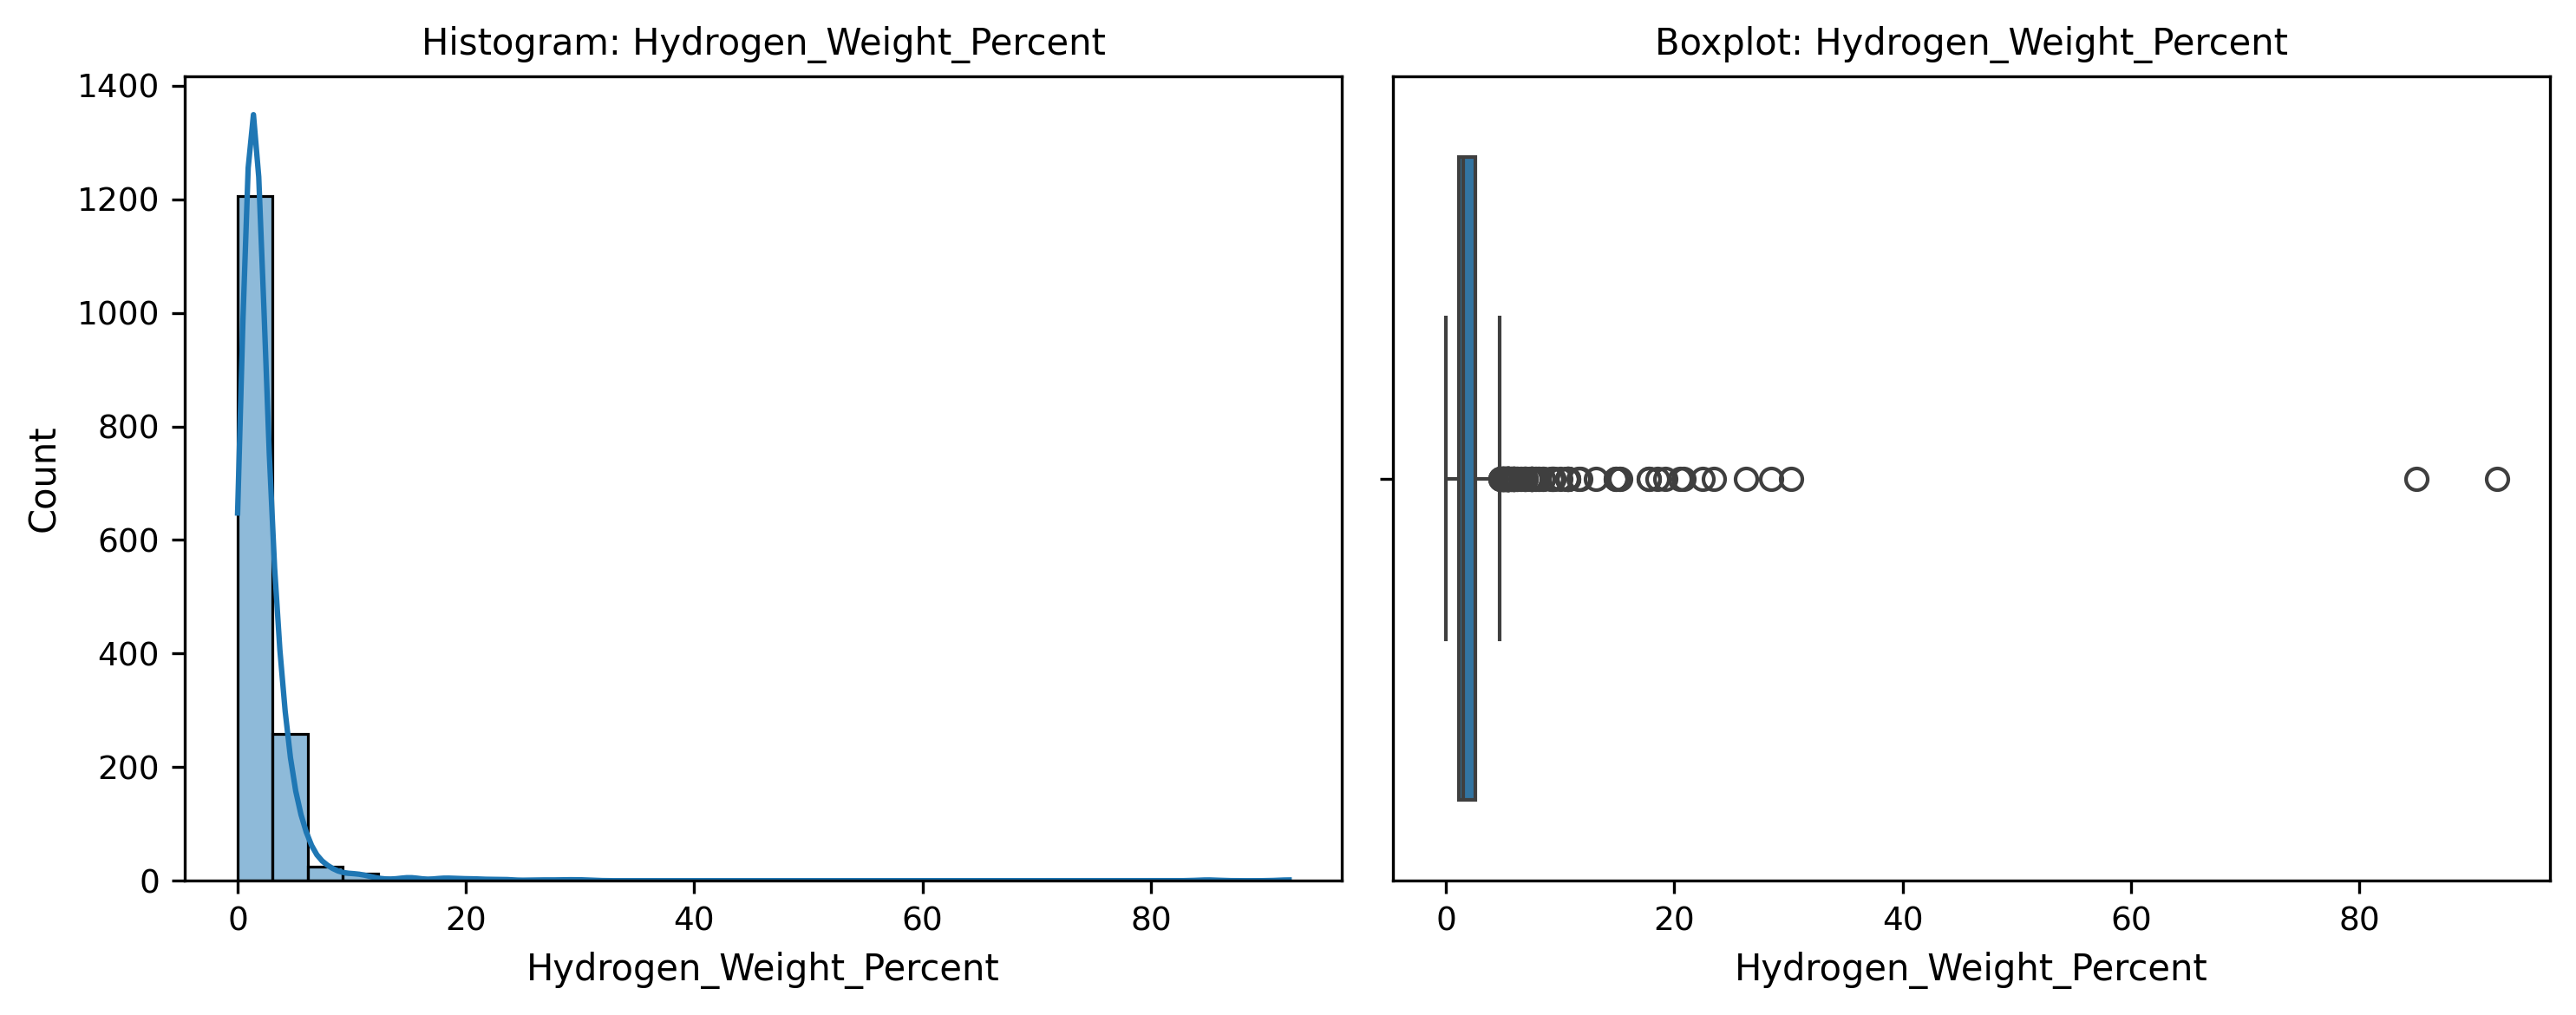

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned, ML-ready dataset
df = pd.read_csv("Hydpark_Guide_cleaned.csv")

# List your key numeric columns
numeric_cols = [
    'Heat_of_Formation_kJperMolH2', 
    'Temperature_oC', 
    'Pressure_Atmospheres_Absolute', 
    'Hydrogen_Weight_Percent'
]

# Print summary stats
print("\n=== Summary statistics ===")
print(df[numeric_cols].describe().T)

# Plot distributions
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


GIST

In [ ]:
# --- Load data ---
df = pd.read_csv("your_dataset.csv")
attributes_to_impute = ["target"]
context_columns = [col for col in df.columns if col not in attributes_to_impute]

# --- STEP 1: Apply GIST descriptors to missing values ---
df_with_descriptors = apply_gist_formalism(
    data=df.copy(),
    attributes_to_impute=attributes_to_impute,
    context_columns=context_columns,
    study_type="Your Study"
)

# --- STEP 2: Impute ground-truth (descriptor) values using impute_all_attributes ---
imputed_df, analysis = impute_all_attributes(
    data=df_with_descriptors,
    attributes_to_impute=attributes_to_impute,
    context_columns=context_columns,
    perform_analysis=True,
    gist_formalism=True,  # Important!
    prompt_type="gist",
    study_type="Your Study"
)

# --- Compute MAE/logs and save ---
log = {}
for attribute in attributes_to_impute:
    preds = analysis[attribute]
    gt = df.loc[df[attribute].notnull(), attribute].tolist()
    pred = []
    for row_preds in preds:
        # In GIST mode, result may be text/descriptor; just save as string
        val = next((str(x) for x in reversed(row_preds) if x is not None), None)
        pred.append(val)
    # No MAE for descriptors, but keep gt/preds for audit
    log[attribute] = {"predictions": pred, "ground_truth": gt}
imputed_df.to_csv("imputed_gist.csv", index=False)
with open("imputation_analysis_gist.json", "w") as f:
    json.dump(log, f, indent=2)
print("GIST descriptor imputation done.")